# Secure Multiparty Computation (SMPC) - Session 7

**Credit**: SMPC Team - <a href="https://github.com/rasswanth-s">Rasswanth</a> and <a href="https://github.com/gmuraru">George-Cristian Muraru</a>

> "The Force is not a power you have. It's not about lifting rocks. It's the energy between all things, a tension, a balance, that binds the universe together." ~ Luke Skywalker

In this session we cover: 
- Motivations
- Introduction to SMPC
- Secret Sharing
- Additive Secret Sharing
- SMPC Boolean Circuit Example
- XOR Gate
- AND Gate
- Computing Arbitrary Functions
- Security Models
- SMPC in PySyft
- Async Execution Model
- Celery worker
- Green threads
- Gevent
- Retriable Actions
- Demo Code
- Domain Setup
- Upload Data
- Create Data Scientist Account
- Requests
- Data Requests
- Budget Requests
- Response
- Under the hood
- MPCTensor
- ShareTensor
- Pseudo Random Generators (PRGs)
- Pseudo Random Zero Sharing (PRZS)
- TensorPointer Abstraction
- Share Generation
- Seed Generation & Sharing
- Creation of PRZS from the received seeds
- MPCTensor Addition
- MPCTensor Multiplication
- SPDZ Mask
- SPDZ Multiply
- DP and SMPC
- Trial of Alliance
- Brain Food
- Homework
- Bonus Materials

## Motivations

As we discussed in the very first session, several issues arise from the nature of how `data` is collected and used today, which create `barriers` to higher `productivity`, `efficiency`, and `utility`; from the existing data we already have.

While previous sessions have focused on how we can protect individuals `Output Privacy` by placing access at a distance and adding carefully crafted noise to the results, to prevent data leakage, there are several use cases that pose more issues that require solving.

While keeping the `Data Scientist` at a distance prevents them from `copying` the data, what happens when `Data Owners` and `Data Scientists` want to work across multiple private datasets in a `Federated Learning` scenario?

Do we just copy the data to a central server? Who owns that server and can we `trust` them `not to copy` the data?

What about the results? Who controls and arbitrates the `Shared Governance` of results calculated on inputs from different organizations?

We have also made a lot of assumptions about the idea that the thing to be protected is `Data` and not a `Model`, but a model can also be expressed as data. Consider the weights of a Neural Network which are both data and a model and just like personal data, the possibility of being able to utilize a model while also protecting it from leaking, creates a lot of potential value from previously impractical use cases.

What if the data or model we want to protect is not already inside the `domain`, where we want to use it? If the `Data Owner` or `Model Owner` is not also the owner of a given `domain`, but instead the domain is controlled by someone else (who has access to its RAM or Hard Disks), then sending ones valuable numbers to a domain they don't own, poses some potential trust issues.

We have previously identified that there are several solutions to these problems in the form of PETs (Privacy Enhancing Technologies) which involve a variety of `encryption` or `protection` schemes. In the case of `encryption`, the key to this working, is the implementation of cryptographic algorithms that output ciphertext; which still allow computation on their encrypted output, without first decrypting it.

This notebook will cover aspects of one such encryption mechanism called `Secure Multiparty Computation` (SMPC).

## Introduction to SMPC

Secure Multiparty Computation (SMPC) allows `n` different parties with their own private inputs to compute a joint function without any of the other parties learning anything about each others private inputs.

This can be expressed formally by stating that `SMPC` allows parties `P1, . . . , Pn` , with private inputs `x1, . . . , xn`  to jointly compute a function `f(x1, . . . , xn)`.

Such that the following conditions hold:
- **Correctness**: The output is consistent with `f` and the inputs `xi`
- **Privacy**: Nothing about the private inputs is revealed beyond whatever information is contained in the public output

In our context, parties mean `Data Owners` or `domains` that have access to their unencrypted private data. These terms can be used interchangeably for the purposes of `SMPC`. Additionally the terms `Secure Computation` and `Secure Function Evaluation` can be used interchangeably with SMPC.

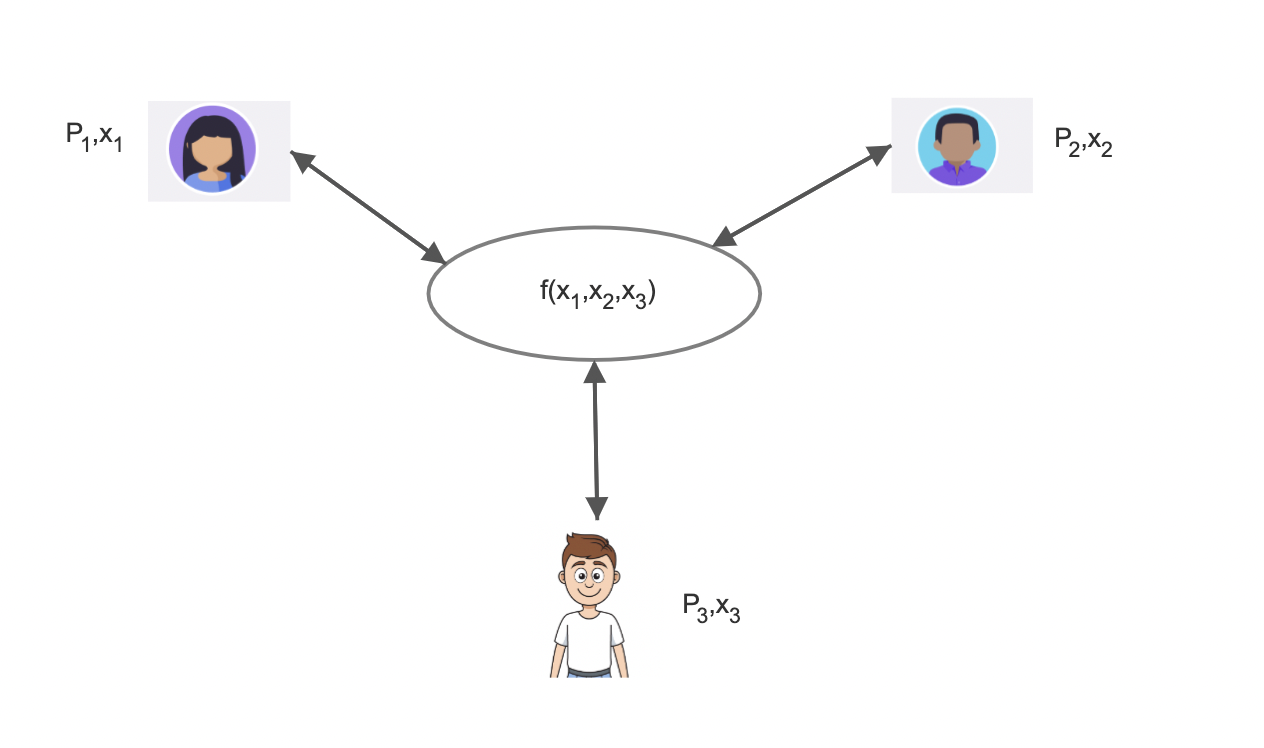

Some use cases of SMPC include:
- Secure Electronic Auctions
- Data Science & Machine Learning
- Distributed Consensus and Secure E-Voting

## Danish Sugar Beets

The first large-scale practical application of `SMPC`, was the "Danish Sugar Beet Auction" which took place in `2008`.

An electronic double auction was successfully run by a multiparty computation involving representatives of Denmark's only sugar beets processor (Danisco), the Danish sugar beet growers' association, and a research group responsible for implementing and running the computation.

The use of SMPC not only reduced expenses of the auction process (when compared to hiring an external consultancy to run the auction), but also allowed farmers' bids to remain private from Danisco, the only sugar beets processor on the Danish market and the seller of production contracts.

<blockquote><strong>📕 Paper</strong><br /><a href="https://eprint.iacr.org/2008/068.pdf">Sugar Beet Auctions</a></blockquote>

## Secret Sharing

Secret Sharing is one of the core primitives required for `SMPC` algorithms. Let's see how secret sharing works with a real-world scenario.

**Problem**: There are many cases when storing sensitive data or value in a single location creates a single point of failure.  

For example:
- Nuclear Launch Codes
- Private Encryption Keys

Secret Sharing allows us to solve these problems, by preventing a secret from being exposed should some of the locations or individuals safeguarding the secret become compromised.

Secret Sharing consists of two phases:
- Sharing
- Reconstruction

### Sharing

In the sharing phase, a trusted `Dealer` splits the original secret `s` into `n` shares, where the `n` denotes the number of parties participating in the computation.

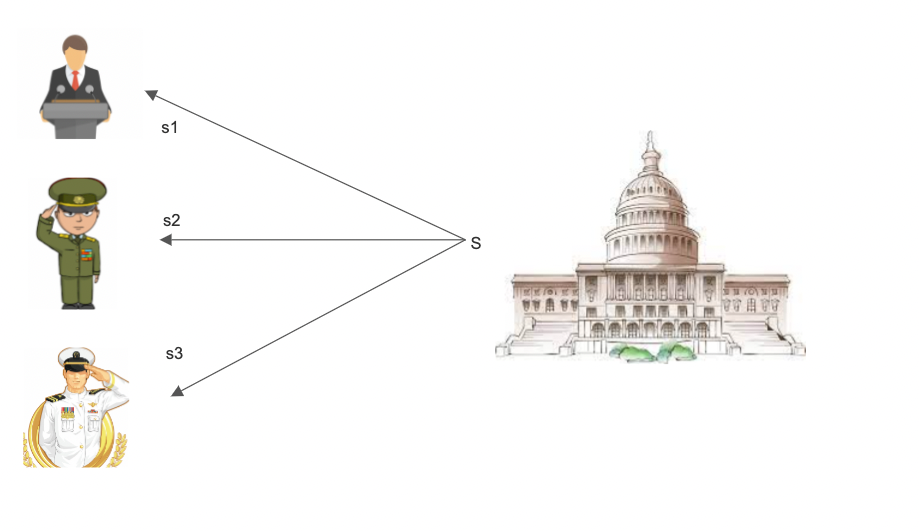

In one example with nuclear codes, the `government` could act as the `dealer` and provide these secret shares to different military leaders or politicians.

### Reconstruction

In the Reconstruction Phase a predetermined minimum threshold of these parties can combine their original shares to obtain the original secret.

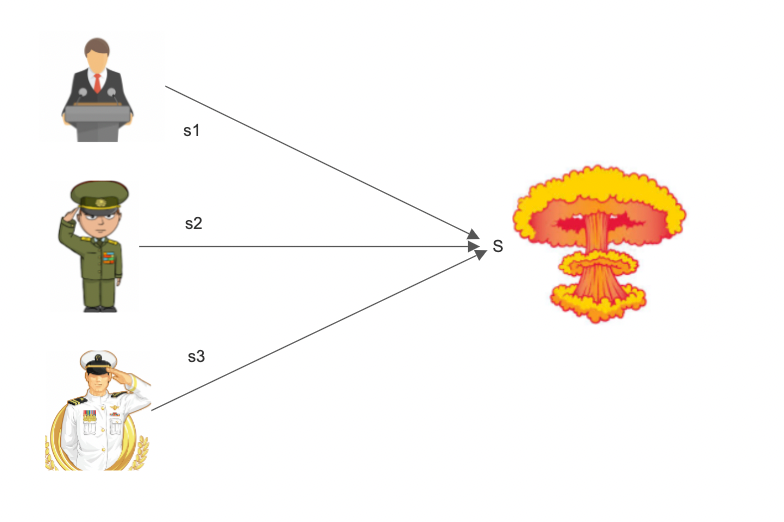

### Additive Secret Sharing

Additive Secret Sharing is an `n-out-of-n` secret sharing where `all` the shares are required to reconstruct the original secret.

These shares are defined over a finite space. Let's name this space as `Z`.

In the above picture of nuclear launch codes the secret `S` is split into three parts  `s1`, `s2`, and `s3` such that the  sum equals the original secret:  
`S = (s1 + s2 + s3) mod Z`

As you can see by this definition, all the shares (`3-out-of-3`) are required to reconstruct the original secret.

There are other secret sharing schemes like `Threshold Secret Sharing` which allow parties to `reconstruct` the secret only `if a subset of the shares` are present. One such scheme is called `Shamir's Secret Sharing` and it is the first secret sharing scheme proposed in cryptography.

<blockquote><strong>📕 Paper</strong><br /><a href="https://web.mit.edu/6.857/OldStuff/Fall03/ref/Shamir-HowToShareASecret.pdf">Shamir's Secret Sharing</a></blockquote>

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## SMPC with Boolean Circuits

While `SMPC` works for a variety of input types we will start with the simplest scenario of `bits`. By using either a `0` or `1` and the `Bitwise` operators `XOR` and `AND` we can keep the calculations much easier to follow.

### XOR Gate

This is a `XOR` gate. It takes two input `bits` (either a 1 or 0) and outputs another `bit` (a 1 or a 0). There are four combinations of different inputs which produce different outputs.

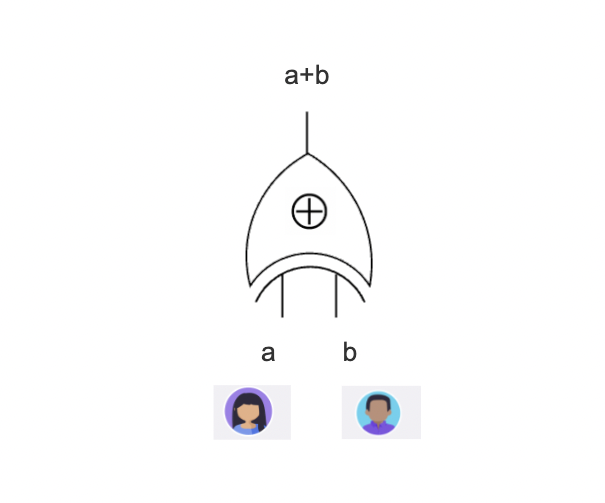

First let's remind ourselves how `XOR` works with a truth table.

<table style="text-align:left; clear:left; float:left;">
<tbody><tr bgcolor="#ddeeff">
<td colspan="2"><b>Input</b></td>
<td><b>Output</b>
</td></tr>
<tr bgcolor="#ddeeff">
<td>A</td>
<td>B</td>
<td>A XOR B
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr></tbody></table>

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://en.wikipedia.org/wiki/XOR_gate">XOR gate</a></blockquote>

Let's verify that with `python` and the `^` `Bitwise XOR` operator.

In [1]:
# ⚔️ Runnable Code
a = 0; b = 0; print(f"{a} ^ {b} = {a ^ b}");
a = 0; b = 1; print(f"{a} ^ {b} = {a ^ b}");
a = 1; b = 0; print(f"{a} ^ {b} = {a ^ b}");
a = 1; b = 1; print(f"{a} ^ {b} = {a ^ b}");

0 ^ 0 = 0
0 ^ 1 = 1
1 ^ 0 = 1
1 ^ 1 = 0


Consider two parties, `Alice` and `Bob` have private inputs (or shares of private inputs) `a` and `b`, and would like to compute the following:  
Math:  
`a⊕b`  

Pseudo-code:  
`a XOR b`  

Python:  
`a ^ b`

Let's examine this problem from a `secret sharing` scenario, in this particular example both Alice and Bob `own the private inputs`. However in many cases, the private inputs are `not owned` by the parties computing the function.

Assume there are two `Stakeholders` S1 and S2 having private inputs and they would like to compute `XOR` by secure computation. Let's imagine that external `Stakeholders` have delegated `Alice` and `Bob` to do the computation.

The Stakeholders do not want Alice and Bob to know the private values, hence they secret share the private inputs between Alice and Bob.

### Sharing

In the `Sharing Phase`, The Stakeholders share their corresponding private inputs.

The Stakeholder `S1` generates a random bit `r1` independently and constructs the shares as:

`S1` constructs shares $α$, $β$

Math:  
$α  = (a ⊕ r1)$ <br>
$β =  r1$ <br> 
such that  $α ⊕ β = a$

Pseudo-code:  
a = private_bit  
r1 = random_bit  
alpha = (a XOR r1)  
beta = r1  
a == alpha XOR beta  

Let's see it with `python`.

Try swapping `a` between `0` and `1`, and running a few times to see different random `beta`.

In [2]:
# ⚔️ Runnable Code
import secrets
a = 0
beta = secrets.randbits(1)
alpha = (a ^ beta)
print(f"a = {a}")
print(f"beta = {beta}")
print(f"alpha = {alpha}")

a = 0
beta = 1
alpha = 1


It's worth considering for a moment what this is doing. By generating a random bit between `0` and `1` and then `XOR`ing it with the original secret bit between `0` and `1`, we get two numbers:  
- `alpha` which has a `50%` of being the real value of `a` and a `50%` chance of being its opposite
- `beta` the random bit which was used to obscure the original `a` and which can be used to reverse it

In [3]:
# ⚔️ Runnable Code
print(f"a = alpha ^ beta")
print(f"a = {alpha ^ beta}")
assert a == alpha ^ beta
assert a == (a ^ beta) ^ beta

a = alpha ^ beta
a = 0


It looks like the `XOR` operator can be applied on a result with the same input to keep swapping it back and forth.

In a similar Way `S2` generates a random bit `r2` and constructs shares $α', β'$

$α' = (b ⊕ r2)$  
$β' = r2$  
such that $α' ⊕ β' = b$  

The Stakeholders give the shares $α$, $α'$ to Alice and $β$, $β'$ to Bob.

Both `Alice` and `Bob` now have a set of values which have the same probability of being the real value or not the real value, which means they both essentially have random values. 

It does not matter which part of the share (either α or β) for a given real value, each party receives, because no share bit alone would reveal anything about the secret bit.

### XOR with Three Shares

Think about how you might do this with three parties, `Alice`, `Bob` and `Charlie`. Discuss with your Mentor.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

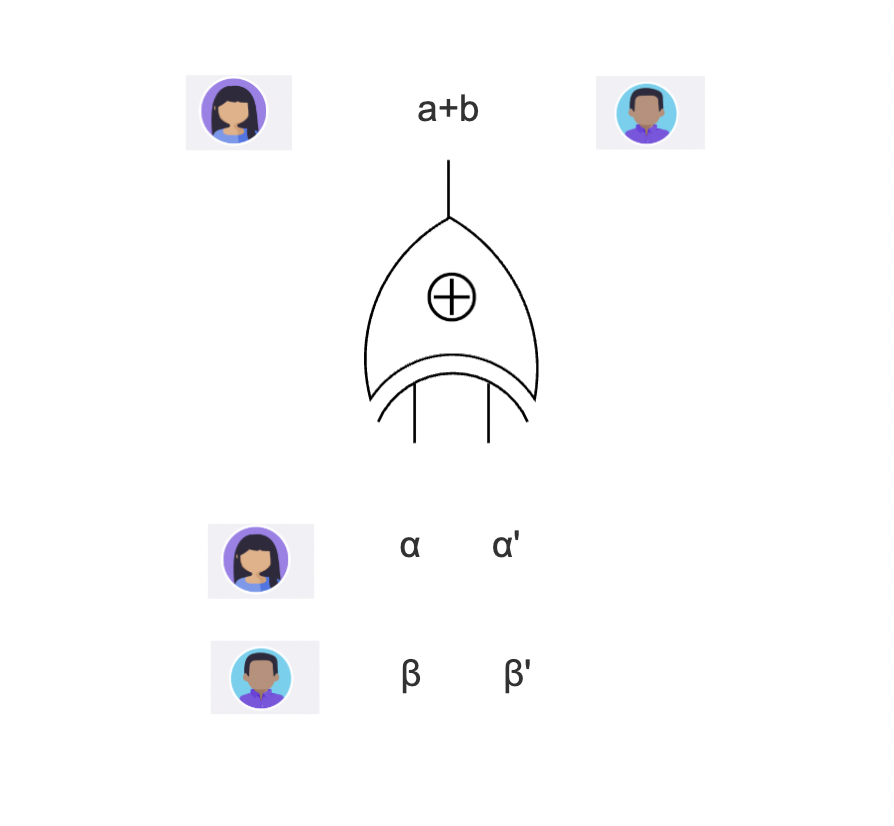

Now Both Alice and Bob have one share each from the `S1` and `S2` Stakeholders. Remember, the individual bits that `Alice` and `Bob` see are random with no direct relationship to the real data.

Now that we have `secret shared` the inputs we can allow `Alice` and `Bob` to compute `XOR` on the encrypted components of the original private `a` and `b` of Stakeholder 1 (`S1`) and Stakeholder 2 (`S2`).

### Computing XOR

To compute XOR in a secret shared manner, both `Alice` and `Bob` run XOR `locally` on each of their two shares. Note this is different to the original diagram where `Alice` and `Bob` would both have to pass their data `a` and `b` into the same `XOR` gate (or computer).

Alice XOR's the shares $α$, $α'$ as $γ$ (gamma) <br>
$γ$ = $α ⊕ α'$

Bob XOR's the shares $β$, $β'$ as $δ$ (delta) <br>
$δ = β ⊕ β'$

Psudo-code:  
gamma = alpha1 XOR alpha2  
delta = beta1 XOR beta2  

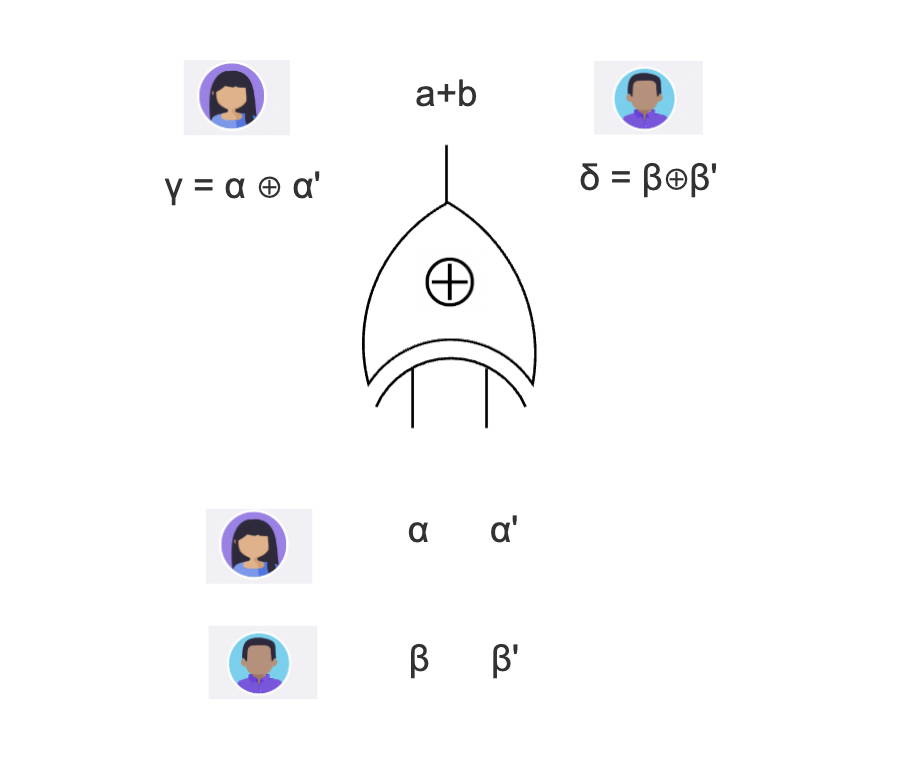

The values $γ$ and $δ$ are the final output shares.

### Reconstruction

We claim that reconstruction of the seperate output shares $γ$ and $δ$ is equal to the XOR of the original private inputs `a`, `b`.

To do the reconstruction, `Alice` and `Bob` can either send each of their shares to the stakeholder for them to reconstruct individually or they can send them to each other, allowing both sides to see the final output.

The reconstruction of output shares can be expressed as:  
$γ ⊕ δ = (α ⊕ α') ⊕ ( β ⊕ β')$  

By using the associativity property we can rearrange and simplify like so:  
$γ ⊕ δ = (α ⊕ β) ⊕ ( α'⊕ β')$  
$γ ⊕ δ = a ⊕ b$ 


Importantly:
- During the computation, Alice and Bob see `only random bits` held by them and perform the protocol for XOR
- During the reconstruction of the shares the `result retains the XOR function` over the private inputs

### Input Privacy

It's important to consider one important `caveat` to the above example.

SMPC guarantees that a malicious party can only learn information about it's private inputs from the `public outputs`.

Given that statement, anyone who knows the output of `XOR` and that a `XOR` was applied, with their own secret input to the `XOR` can figure out their opposing parties secret input.

Look at the table below, and imagine you have the output and one of the inputs, can you figure out the other input?

<table style="text-align:left; clear:left; float:left;">
<tbody><tr bgcolor="#ddeeff">
<td colspan="2"><b>Input</b></td>
<td><b>Output</b>
</td></tr>
<tr bgcolor="#ddeeff">
<td>A</td>
<td>B</td>
<td>A XOR B
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr></tbody></table>

This is not considered a `security leakage` under `SMPC`, but it does mean that it is important to understand different scenarios where a certain number of adversarial parties might collude to uncover the private data of another party.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## AND Gate

Now, let's see how the `AND` gate is computed.

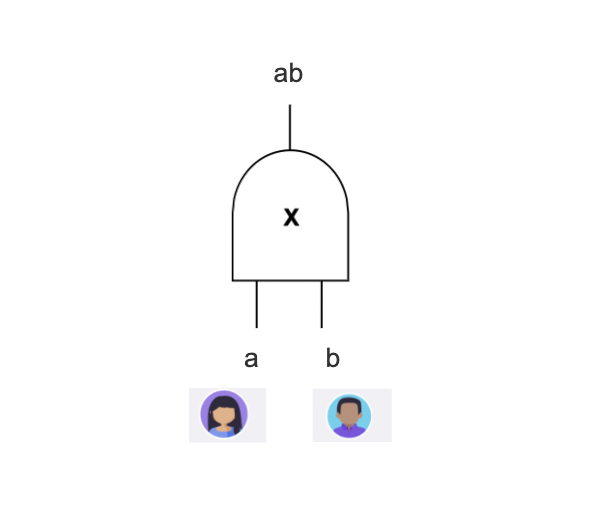

First lets remind ourselves how `AND` works with a truth table.

<table style="text-align:left; clear:left; float:left;">
<tbody><tr bgcolor="#ddeeff">
<td colspan="2"><b>Input</b></td>
<td><b>Output</b>
</td></tr>
<tr bgcolor="#ddeeff">
<td>A</td>
<td>B</td>
<td>A AND B
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1
</td></tr></tbody></table>

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://en.wikipedia.org/wiki/AND_gate">AND gate</a></blockquote>

Let's verify that with `python` and the `&` `Bitwise AND` operator.

In [4]:
# ⚔️ Runnable Code
a = 0; b = 0; print(f"{a} & {b} = {a & b}");
a = 0; b = 1; print(f"{a} & {b} = {a & b}");
a = 1; b = 0; print(f"{a} & {b} = {a & b}");
a = 1; b = 1; print(f"{a} & {b} = {a & b}");

0 & 0 = 0
0 & 1 = 0
1 & 0 = 0
1 & 1 = 1


Consider two parties, `Alice` and `Bob` having private inputs (or shares of private inputs) `a` and `b` who would like to compute `ab` (a & b).

Just like before lets use the Stakeholder Scenario described above so that `Alice` and `Bob` can do `AND` without knowing the real `private inputs`.

### Sharing

In the Sharing Phase, the `Stakeholders` create shares just as in the above XOR example.

`S1` generates a random bit r1 and constructs shares $α, β$ as follows

$α  = (a ⊕ r1)$ <br>
$β =  r1$ <br> 
such that  $α ⊕ β = a$

`S2` chooses a random bit r2 and constructs shares $α', β'$ as follows

$α'  = (b ⊕ r2)$ <br>
$β' =  r2$ <br> 
such that  $α' ⊕ β' = b$

The Stakeholders give the shares $α, α'$ to Alice and $β, β'$ to Bob

**NOTE**: This is identical to the above `XOR` process of creating $α, α'$ and $β, β'$.

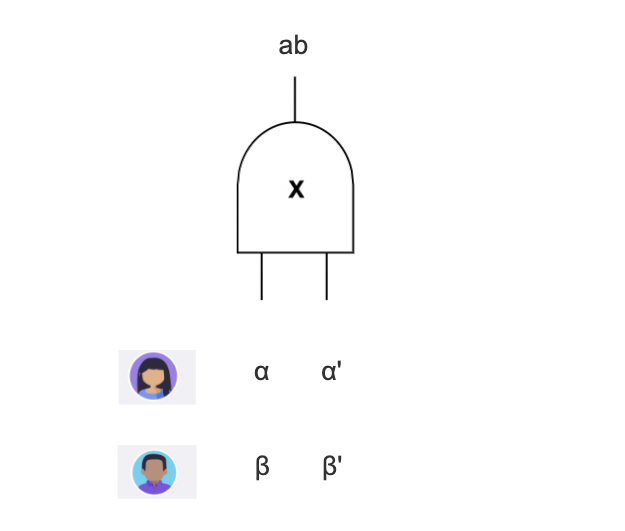

### Sharing Beaver Triples

In the a `XOR` gate example, locally adding the shares would gives us the output shares. For the `AND` gate we require a `Beaver Triple` or `AND` triple.

A Beaver Triple is `tuple` of three values (x, y, z):  
- where `x` and `y` are picked uniformly at random  
- the value `z` is the `AND` operation between the bits `x, y`  

Math:  
`z = xy`

Pseudo-code:  
`z == x AND y`

Try running the following cell a few times to see how it works.

In [5]:
# ⚔️ Runnable Code
import secrets
def generate_binary_beaver_triple():
    x = secrets.randbits(1)
    y = secrets.randbits(1)
    z = x & y
    return (x, y, z)

generate_binary_beaver_triple()

(1, 0, 0)

In the simplest case, let's just assume that we get the Beaver Triple from a `Trusted Third Party (TTP)`.

This `Trusted Third Party(TTP)` creates two shares of each of the three values of the `tuple` and gives them to each party.

### Sharing of `x`

TTP generates a random bit `r1` and constructs the shares x<sub>a</sub> and x<sub>b</sub> as follows:

x<sub>a</sub> = $x ⊕ r1$ <br>
x<sub>b</sub> = r1

### Sharing of `y`

TTP generates a random bit `r2` and constructs the shares y<sub>a</sub> and y<sub>b</sub> as follows:

y<sub>a</sub> = $y ⊕ r2$ <br>
y<sub>b</sub> = r2

### Sharing of `z`

TTP generates a random bit `r3` and constructs the shares z<sub>a</sub> and z<sub>b</sub> as follows:

z<sub>a</sub> = $z ⊕ r3$ <br>
z<sub>b</sub> = r3

TTP shares x<sub>a</sub>, y<sub>a</sub> , z<sub>a</sub> with `Alice` and  x<sub>b</sub>, y<sub>b</sub> , z<sub>b</sub> with `Bob`

Using the above `XOR Sharing` method we have now split each of the values of a `tuple` of three variables 
into two dependent components and given them to `Alice` and `Bob`.

Importantly the original tuple values are interdependent as `z = x AND y` and the values of `x` and `y` are themselves random.

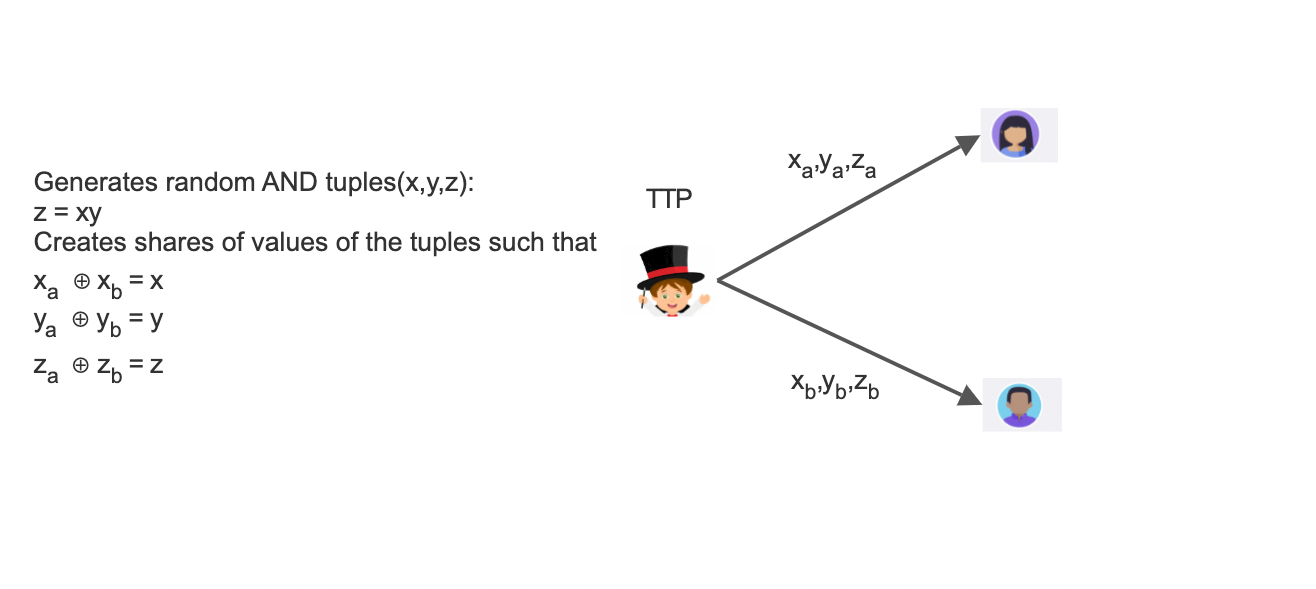

The TTP then generates as many `Beaver Triple` shares as needed for the number of parties. Above we used two, but with additional `r`'s and `XORs`, the `(x, y, z)` could be split into more shares. These shares are sent out to the parties before computation can begin.

<img src="https://i.imgflip.com/721iq0.jpg" />

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

### Computing AND

After the sharing phase, all parties have their secret shares of the `private inputs` and their secret shares of the `beaver triple`.

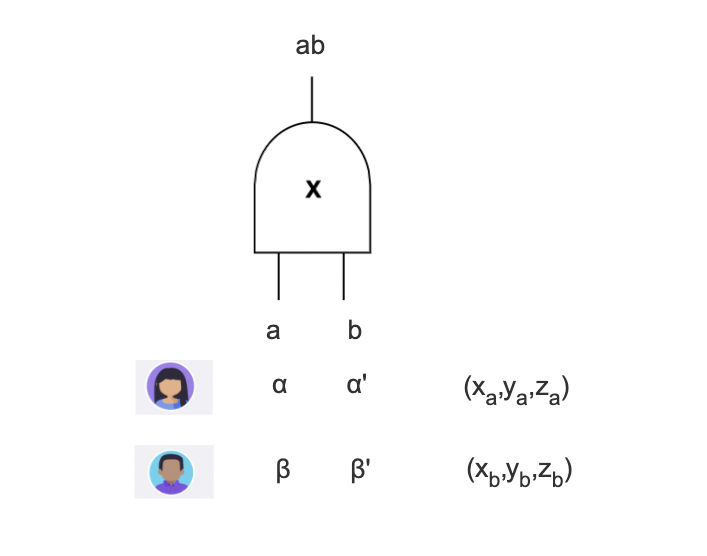

Now all parties compute the `AND` operation with the following protocol.

Alice `XOR`s each of her original secret shares of data with one of the randomly generated values from the `Beaver Triple`, to create `two new` futher intertwined values `epsilon` (nothing to do with Differential Privacy) and `eta`. 

Remember we are computing two inputs here, so even with three parties, we will still only be calculating on two inputs, except the third party will be using their third set of shares generated at sharing time for the inputs `a`, `b` and the `Beaver Triple (x, y, z)`.

Math:  
$ε$<sub>a</sub>  = $α ⊕ x$<sub>a</sub>  
$η$<sub>a</sub>  = $α'⊕ y$<sub>a</sub>  

Pseudo-code:  
epsilon_a = alpha1 XOR x_a  
eta_a = alpha2 XOR y_a  

Bob computes his equivalent variables:

Math:  
$ε$<sub>b</sub>  = $β ⊕ x$<sub>b</sub>  
$η$<sub>b</sub>  = $β'⊕ y$<sub>b</sub>  

Pseudo-code:  
epsilon_b = beta1 XOR x_b  
eta_b = beta2 XOR y_b  

Then they exchange the intermediate shares $ε$ and $η$ that were created.

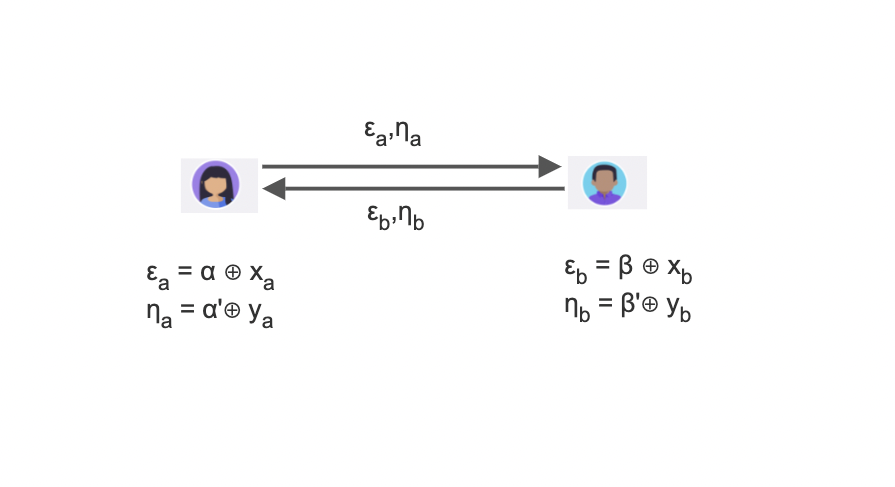

### Reconstruction

Since Alice and Bob have the shares required to reconstruct $ε$ and $η$, they do as follows:

$ε$ = $ε$<sub>a</sub> $ ⊕  ε$<sub>b</sub> = $(α ⊕ x$<sub>a</sub>$) ⊕ (β ⊕ x$<sub>b</sub>$ ) = (α ⊕  β)⊕ ( x$<sub>a</sub>$ ⊕ x$<sub>b</sub> ) <br>
$ε$ = $a ⊕ x$


$η$ = $η$<sub>a</sub>$ ⊕ η$<sub>b</sub>$ = (α' ⊕ y$<sub>a</sub>$)⊕ (β' ⊕ y$<sub>b</sub>$ ) = (α' ⊕  β')⊕ ( y$<sub>a</sub>$ ⊕ y$<sub>b</sub> ) <br>
$η$ = $b$  $⊕$  $y$  

Does this reconstruction constitute a security leak?

Since `x`, `y` were picked uniformly at random, we could think of the values `ε`, `η` as masking the private inputs `a`, `b` with a random bit, therefore the information in the public output is not a security leak.

Now with the shares $ε$, $η$ they can output the final shares $γ$, $δ$.

Alice outputs:

$γ$ = $εα' ⊕ ηα ⊕ z$<sub>a</sub> $ ⊕$  $εη$

Bob outputs:

$δ = εβ'  ⊕ ηβ ⊕ z$<sub>b</sub>

Observe that the constant term ($εη$) is only added to Alice's share, as this prevents the `duplication` of the constant term in the final output.

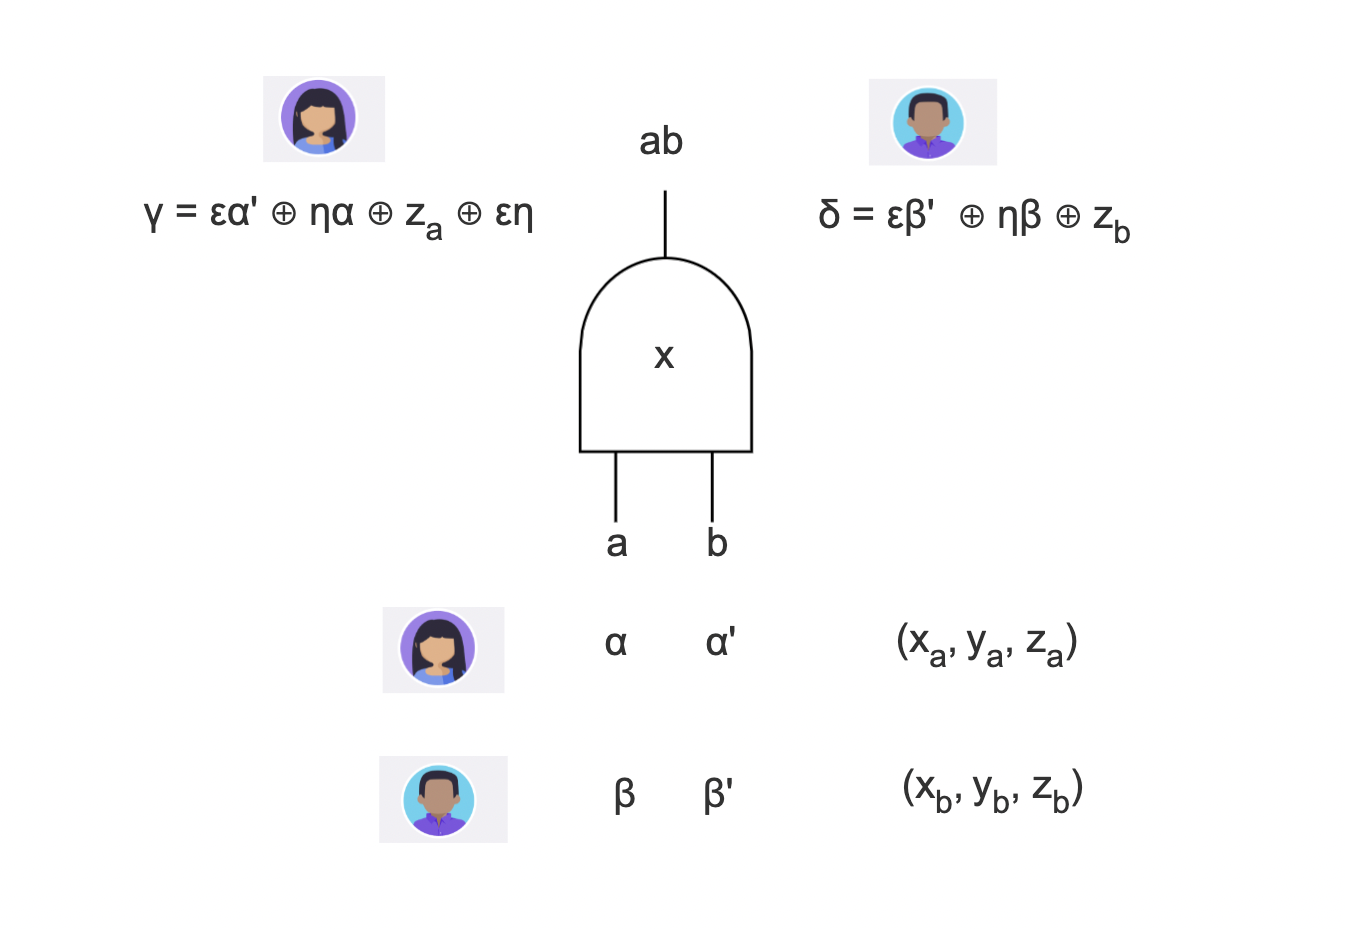

We claim the shares γ, δ are the `secret shares` of the output of the `AND` computation of `a` and `b`.

To prove it, lets `reconstruct` the final shares:

=> γ ⊕ δ <br>
=> (εα' ⊕ ηα ⊕ z<sub>a</sub> ⊕ εη) ⊕  (εβ'  ⊕ ηβ ⊕ z<sub>b</sub>) <br>
Using Associativity of XOR grouping common terms <br>
=> ε(y<sub>a</sub> ⊕ y<sub>b</sub>) ⊕ η(x<sub>a</sub> ⊕ x<sub>b</sub>) ⊕ (z<sub>a</sub> ⊕ z<sub>b</sub>) ⊕ εη  <br>
=> εy ⊕ ηx ⊕ z ⊕ εη   (Expading constant terms) <br>
=> (x ⊕ a)y ⊕ (y ⊕ b)x ⊕ z ⊕ (x⊕a)(y⊕b)  <br>
=> xy ⊕ ay ⊕ xy ⊕ bx ⊕ z ⊕ xy ⊕ bx ⊕ ay ⊕ ab (Grouping Common terms) <br> 
=> (xy ⊕ xy) ⊕ (bx ⊕ bx) ⊕ (z ⊕ xy)⊕ (ay ⊕ ay)  ⊕ ab <br>
=> ab ⊕ (z ⊕ xy) (since z= xy) <br>
=> ab ⊕ (xy ⊕ xy) <br>
=> ab <br>

Hence:  
$γ ⊕ δ$ = ab (which is the AND of the initial two private inputs a, b)

To reconstruct, `Alice` and `Bob` can either send their shares to the a stakeholder for them to reconstruct it, or they can send their secret share to each other thus making the output public amongst all share holders.

Let's take a look at the AND table to develop more intuition on the `secure computation` solution.

<table style="text-align:left; clear:left; float:left;">
<tbody><tr bgcolor="#ddeeff">
<td colspan="2"><b>Input</b></td>
<td><b>Output</b>
</td></tr>
<tr bgcolor="#ddeeff">
<td>A</td>
<td>B</td>
<td>A AND B
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0</td>
<td style="background: #FFE3E3; color: black; vertical-align: middle; text-align: center;" class="table-no2">0
</td></tr>
<tr>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1</td>
<td style="background:#bfd; color:black; vertical-align:middle; text-align:center;" class="table-yes2">1
</td></tr></tbody></table>

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

### Dating Problem

Another way to think about the above AND gate is known as the `Dating Problem`.  
Two People `Alice`, `Bob` would like to ask the other if they would go on a date with them. However, they are afraid of embarrasment if the other says no.

Maybe the `AND` gate can help?

`Alice`, `Bob` have a choice bit `b` on whether they want to go on a date with each other.  
- They would agree to go on a date if both of them wanted to: `both their choice bits are 1`
- They would not agree to go on a date if either of them didn't want to: `any choice bit is 0`

This is identical to computing AND on both their `choice` bits. They are interested in the output of the function but would not like to reveal their `input choice bit` if possible.

Why do we say `if possible`?

They are essentially trying to secure compute the AND function, but the output of the function in some cases reveals the choice bit of the other person.

Assume `Alice`'s input choice bit is `b = 1`, and the output bit is `0`.  
Alice could assume that `Bob`'s input bit was `0` and may feel upset.

Asymmetrically in the case of `Bob`'s input choice bit being `b = 0`, Bob cannot determine anything about the input bit of Alice.

Apart from the information they can infer from their input bit and the output of the function, Secure Computation guarantees that no other information is leaked.

<img src="https://media.giphy.com/media/3o8dFn5CXJlCV9ZEsg/giphy.gif" />

## A More Complex Circuit

Okay, so what would happen if we wanted to build a more complex circuit where the output of an `AND` and a `XOR` is combined into another `AND` gate?

So far we have computed a single gate at a time and then reconstructed the result. However we also learned that at the reconstruction phase, if you know some of the input and what operation was executed; it is possible to learn something about the information that was passed into the last step.

In practise this means that when we do multiple operations in a sequence, we do not perform reconstruction at each step. Not only would this be time consuming and potentially leak information but if you remember, it is unnecessary because we can continue to compute on our `secret-shared` (encrypted) data with `SMPC` protocols without `reconstruction` (decryption) at each step.

As long as that is true, we can state the following `Secret Sharing Invariant`:

- the input shares to a gate are `secret-shared`  
- the output of a gate is `secret-shared`  
- until we have computed the last level of the circuit and reconstructed the output

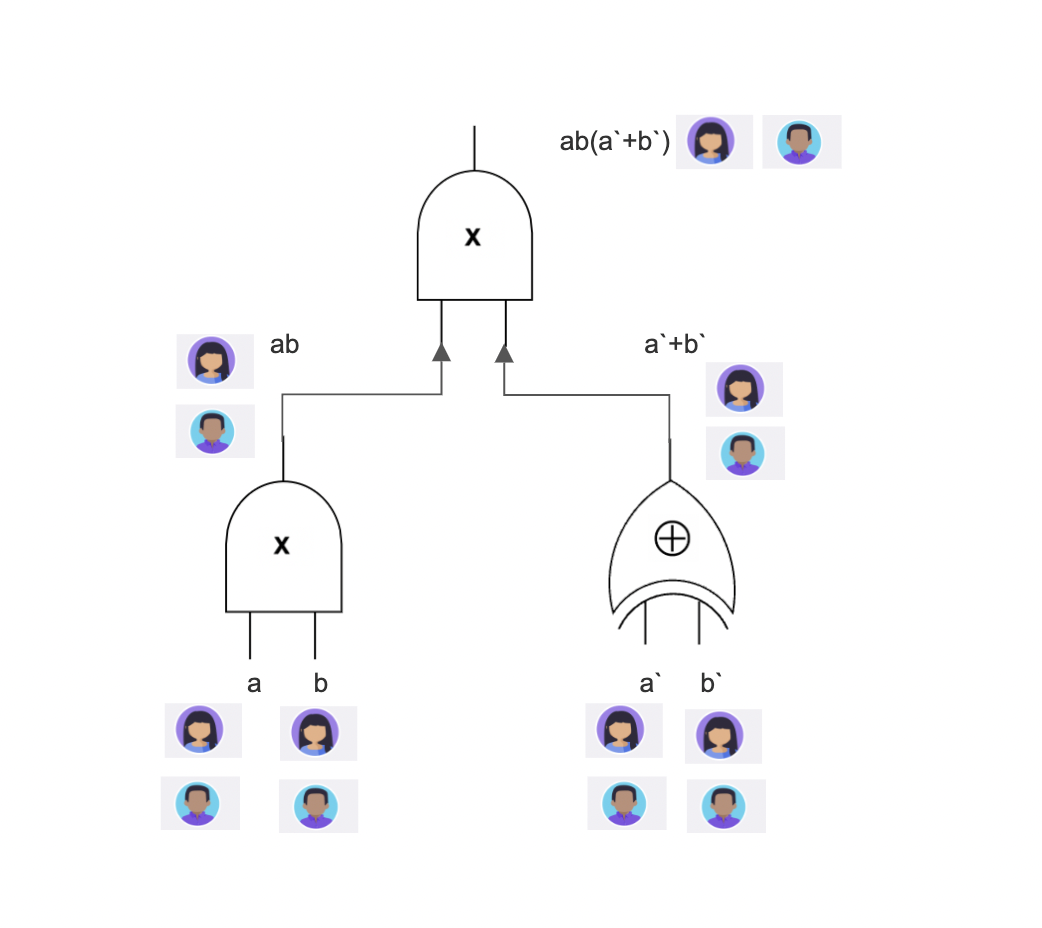

In the above picture the inputs at each step are `secret-shared` and the results of each computation have `shared-ownership` with each party involved. Since we know how to compute `XOR` and `AND` on `secret-shared` values there is no need to `reconstruct` until the final level.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## Arithmetic Secret Sharing

In the above circuit example we use `Binary Secret Sharing`.

An alternative to this is Arithmetic Secret Sharing where the shares are defined over rings $\mathbb{Z}_{2^k}$  which supports traditional arithmetic operations like `+`, `-`, `*`.

`Binary Secret Sharing` is a special case of Arithmetic Secret Sharing when k=1, the shares are defined over $\mathbb{Z}_{2}$  = {0,1}
The addition and multiplication operations in binary secret sharing correspond to ⊕, ∧ operations.

In real world scenarios, we set k=64, k=32 as we have `64-bit`, `32-bit` data types which would take care of modulo for `additive secret sharing`.

We perform addition and multiplication in `Arithmetic Sharing` by the same protocols described in the circuit example above.

## Computing Arbitrary Functions

Some obvious next questions would be:

- How do you solve a statistics problem by secure computation?  
- How do you implement a complex  ML algorithm?  
- Can we use it to implement any algorithm?  

**Remember**: `Programs` => `Functions` => `Boolean / Arithmetic` Circuits

The XOR and AND gates are `Turing Complete`, which means we can create any arbitrarily complex computer program just by composing `XOR` and `AND` gates.

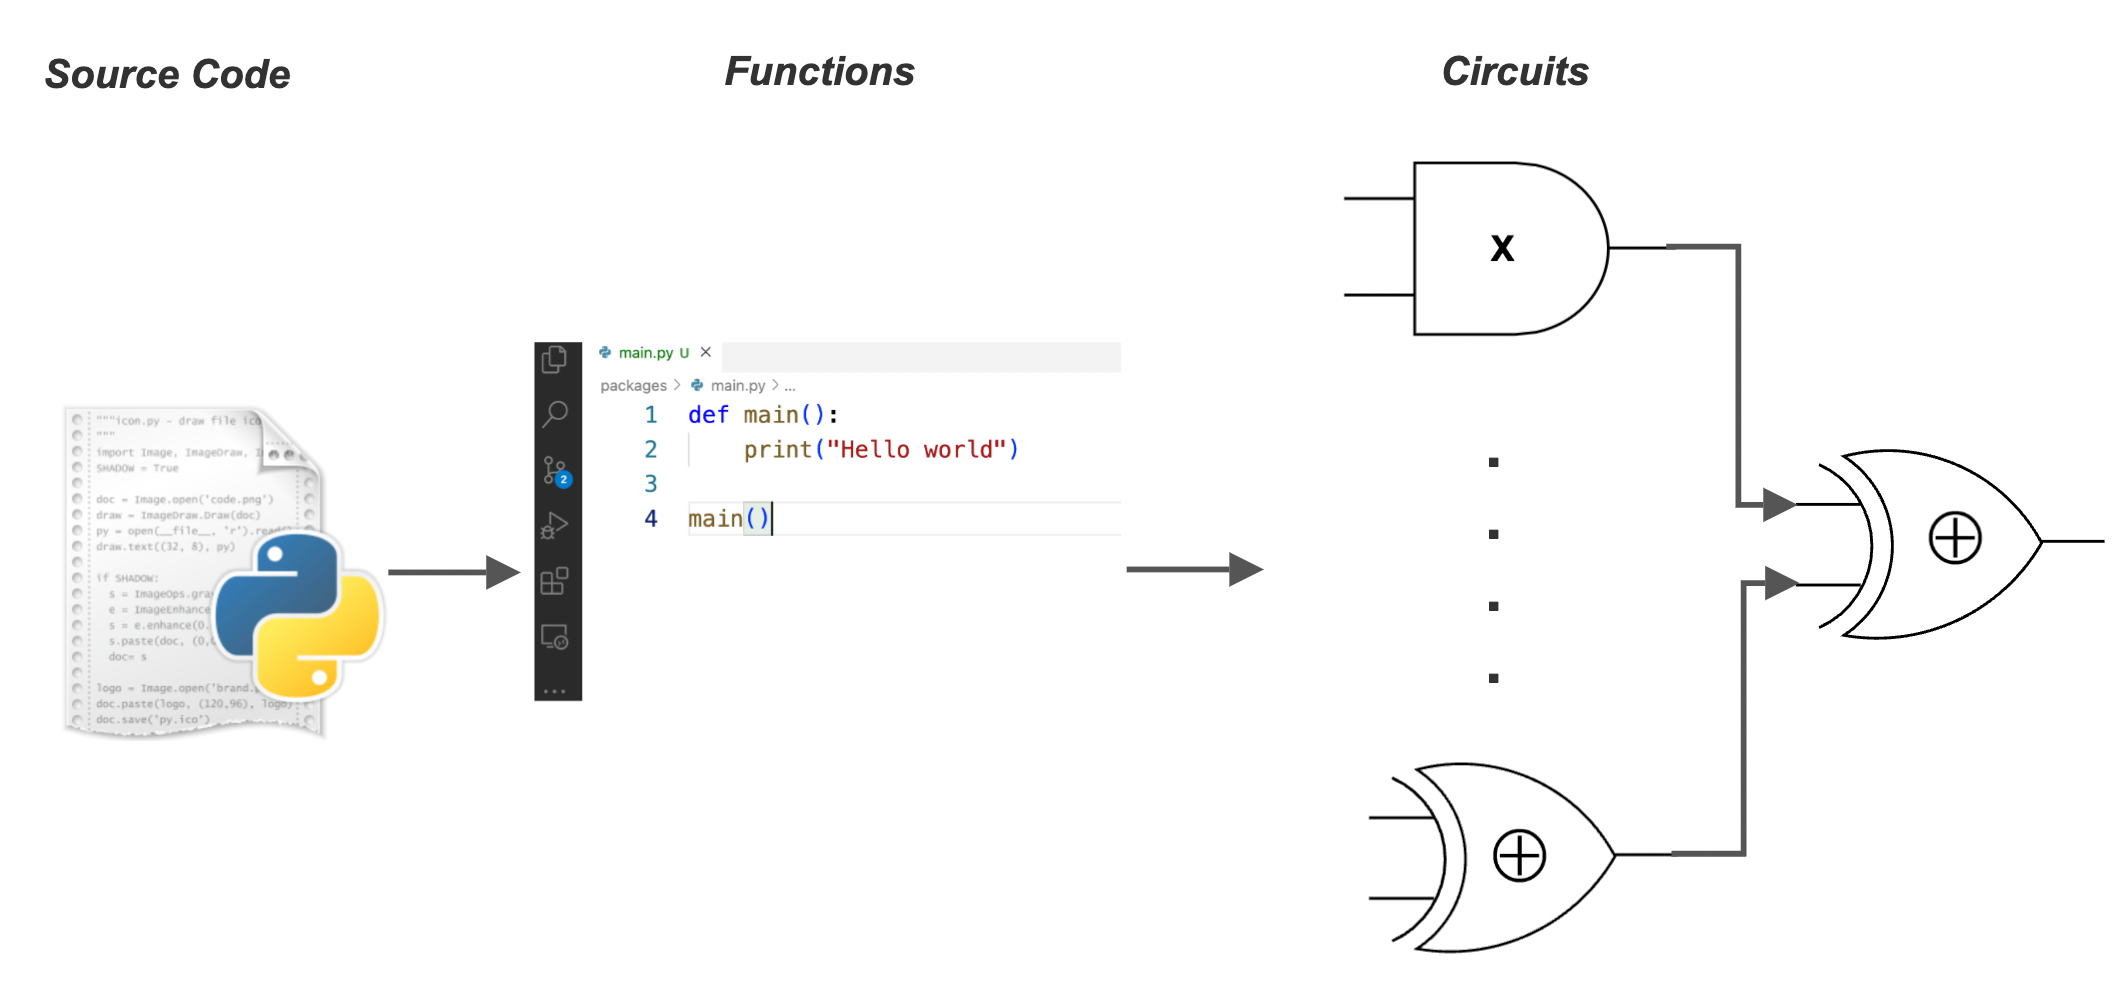

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## Security Models

Until now we have not mentioned the power or capability of any potential adversaries in the computation.  

We can classify the adversaries into three categories:

#### **Semi-honest**

The adversaries in this model follow the protocol specification exactly, they do not deviate from the protocol; however, they try to learn information from the transcript of the messages communicated in the protocol. A protocol with this level of security, guarantees that there is no inadvertent data leakage. They are also called honest-but-curious or passive adversaries.

#### **Malicious**

The adversaries in this model are allowed to arbitrarily deviate from the protocol. They could execute their own strategy during the computation. Ensuring this level of security, would prevent any adversarial attack. They are also called active adversaries.

#### **Covert**

The adversaries in this model are allowed to act maliciously. However, the security guarantee provided is that if they do attempt such an attack, then it will be detected with some specified probability that can be tuned to the application.

## Secure Multi-Party Computation in Syft

SMPC in Syft is highly inspired by the `Crypten` Project from Facebook (Meta) Research.

<blockquote><strong>📕 Paper</strong><br /><a href="https://arxiv.org/abs/2109.00984">CrypTen: Secure Multi-Party Computation Meets Machine Learning</a></blockquote>

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://github.com/facebookresearch/CrypTen">Crypten Github Repository</a></blockquote>

Our SMPC implementation currently supports:
- the semi-honest security model
- an arbitrary number of parties in computation

Utilizing SMPC in Syft does not require any prior knowledge in cryptography as it provides a higher level of abstraction.

### SMPC Secret Sharing

You may have noticed above that there are a lot of instances where computation requires calculating `secret-shares` and then `distributing` those shares for computation by each party.

Additionally during the final `reconstruction` phase more data needs to be sent between parties.

In `syft` these `secret-shares` are sent using our `messaging` system. In the examples above we can conveniently ignore the additional problem of `network` latency and out of order execution. However in reality we can't ignore these problems.

Fortunately we have an `async` networking system with `queues` and `threads` which we can use to solve these problems.

## Async Execution Model

We have learned in previous sessions that a client can send two types of messages:

- Synchronous (`WithReply`)
- Asynchronous (`WithoutReply`)

Sync messages `block` and wait until they receive the result of their request and are unable to continue to execute work while waiting.

Meanwhile async messages are `non-blocking` and immediately return from the request with a Pointer and can use the future result immediately in the next `non-blocking` request, by addressing its `UID`.

We learned that async messages are processed by the `backend-stream` container, where they get `produced` into the `RabbitMQ` `queue` system. At the same time the `celery-worker` container polls the queue and `consumes` incoming messages as soon as its ready to process them. 

<img width="400px;" src="data:image/webp;base64,
UklGRgrhAABXRUJQVlA4WAoAAAA0AAAAHwMAFgMASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBIjycAAAH/JyRI8P94a0Sk7jmM2zZyRPff9gbPhX9E
TIDJzDofWEfiNHvLfCRKZtAIUh4YRMntTco98ovoOE0giWl/+P+/e9n/3+3xPHf2
lGHElhhB7NTeWtQqVZsOs6UpjT1Ki6q9W0VXitqjNEWM0w619xYSRET2vP1xPp/P
8zzzSozkOF4i+j8BbNpIkiQtro3uiCx/KJXu44j+TwBeJV2nTJmiRT7tPmrKFFcU
/L2nTGmKvCgE8mW3KVO+cMbr7a5hYUu2bvkmLKxVbaf8qRRJY35V9i5ZyhqXsLCw
z6wICxtaLJ/bRU6xmyjXY/a2bRsnD/DOf0qTN/3zg8ZhYWFhBmsahIWFhb0O+Jtq
H44IdH/ZK02SndWRcTXtIFxcpALAud72bCr+2sIp72ldnAqA2SQ51ArtU5J83UCm
HxltzG8cBwwYoClozvnlHZ+oKO/8r/yObKrN+icoz3WM+llrB6cBA7o55Bunjere
4WuE+K6Wkw88Tc4lebhEPpOv245heac1WSK/Ex1zyOz4pcHF/Sv0uZRM8k6lvLaU
53R2yDdlntVRJda+TngAeaf6U6+QfFb7JS8xg2l188yiAqDmI5Iz3CErhe4mGe2U
t/QbCopLWTlfqfI6w9uvHwC47Cd5Tq9GWNpCCBVCWCWEEHYRQthBCCFsIYSwSghh
h/XXyVMONhNCCDX6qLwjLG0ghP2cSSaFQO3vJL9SISxtIYRQ4XrcGiGEsIsQwhph
aQMhrFt1kXtVhZI/WSOEELYQQohXKhhWkVyiFPDl6r/O7IuY29eg8HV4eA24fDDn
l4gVo0sB8Bi0cPPepePLqfDp/8NvO/ZFzBnpp+ASHh6uBVAuPHygTpT+fMXWg39O
b2ITUWncooi9O9fM7mpUaBAeHgpRe/yafVuXf1NORYXP5+3ZsXZyVWGzemnM+Ng2
7r3m/BEVFTH/Ux+ZoPAp98nvwsM7jQ4P76hQJjw83E+hbXj4QAsRPP7nv07uiZjZ
Qydn6BUe7orAaX9E1LKidnh4eG112p9IfiRUlXnO+NkGuVrjft8cHRkxu4Mkpx8a
Hh4AU8fvfzvz1+xPTBYNwmek8NG48PAOMt79Z/+69eCfPwz1UnANDx/sBKBkePgX
BpQatmTLobXfNlIT+OWqDcd2R0xrI8lpuoWHByLomz8iqls1/ReyrJodTOulRpQZ
OT/i0J413/V0VHg3PLwjTJ1nR5h3rBrq9CoFj2gy21dG9E7KpWzWPne5HPJT9zuZ
JJn70BPYl02SuTEeCn0SsyibE9tdrhRJI4B3ybOOwY9zaJk2SbLB/GTKZ54tJzee
nKCZmpJLy6sVFVom5dDyXg2b6caQsSZbaPdnUTYn2sHiQypuWEpu1slNJfmpnH4D
+ZVFpyeUz9zhJON6kAxoEJ9LdlTnFkNuMajzvkIe0EB9nx7uOlhKg1NyKZvxp6OM
812yhUtkBi2z/nYGMI6Kv1m8n5hN2ewH78uVJm/6A2hCxrtWeZhDy7RRQqHZo1zK
pq+WZPTbyO5VEnLJtlZNa0FGqKiYy6elVGjmJ+VQNvNikNxqcoP0VSYtc665v0ph
AskRFvq5qeQTc8TWcxlkdEOleZf5eN/f0VlkQvEIJhzceSaTvOki0yWBTN0dEbE/
jmQ7K94hr/Z6wXuR205mkwmhVhkmkry3KWLDiQzyUimlaV9lZV/Zuus0yYeuMi3v
kzyzbvN/L+4MeGCr0hfJvwzWNX1MZkRviDiSQca3FUCzfSczyRP79k0JIc8Uk9HE
kDwt53WWLAm4LSL56OCG7WdJHq2mVHU3aU2FS+TpSlDfgWRl2LjYSpIP967bcZlk
VCWlnmY+O755XwzJBRLQa985MnX/vn3jALSOIZP+jVj37zMyuaV1zz4kb0VuPZZG
PguVMX2ZQr6IXLf5BsktJZQ+2k7aRHeXiT4KYjr5jbuSZnImeX9LxKZDGeQZX6Xd
I8nLOw88J3mq1KtUWZK/agGMJbm3pKvO6NUvhTzrp5Cas72Ms4P3bySv5uyt6OLg
uYTM+EDmInmxnINO59w8gzzpra4EmRqfPdnfyeje+QW5yKrANHKrv0Gndx9D5kxT
Skh93ryY0cFzcS453sIpgUyp5qkzeL7/PCXbVviATOtsleEayQ889Dq30HjykROg
da4fRwY5O5ukWGZVlalEPiHdZSpmMVoAw7LJA2Vc9CavesnkFb3CimwOrlDNU40m
KpcXfGHlBvKy1kaapSR/D3DSmYoNzCAvGRWeZJ8o725wDn5AXisJ6J1bkxc9nJ2N
gCaBPFfaSadzav2UPOtnVU4ix/s6Gd36krlzZbpnkCfrOOkMPr1SmHtQaVImv6hQ
2c06fMysXgoex0kPFcHZ5C/+Rp3BdUgauVGjkJp2t1kxk0vAEpJrXqWQSO51BPwv
kifKwVIMy2RWLwXudgAAf5I87AsA0iNypkVlMqkRZBuTydXU+ZPkVwKWk0garRlF
XtBA9lvyghKfNISl6yNyqx7AEDKrNyzFQNJm+I08YLLmGzKxPmSLnyCXA0C1R2QJ
AFhD9pD5lFnNybYyfcjFgOYeGekI2Y8yyBEAHHaTvO4DWQWPveSVCrBSkFwv2aj4
TXKzEZaaiWR6ZwXudoJlxSyyKQCEkud0sGxKprSDbCfyeUOryFECltPJJxbiCHnR
DbIfZZHdFPigOKyWCYjlKiHXJIX/ooKCWEI+9YWlWE/e8FZgfBNY6raRLP8qtZ28
6A60yyRDIS92kH8qpFeDpdhPsgZkvyHXWJQdMXGhj5wUTbax7j8tZFslkZWtqf/V
1M8gH5rMbI3SH1oZTCAPuQG6jWSKXgbSPTtUuEH+YIUphVypk0NPMtNbXRj5o4X0
I89o73KJzC5m9Qc6kcn1IW94Ru40ArqNZO5IYcWKbD6vKaxxJzlX2Ogjkm6QNySQ
cxRSW0F+DznSmnJDJ67wktPHMLeLdccEZGsnkD4AqmUzqRHkNVvJCI1cztfCRsbN
fKiTm0sOQ02l0InfrhAyqEnGVVeaCvl22eTnr1LLyaseQDh5C8rDyCRJLspFBmvI
aAe57qTZQv1qcpR1wyFfJZb8wBrVgTFkSaXqkO9CXi8JeB4nf4LiBDuIaWRyqLoG
JN+Foo7k++rqveBzLQCnvVwpfuc2IwAHMqky8Bd5yksBi8n/fOWyKkGVYRJ5twas
9ib5va02kJug/A25V+GEi8JqcrU16qPIz6wbA/nAGLIhgBnkMQ8FlCNPesmlB8NG
+ILsIuNMxgapUO9HprZVyKij4JFO/iFeoZaQ0a7AZnK5ijZZZDG5CK3ccPIvvVwr
8rQVGh+fTeQ4q7I6KZS5T06zmcmnUZwqg0Jl8k5poNQNsplSQzvAdIK529V9SdJX
CSQnqHN+RFYGUOpF7mhM5CVfAI3IW1oYnpDbhVIQ+bSKXKZOlfg6h2whrNPb4xk5
U0U7MlFhv6Qwh/zbZhofn5O2yOimUOoq2QXALXKbTklD3gqQS3GwmS95W2sRRu7T
2cTZpxrJXgr/+SiINHKz7hVqI7nbBBwkp6qoGUdWk1sF+cHkUsk6pxr9Iq5Q0br4
enYR7vW/3vmIikr3oRggV+4BGaBUxx4IjCfbq/qBZNROZZKL1WEDORJAa6Y3RY8M
VgewmBwLuMaTW6FcimR9uR1QM70Jmd0Otky3nZ7kaBUhJIXcUihOtIlj1UE7z1LR
uuR6CsXOyGgSyUc7VZIMkXsKm2EDWQuA4QTZFKqEV4OwXfeoqHTEQwHbyK2GV6hH
5J96IJ4cakWHvBC6J51qrYupYg/9V0ezqFZpt1U1slWFZNpDN49MqaBCLKDV1jQi
N0rASiZ5okICPwZMkWRxudkqnNX8qupqKpn+uU2iyJ9tVMyKKiS95cbbpemeNKq1
LjHIGtckWq2wyQ6B5DcCCHnMKxpVUr9TVK10yE1pLRnl8uoUQHKhADL/F6okkjnx
+xf269y5835b3Cxlj8Ekc+J+nNm9c+ehj+0RQlV1aA94vCB/1qhYSPJpnOo5Qh3S
ecIdOvIcoH3Af4GSV3gWcuEq9GrWqiKzSDayxTjyhCavlMwD9UnmPv136aDOnTtH
55X0OPXBcqvtYNzPKAdgIHO/hBrNDyQzY3cs7dy58whVOwyqDrm9Og0j2RnAEfIr
KxrLLbGD83/k00llBCyP2G2sFeVTyejBLrAMfmqPwGd5B80zmNgEuCmDH0iWd1Ft
ghWrGVsVdcmPASwinVE/nbMU1qsopWaluoTPz5Pn/W1Qh8woaZXWwsGKGiR19nM9
RCZN8YPs2bzg9ILc6eGiWmM/8Q1TKwNRfFpHVZWH5NlBJlj6qTrioWqH8ZXJtJPM
9QOwj1ygomUGWVxulY2iAbRMImdB8ZTdWluxkExtBvnGtEfpO2RVpcZ20q4i40w4
JDeHZFVYrWoA2QqTSE8Atclm+IxZHwHQPSa3qksLkftV1T0vOCSQeyTrfO+RS62R
zN21AHLJb1W0JnNhv3eSyPFQZF7Ac3KnAdbaC/Vz+T08yWN6VT3I3BKQr67qqIo7
5Bb9K9PgTHIOAIwl96r4iKTJPr8C6JlJllUonmiL+Hq2E9vJp0aF/nbx+Y8cqxRu
J9RMIr/TKLQn+Z5dGjzjON02XgEAXSIX4x/GVgCAv8l9Dkp9ycslbDEFwMB0corW
Ku3PJOur060i//EENpK/qBhFnrbJn1a0J+mmUNF+LQH8SR73zGv6G0z2nE72h6oJ
5FEojlYVW17BmE7+IV6RxJgsMsnBoj2Z4660ltwN+w0m6atwgHnLEEk+luQ0j2x2
rSRg2k0+lxQu2wsDyRflFMqSXCGUHGzgfo0n/M5zqQUiudc1h9c1Fm3JuMoKUix5
wNlW2nVkamOr0JLkAUdVI7PJ3yWgN5mg4hG5yiYTrOhOUiMnIu1XCkA7Mqeuklaf
N/A+2esyqVM3jdyk4HlBFbspVM0kP8crka7ewkwy+1NhEXCNXOIgVyWFOZ9ZPLZP
xzTyCxnRLjOP4TcyqbqMwzSSrKWQrOqIB4ClZEZjGakH7Sb2kDsvymEXeaOinGZk
7tEZRgCVY8iacthOtkzNHSYzmVc+ISfBUh9LjhdyzVLJKbAVHM3k1VJWiR9JXm+n
VXDunUbe8QUQEEOG6+TakVkDFGaqGmdRl3xisGiaTg6Q65BAcqJVSTVUlQQg3SHX
6+U8dj/b1FXkBekRbyVyEtSNJFOLyYixGeoOesiIsblk4KtQ2U8OPSfJWXpYSjPI
7AkygVfJ2+Us1luxSW9F4GPyiKvFoOc8Sp7OS1+TuWMtNGszn8aScxVoXU2S/5ks
2jy3HxqlkjkK3snMjS0rE5RMLpIA+F8gfxRyrclTfNFE5sOs7HuknwymkOmThYXX
fTLe3XZo9JQ86GANHA+QTJ5fQqbmfxlkbC0A0K4ks0cLi8q3yCduCnusK5VKhlpU
fkBeMQCQwhJ5jPzXqrR3rcLn2cz53dVCfJdLtoPcRbtgMcmkOla0Jfm9BMBxe/p/
d8kJStzlYlEhidwjvdKQhw8fjqd83EgoOhzMJndM7P7ZvGtk7EBY/k7+KqnYbI1m
Dcnbk3pNO87kzz7NIVd1980zrtdIHho+aMUj3gyJJFO+/MANg22CVRnk818+HxuZ
zFX37CZWkVQQg5PJJz990r3PUpKnXABAH0Vm/jU8XAPAMZlkjI9M1TiSlyFffA+Z
/k/4h8PnJZD3WsMOYgyZPcUqVIik5bk9K48lkeTljpCtcJRM3zSyx/ClSeSNulDY
a53rcZLzRo9x0v9M8sb4vt8ez0744COSs3qUUJfe3jqvzZnkiWl9ug/eTWb/LCnE
2KdHJml2tcL3JJl7bNAn82/wWtU15JMh3WVO7WfU1D4Dlj0nr1XEK47KrAUVtUpw
/Z7KF2sLpVVQsVJjBdzOUD57gKbCU5Jsm2dQ7zHlb9VBK5LMrm4r03dU/L74SbvB
eEIFtNUvUvlwWch2ouU5HQBsIhktyThdJTleAR7Ts6h4qqpkD2h+JlPbWwWnsHSq
XRkARa9fqXywEuwgTaLlYTd4XKDiEG3JqyTZzV5wHpFM5VkmKETYxyOenCOsQPME
yj+rIlo8J0mZbf47KP+0kniF+cGsfHjv5u6esLLv4Vux8bH3Ty5yhPxks3msQiez
+StJrq7ZPMkCLgtO3nsae35LZQDe26PPH6sPH7PZrAfgZTbvqqLgt9lsrmsNgrb8
F/vs/pm1pQC0PHjh7MHy6GQ2m5V8zeaNfhaQ5kQ/ehx792i4yWWl2exjja/Z/I1W
Dd49aDbvqCgDFNtwOiYuLuZiVC8NFFsduBR7/netRSez2dwP8gvN5sNNlSANP3Qz
9knsvWOz9ZDVzjCbJynNMZsHyaHMVrN5m5tVgPe0fRcfxMXF3j75ky/USuOP3o19
Gnvn2DcSZB02mc39lAaYzX0tIH1x6ub9i8ucAJfZ0XfiYy7sqAugzL4z5483ha/Z
vN4LQA2z+Z/SCu6rzeZiMkCTqMuxCbE3zv9RQ4KlbrbZPN4Ww8zmj+Uw32wOgGxF
s9ksg+J/Xrwff+fCMk9AfHzg7Pkjcnq/X889iI89v9kLr7J6k7JRwIbG8sG1g4Nc
BRT1JpNOQWsy6SAvmUx6GQi3wFrBvgZYSh6+ThKEyWQCAGEyGSUFYTSZJKug9Q6u
HeQlwVLvV8wkQWsymZSEyWQUMoBHcM3qlZwAYTCZhDXCZNJDtWQ0mYySAuBRpUaN
KsWNUCmcigf7OcJSYzKZNAo6k8koqQAMZYNDggOdBBT1JpNeSW8yaRVgMJlMkg0A
nX/l6jWCy7tpYKVjpeBawRWcoWw0mbRKWpNJKwO4lwvyNwgAkkeF2lX8DLCUvHyd
NRAmk1EAkEwmo1AQBpNJKEBbMrhucFlfDRT1JpPeFjqTSaegMZmEnGQymeSg9Q+q
XdFPgqWumK+DAoRP5VrBvloURZQryvj2c3Otf2wN/M///M///M//b/3/1v/8f5vW
GE22NoiXOaluJG2+t7NDoQptj592/m3rrd93kV7atF+k0Z5/OBaiEGMzaddPxMta
yeu0a2anQhS9aefEli9rLVLsw+mFJ6Rb9uLyl7UutPOiwhPF4+wWX9iv4lO78f9w
MbVo0aJ+acc8UHZPa+u8G9V1U6rQwsvCuUWe2TtEFJYqSzL5unmY1m7uvcpZ5Xnm
Tsw+SWEO/7QIoRppU0l7cG5B4CkVEvEA6qxLC9MBwqWYuxaQXDV6NyPg4m4hTF6O
ADTuejgbJRcvoTT7XmDd2K5KGZmdhILk6usgoKmcWN/ZXQAGdwlwdBUwenkbAOFs
0jpoLIS7U37m0P9mQkJCXxfA3z1vfUtFY6EC6KdmdoRuWNSZI/Nd4bWj49bDm2pO
OHBknAEYuutU5EwnlDvYDiv6TIk6uUSvtN9U9Xqg0tHtF0rJSTMPnd/ztbbMpeyz
M44EAH2PVII0faum9saT0TuaCMOysFkbS1q8F9UoPxudMOKdhqOfbNBJC3vlreCe
PT++trtnz56awgWoeO8CWmScbPTDi5+EH5OmdE+Nvd9+HisiIGuU3+T0rgjO7IfD
z040CX/xiUK3q6MeTYVSZLEX42Sk31I/Kr0yuYNuclJr74PDgM3pYXA9+H1x3v3g
g9tXSpgOxV6Y4cS5onniHE0+5vJ4iwEQk6e7jbq2tbdeU3rwrAElAe8PHd+rArfa
U/qW1gDGGp+08ezXDnBrP3VwVUkGgMeRRUCN4SUAlB3h/kHTwC8m1tACTs1mfBai
BVw6jxhRTfvGzcV8ATd3SsA4uvpxDLCAHsDdPgjo4wLEzpX5jS5wjjos5/Ytr3Q1
OtdUMvSMq2sR8GKxFmLd7xjyPFDMvQHHqyv3aMo9rjQhqwlQgi1Nh+5XAji37Nnx
euRj+t9jG0F2evzOoYZOT67MuXy7CULu/3WnhcO+61N/fd4Zmkm5kavPvliP0kdu
T18eN8mK8hnTBTD7v2LHTl6dd4kDRfHtcd8vfzpPo//1yuTp9z9/4+Zx8pyGswF8
yoZ+bAsMOwXg5AhIgePWRTxeLbPkV8Cw86bcH2mrc4thyBEVDpHXHUOI2iln1q1b
d+usBQZlu7TY2+BssWa3xeL0YgByxpkOnRYAo7L+0iM/g0N6TmQXDy3gdLEXcGKr
Bs6HrupCuBOo97ANdP9c0nncmyNhUNZ6fJHjDnyTUVodzP84QDwb4HksPgQOaVsM
n7Ad8Hl8LbekFkCTkYY3bRXvzXbhFADdM6wZnbptYl+lcDXlHgUVO7GnZEwfFaj7
fFgI0TLNPM9SpkJKs19X6W/WmblQ+jHdGcC9caZD0QCYEXW7Uv6GoOGrz6dvrS8j
cQAgtt/1CWEAAFPdzl0P3yvlz4ZAjfj1iDjdtWvXWdnvW1ExpRJaPwjyPHbHACy/
7DYzpWvXrmE5/Q27kgYFavCG9n9pRW4p8BcAn9NHneP5C8XhnGuLxXudUSn32n0/
NRgW/y5RJWmlsJQRiYvvdsfa7nF9sTCzGmBiB4Xl+t0PDPkbIOkDb17RWpRgKIAx
MWVDCKDsnczsSw/ul6nNAMDl3nrszc3Ozs7J7mYFds8SkZFaz2M3AXx02W1ZbnZ2
djY/Qfl/czJOV3qTFuBSssOSzDnA+Psfmmr9fUarzunUUZeyU2P2amV2qakS20Fo
l/GEv7MajxOPCNPJU011/j+1RPv0Xs4YHpPmj74HHwahcc4id7+JT6sqzBW1Hv3s
kI95NHQCICYnNrXQ80NAbL/rJxPOcI0u8n6ZUqwJVH6yHlsueljqrRmZGHKvBzyP
3dYDcy67zaWfh4eHhwGAT6crUZo3aLGPnqTxYxPgvC/z4fPbFaEOX2Q9erql5osb
Da0SK5/ff/Bwec7jS2rQgQTKXkt68PiiP7THXtyDO68L1H9xQQ9pVM6jxzljNSpE
l8zu+VjrJ7MkQL8xLsjp4njg9EbAYd9Vncx8alHi8v0yXvFjgG7p6xGWZQTqddRZ
UzH+nyc6eB57WALSje3GwawElO/uWH6kAAZle78xM4aGhoZWMsDS6Z3hbUsA+lA3
wK86gOp+QMmBtQya4PouDYqhbGVABNWSgXgnNNQNrqF1ZUpXkQBIoaEAPDt8FuoA
wCO0ARAaBDjUqQFAVBrauxYgVasOILQ0gNoh+ZhYmrDhi6G/PPxJo1nCMNOHqfs+
3h/XGjI9MqaFX5mX8o3r3NxNC88mr0eFC7dHfhK91mCN+JcjAM9jdw4M/IdDRcCx
h2EDj+9xdTm/ZkD/k3Pwxuwl+X8BhtBJu3Z9V8cAlAwPd9A3/X7X1LoCvuEAHJuv
mVBLNyjcxbXb5O41HqyCCAjbML+dEYrGvq0s8N6TShaLWy/7+V094Ddsw4qOXkCF
Yb9HdHIpXPWDTfKkVKubBvXiu8HWble2GC3m4w3yq0ubdDt99r8iWuYsG3/lnLON
jMtOPqmJN2/ZL2slztsnsen/ChBy8tQyN9jY+cjy+gBgXD7mTVKZx3Y79rKGZkl2
GerwvwMIAbsb9W+StFfsNualDV59om/Z+tcQFKZsk2qnZw1f3gqPDkjPtUNuaicU
/jc0GrNmva1/HRuMooFCsrXAW/+/9f9b//M///N/ntcXL6kYUK1Gvl6hZGFhN5G3
NJ+eunZD8ebD2Hz97o3Cwuc3heQl44wMFsZvJzr9WTj/cumMZm8hPbbPeJ0urDc9
43u+sF4k//Ef//Ef//Ef//Ef//Ef//Ef//Ef//Ef//Ef//EfO5nK9PvU/l89KMRX
fS+LMkYiIJdFHBawiIPDvqIO3tFv/cd//Md//Md//Md/u4jTgaIOmFHkwW1TUQf9
+OwiDh+yaGOktKOog/vRog7e0W/9x3/8x3/8x3/8x38Vr1NFHXRbijqgRZEHjMst
4lDiCYs4zGIRB9Peog7e0W/9x3/8x3/8x3/8x3+7iPOhog5YUOTBJ6qIg6gbX8TB
/zyLODRmUYfPizxMees//uM//uM//uM//ttGOmYXdfC/UNQBjWKLOmB4ehGHEBZt
jBSrizo4HSjq4B391n/8x3/8x3/8x3/8t4s47CvqgC+KPEhLijq4rM0p4jCMRRsj
tX8XdfA8UdTBO/qt//iP//iP//iP//iv4nG8qINmXVEH1HpS1AGtnhRx0AxOK+Lw
Pos2RortRR3cjhR18I5+6z/+4z/+4z/+4z/+20X024s6oEORBwxPLuqgrzvmdNGG
vPrxH//xH//xH//xH//xH//xH//xH//xH//xH//xH//xH//x367XuLDenI5nYb32
HfyZUygvrnKo+OlCeRP0IfgtuRGbKJ+UkVsYLufF7R7I446Vm8q37Np/YCH4Ps09
RV5763/+f+t//n/rf/7//1d9Z8bQ1uk7hrkX4iix8IzNF4e8XDmfyqUds8YU2pCa
vKA9Z+hfprrQvsmOr8EMH2//19Zrmhtf3nzO0a4vmr5M/WUntn395XuC9txqeml7
J8E+HP8ytddeXV9/Tc2xC797aetCOy8qTHGK9j3n9iZL0uQFoXn1o52vl3wDo6le
p04NzzzR/yvrJJ/67So5qWs4U194QKuR0WjyikNlJ3VCp9dJ6gxBHgWV893stLTM
m/319usz0iqPbdmpKRm5LYWaPhdMhQYc1q7xtRg/TI1jJXuEprZRVWPm5n+3LKwv
1AQ+H1Jw7alatcOsRzvKWEhadZKckCwUNUrOl670Levb9Jdn78sI6XVXydUNbaHT
2KLHL/bwXdqqwHB5zAUW239UM+hCnumTFdOnQe+r2TPEy8F6AKIblwLan1IztrtC
v2lhr/uXG3v+mTjZCHh/+yg5TAcs2orxl0I3Z8wsLvdzSnMAkNZle2Lf+x0fPmgm
86Q/ANeMfq9PypKM2zmzmcZuJVaEWqNrszkuLuXS3FKqqn0GdFtlj4pPRxQgx1M6
KkgtR41srUeDg3GjWnQB0LMH4NS3DrwHTfgsBPAd7NO8t0zr4W4WJS4dKQ6g2K57
5dCtd0CPEXUMFn176AFN+yGiQALWP4f3zWuzxp26Vlq/7c66oVGJW1aOj4+QTBE3
P/n63CaBZTsx6cWBBVPPbRAWxhMnjBbon9UKh45GjV6THGgxN04PfP6o8uuUID+/
bmcT3rOb0AhrOr04E+Tl0yH+tqea7x8DkuZl4QvzcS8Z6c+UnYdfLNf2fvpic/97
ADIzJFSJq1/5SfbBF4kfo178rJSzFvUTV+gt2uUGwtIlcRT23juSGPNitEXYo8qA
+/EFKKC6E8Ny3hWiQm5P/ba40uiQ/ZNWbDnpoe9UBfgup5RFdw6U0OeZZOF/ZQdk
66QMwqFnjvA5t9ri/bTmcNgfJb1O8QDgsCW7HjRNfohY3tMI11m1Ri36qkTructa
a4FG43+Z1sGA4ovrY3Sb9j+s6aGVEYfPmQCgbc44tFpWZ+Iv39TD8Oupy9B5GVB+
7Oq1XwYAy7r0WLzgPQNQddQv33d1KWCGBMSOknkvd5JG0/9ZTUPkZXgnl0CTu8nB
aB/v+GviOyh5dL9zvfhL1fWhqW38z/5shOXQBMgfWI692aP12r3rpcDnQ9yTegN1
EvwLqi6ZmMqyAJLC9dvuaRCc+Tkw86wPivcb/uXvuSEWLePrATUo43vpV7kayaNx
aAVg3P7Iwu36H5rKD9vidQuCYw+iWkLcx1vSxsEv6+GvE3JOPA/bmlQS3gkLW/yS
2BLBmf1w5PK1T1cmvS/jx+aw1JzcJEbzxm/jUs+XrnfkeWvMIjSXcqfOzDkO8F7M
8JWpITDERrSblzG4oMEnSRUtZrBe8eKl2NnCFDkIa9fcGIPv1roeuAhgQFzxevHj
BEJTB936RQ/ZcUcVftuFvY+qA8PPaAKfD8G8aGBxBAqq386LH+gM4Oa3+m13geDM
fjIlj6bM/2yhwo1SKhyjj2hkumY0xqFJgG6jDCb+59P7oub1i8eJCzhyQANMo6Mf
vwXWMAB43hm1VvkCSdNkNtEHboe3yzROD5TB7EtiNFdq0Tzrfd36x7Don1gHaJRd
FTzvBDz7GsHrKwOX/tAUNJ5HDzpv/1FaxLiYmJiYoRZibrTxWY/x27RXe/pdXQCg
PsvWi28BhOak5wwXciOShdyJH7DwvAsw6KxM89RAl6x+BZSomzAf41gFMHCoFe04
Vog5lLtZWoX483FdC7EqqbRClIzzi1a7PsPrF9ejFyQuADCEtfzYAfjiKoCTIwDf
DydOjFktsyQSMOy6KdPlRQW5Ty+K4bk9ACd+rLT+P18g4MHX4CoNcHgH4PrBxIlX
zhoKGjRI/3D7j+J7vhsUFBTkbYEuOS1TSgSerBFX0+P4ZgAdE0sqLPs2zleuFRvJ
FEvujfFnHVW4nVnT7WHZgsmx/7XnNdEo4zudpn9qMyva0AMBp9lOJi5EBfwTT1QH
dHOTBkBhqQwWnLhX7TVM2ZuL3TkZwHupDf3YFhh2Sq5D4i3z4scK4YBhp1xx1pER
e3aJ9umhgFBzab8T4HV6IbhYAg7/jNDnD46tuX++4MGMmEM/Yhi7CTg2dtD/c1UH
/9y/ngB350a7OOx47A79hnOecqlttPtueMn4nLpcFoD3+uslrMDMG6c2owCK3XMk
9fGR2oC0OfnA3qy1DlaUPn07Mm5U7NESFk/rqEGD02m39iY/mqi1qk3Kv4bXMGMz
GkhcAWA4y6oznLxbE6Z0W+ifbJWpmD4X7dN7AR5q1lwqAZRLGKgwQdqc0BbaxILI
/xx/hHv8tYWdd/znK0YnzaogzqZNAFY/Ww10z45874/k6Rol1EhfYbAQrZ9f2xD+
08lnXSSMv+ylxisnp3LBo23bpUuX9iGuACCafTKgvQFSg7aAa6dSQNUWBqlsj161
NLW7uNcIRbH33AHXLkIOvq36fdo5WALQOBCQ6tVAqZYaoH58D7xeKaZz8B+QsxlY
dbGkxn1xgl6d+4X9OscuaVuEzC41GJk90kNv8t+QUAvt09e56junttT98dRRzCJa
vHjPYGqXFayk233JUd8i44qpIHE6/hEADLg+A9D8efvW+nKAdOJ6G3S8HgT0vP4O
gGbn79z8UkL1kw2AkPONgJ7XQywAt7U37tyIKAZg6D5/4IPtmrKnPwLwqxkFT/6r
9ZzzxPCaZWPEzntcWALwP//k1xNxbaEO3yVE/BPVL25FPeu8v0k4vmHb+ePvC7RP
33xoY9JWN9E7c6f3LEL8lrxx54v5UMLA1M0bD/V8+kvNAsRaJyNsKzlrYXPJWYIN
g571fQX44Mzthnit4titW7duDUywdP/gx8FBgLGbL1C+JYAW5YGgOe0cdM07e3UJ
QM2GgNSwnRzg0+HHaY2NANqnF393STcNIHXr5lCtG6BvPWdqqAC61RRAsyCg7Mw+
zqJBN4+O5QuofNJlyMVTHq8AgTW88Holf2yf7oV8/iWh5prZgcj3WhQAr/wFVr1X
Igjkhz/ay+ENVfDSMvnde5l2GllQ5I/VntnnAN5QCY3I7yrctU/auy9T6JBuj/tl
XoMl2+k/53yqABTD0+3yk+dLlSjeY/nPNl7e1x2vwdfZaZ14WYOm/rRnNjN/aEBh
yroxdjlXE4X/pVpjLtvs3ncBKNwJAFZQOCCkqQAAsHkCnQEqIAMXAz4xFolDoiEh
EdkuACADBLO3feU+O7IPGEs2avo/+jbKmfiGwawzgDx1VP4k+9/3f9jf30882dfJ
P3n+3fs3/df/D/sfmf4369/Kv2X9M/2b/pf7T8Ff6Xbt2P5Q3mH51/o/7//jv9//
k////3/u3/m/9V/pv3D+UH6F/2/5w/QF+nX+h/vH+q/4P+T///zfftd7tf7b/2fy
d+AP80/sX+y/yn7t/MD/kv+B/jf3u+TP9r/yP/M/uP+x+QL+gf2D/e/nf82n/X9i
j/Df8j/w+4J/Kv7l/z/z4+M3/2/7D/m//X6O/6r/vP/f/sv9z/9/oS/nX9u/637a
f+T5AP+17U38A/6f//9gD9//dP6g/1r+8fr1/VvjJ4J/df7t+w/9r/9vsX+N/Pv2
T+6/5T/D/27/zf6b7zfzD/P8n3UH/H9G/459ffuX91/Z3+5ftR93/43/Mf4j9u/9
R6T/Gr+t/xv7Vf5n9x/sF/HP5N/a/7p+zf9p/c/7OPpf9p3Dum/6r/df6r90/gF9
UPmf+N/vn+S/4H+H/dX6Efjv9F/gv2+/u//1+T/1P+z/578vv6X/+PwA/kv8//u3
98/aP+9f/f/Y/fP/A/3/+H8q77l/pf+x/rPyk+wH+Rf0f/Mf3r/R/8z/C////jfj
N/L/8v/Lf5v/z/5/////L4xfnH+I/53+c/1P/l/z////+H6DfyL+j/6T+9f5v/r/
4n///+L7t//p7ef3I/+fuafrx/7P20//5lQzcuDL6k5zgTs3BhKOWD1bQwTBQpJM
0L8+fzy6oml9ZRAsOrlJ+WO937fyF1LGqUV10v1vkhilVpeVKML2PMOWGaipdwzd
54rmrkzxGu3JfnwSsv/adWp1frlywLBwff/8sfsUhZhPPddij0u6SJhYciw0CTTb
IyXnoC8f8+dcExFvw0AK+iRAWt/g9J2nAOlCquSb7jWWTpyN+mEYY0uSxb4RwJ9W
bc7zAjkeaqXWXQR0Z4xb4uzoQ4RA9OF5v0k/T6fHEkOce9/tPQLhmzRqKI9HFmhB
3YOmYjBhmIcDPIop3bfgevLDHfGMd/AvpQPTFP89GVgmrbUhRjzN0S2lG5yysanE
ewug3w18R//UBr5DjCMh66kjtqYwsyvCevIbfs2Z3BZGr34p+D2Ipv0fAQxXidLI
zCLnD6YyfPsvQeYZMyTMoXMWuQXPLaDeb8G833c78SpFwdklb3H0BWlCh6bd7O+g
qRaSzSt1HVBz6q1Qy6JGbm/BvN+Deb8G834N5vwbzfg3m/BvN+Deb8G834N5vwbz
fg3m/BvN+Deb8G834N5vwbzfg3m/BvN+Deb8G834Nx8rnKRCNS+0qt3671kSJypx
M/K8a7LMJwLg1r9a6VkBO+J+uGlLCVVImZmRBljDJM1GHs5hVByPHJTc34N5vwbz
fg3m/BvN+DcSnf+LxGFQku62leLjrrkcwlE0sYTzRxJxXjL9jxJkJ9YvuqoFYw4x
GB8BNnEbvc45qGg8E5YdUwCD0wqUmdvlEyy5r+DWZIF0R/1xgmp7kOp25bcJJNzf
g3m/BvN+Deb8G83T18JsFpaaVvv0vmAscFAeLxi2kDUi0h6ZoN5vwbzfg3m/BvN+
Deb8G834N5vwbzfg3m/BvN+Deb8G834N5vuLNjR6wh7p4duvaDOJjenVXm38NTT6
Ri5hVvm5MN9Ixcwq3zcmG+kYuYVb5uTDfQQAv+QiYF/BJf14glkw5TreFp4koHjn
xv49xWBPpGLmFRuIAeKw8SPQgQkVg30jEtE78xmtaZq+nVaINYD5g7P7RoD1jZeH
4otGgPWNl4fii0fYuLRjwMBZuInWnz7ndTd3dny7+ZPHlmZkvBFQnUNdAxoO9c9d
aQ4fHWYeLWNvI/OBBPxmy7noUo1rjbH0qeRogLZK7k0OJtG2LmXRIXwkbTeobY1i
Qeo0iv7965ZmybwyBEmbC0YKq4L8qbZcD6eGltSh4ekPTQNpp7hB4t+EYcI/oUjA
DjDi+sq+L/J+ttvJHpYLQt5c+fs2jQeIGz/yg0FSX+ymc+hJnndXE28nZNVDe9BR
0So7Js8E5NPEcLq9JkxSGaJRIYfkk3N91wSNkc8pjh126fZyGqeaicVvcBGpwszQ
NYGNQ47vW82uF1Ve9CJkhT+bhIItRWu1VfyjSACTGVAwtOcBmyCoAauVeAEdA6Nu
UOHrM9E30KwMIZgN5OBkfgHRtss01OgeJC1BTdEgrbJUAKCPcdOv1BN5DEP58N3j
qzSyhkTBfCRsjoMPAbK2BJg+U074n1qeQQly9/Rya/E1bRyba2MHtEBBraMqBhk3
aAeFsK98ZzgsolnMOXsPmaD/dvwa3SzjKBdIURPYIdo7v0kYOcrRQ+UK0vgTo75Z
i+E7qCfn/E/ChaPaWOA8/ulPyXri209VQYXKLS7oq8Q2Nn/QveiSGjYBWmC5Tsan
tONuMksRWGKDI/dySDvBlI9JCvfnusLtdEjJWlojRIkNICpORahkEXS8CEliIgQS
Uv7WZmNA+C4Htnq0lE+EQFrvXdBeRcK/FTLZk5q+83PACTqt1C6zVqo/Ubuo7Jon
fHdhYM0MN7VJLibPMaj3ChrrL+mIlua80gxgXF6vGHhdqGReYb6nJeHVwc3577U7
v+Fop/MHr2cZzb50GU2sBeVy2EYpjx6eAbEUOShtfv8XwNaGGvmP6PzDwYBGNma5
g4+porw4j0aM+9i1KzXCR7ztpvAVjFoVi+XpOw+R2gYVBfCRs9n7eHOcfayZyva1
cO6Ev+rF0gEm5YETY+DazZC+s+XPsqDjw7Fr6fUcQRGeQ3LDHTERkjch5PvlOcYk
EV2aLuvjVSHmdNKcvvFuL1a+39K1PKrtIu/5P6L1irmgD9tMGH5JNzfdcEjvoWf0
FzrM2UHPa8SPrOIZv7tzxr+ZTgiPCTDqpTp5YjZE5a4k6xJpdOpES/UTAB9de92b
qig/rh//vMVg8vCXPdK4d7Aq/xBSLY1AID0PcktM7LbUDr8uqDD0iW+81NEtCW5z
yPUMKW6N/98gcI3Ts4KPuyhx1XS8oH5LTMqPFbP66dHG4KOcILlKsAdVbO21fnYX
+2EFXQgLCDeIAb53S3xueEgV//TVQKAAmZf9QR6Jae08BAd9reiz5L/zSpkIKnFy
vbUjpbxGYTK7tdHtzxnQKRDs9+JjanFbP61lfOfz8Gp2LDWd/FSd43VI/zzLyUVG
gLUY9kDdJxdPG3IgqaEoFQKpjIT04kEaeoJa2faLjJV/Q7DTyMF0FtNXz4ChL/8N
hUePRm5vwbzfcrIcFWbihkpI5Hmql1mAZGbm6bAWGvSyuV8WpKXuI6W0dfwEit1E
KJVgtLhcuLjnAqA1eXON6JEV4RyPNVLrMAvx5dYiUpmnOIJ+bjn8/D63os+S//+U
YRUQDlhU96yYO3njZxpULCyKwb6RiWvcui+Kr+OkxopRmFW+bkcxQ6pLMmZreH6t
86Gxq5UDrC2QP7OEEv/+fxBFM/lfQQZTXOFtCrKORWNBmp3DsBkybz/JROIM7/kf
sRHiRCwqSZ5slTm2MWH5zX/gHf0QMSpE0dpPIypFwHNm+6ccpz6KSp+kPPPvLZsc
qFY02vJnxliSFuncvtKVgeaYCH3y6TdVEawudbuatSecnoYEz+2kRhkvyUy6JGSg
rOOoKxgHgDlB+hXUwhkDhUBT2h65BjFBYCIKa+q00K0QApzWED7ZR7IsD5pG6PdZ
3aMfJCtvpsC9zYLoRIj5cyWTeDDPrE19RN0twVnSkTAiVr4QfCJjJFYCaMOtoFEh
k0sGWQfKC6Cs46qg6wRS33JFzu/oAwBElkverIuTwZAdEKmf3cd+Lpgz4xxlcoJ1
jAqBcMlrGBTjq7fjJHDVMG6aj3m5we24hkXiQRONxg4b24bxp6GK5N7/kOf3qL0A
BBSspm3I1SmMYpiggcEL1VeSiesfrM0STT6B+Z763QX6xmHuoemGldUedNWZqwYU
cL2prK5pM9ECf7vTM0OZW6FWHx7haDviWh63LT5NlmXgOkDVtAKzy5l0M1r0kOFi
ALb7RjmSrxxoSIOTGib+eDD6TBob+sl6DWPlW/VXR6AyK+VdSpMOod6w/7Y42rZw
s98/r0ANa0J2dFiqNv1cVzgrC3gsxOXO7DeoOWrG266dC1sgPIKVqTJRKguta5MM
2GTmGaRn42YxtMeHyAZGJPis2SbLT4yxC652G9YiWcJkyRpdJln6YBf9CKx9lerE
i9PLtuDdABiL1mIXAe616MawC+Rn8fSOJjf9WKhH5wNtc8DVcLH1y/T/67UxtMZv
sw9MNLB9Sg3m8kKOqUcDWjWDtPU1bGjsBWFf/wwtn5wCkbTWeHPF/OzW9/PCnb7u
8i/+7O9PCWwakmTUs0zmaqE2sIUwFwNKqDJfkpTfXUizqEo5d4LUDHDSwfUcMWKf
WBdkotfRPZ5IkZuWfUzAPwybBpui4Z5igW5GlPhLl29DjXyJM6ZrQSIjcI7yrpDD
7wdCY3EzU4B5wzHwDWVmShZ4EXyMssB4SeJ8PeTvba7cA4/9gQKe1+dHSYllWUYl
sdRqUFZXpwITXtN9BtPTri/Wf5l0zvZZZypZzc30kAraWLiX+YMkZ7xSyDJfkpXd
N5ALGwUPg1NWv0P61YmjC026DytZ2Y1ZXGSxb6TCCjNfqsrXF/QTU/yEKYBKU0Ej
DW2dzKftjoHtq3AKykGB7ybMUJofn+AGgAdMChOBwjQljsWkPWKbWtV8AaQKy0/9
WpjGH+8JX8zmWQFMPu0LAsRSGNYLO+JK/SN0nwgCURAtW9UDzoqdOnm/9yn8EuYh
7/3z2J8wwnrDIdmAmOlUj5CeAn5Ar65g3hN5xZW0/qrqWxI9aoHLrqg5xM8VnB6r
62DDmNv1KREmlIpKVfx+RyBbjhfUSoUKeqbX/cmP+5Mf9yYbSPoWXYS+RvsRkJzH
46XL3af5J34+4otmbq3oYb3AwIPhv0TEgnaAe0SDAfIAYouBVnmPSAF58tgniYWv
RSIKFV/4nnC0X4QDD7YdJXKJrlNq6ZnRphJdA+jLVjHsb1qc4tXSk1uOTBWaE8qo
rhqGWMAsBM7DyviOFSf6SHaDP/JY+PxiDUN46wnt3mDP9dtzYUJTwZDPKhrcE5ce
y8huytRG7ytwPc6/6+BeJAgMkYAUXZW4Kt8HSsE8toGoIPjO1dOaWYkRkhCvM7EA
/v/z1KzGqVCBWKjzPUsBYpWVq2dk39lQe4Fj9USOvq0tidgjGL7Vbmr2TwupynrU
DvvVqFfC8xsHDGcM5XxnzBGFims8hfW+KDk0N8Ls+qDZUXGas/D6A9tBUsZeMgv9
tLnKFA2Nn/QRheEqX1R1cv5/M/gLWqtyH6V2GdipsvxG4Cvna4vq/tH5L9oQbem2
qdlAU1qx1IpVyGyOUh3wHnTu9uK0xGCseHUe7TCojOa1BEI5h5+F7z/NAlqD65sZ
oKBRMJokciBAtqE77+v6el01UaogTjymQ8o2ZoeZrl5RewMehifsYpgQKF4amhnx
f8n5+Ya/4TsNRRUHi9mflCzRgjrdfczHWOOWPyCrIxCmEjz99BjmPGe58XXbYBbI
KKaFQfsjleCWE8hv6vNRt+xGTuWvM9lp6pRM5TsNXHQTdAtsdA9sWznrrLLBoNPP
8AD0NQ3z79ZhJUXg5qvmmKMuAtWwCs30Wy4KEFeLasSjkL0hasRMbKgf/2Y3vOfS
3cQZ3c68PzTlM1ZjZsOP/eLYOzAYEiaaUgdQpe28spYNq4JV/f8a9IB0jLNCk5l8
Wczst0fHeFbj7b09LTmSdMRLo+cDlP1cBAVpVi8/AJfyvi1PiY7X7BdPrdIkOnWo
WGFL9S47U+V0SM3R9/u3T8UtDv/tFEAHguJ5HN1Fx22eDlkQ95y+uSLnn+0SM2g8
w12yTc34OSen2pPqUG83Q/XFedJhYvZWy8Ni8kRjhlTb3z8ohDU3WgM68P5qSGSb
m+7OnfiqDIzc37xYDSZjeb8G3OmlUDJaH/pFa8vX1XrxbZ4OWuXRkEhzbPLfwCGc
mgGRmudNKoGSy8LaLl21hj8VedWlcRlLaB/yle6epsOH7omIi6Mghe3lonJnLBpG
jB2hB6BqzAf+f7IT/knp9qTSYrNOlOgBM6+1pjpPh8T+/S/iufS5F+ZWnbl7yKsL
jnjiXht6ggwBqpZQrvj1U+fr1TyQ3ZlGcXH6MR01I3RXa8lzInHDSmeYy+EzBw+b
Zm3NtpjztsA/ljwNXwgA4ZLCRgv7JGvZLcS0ke1FyX3kpqd5BT36nVCplPHaZapu
VEpWcXJA1hfmHiZwY4qR63U5vA8Z0HvyOM/VRpyYHgJGF5CbxMlME7oHjT2xtz1u
aHcQbr31P4AKRPbHQPbVnj3OH+kbMjLyAf/7t3AUPvWSaf+CQ/je+Z43GZ92yUvp
GLmFW+bkw30jFzCrfNyYb6Ri5hVvm5MN8//Qe9W6JGbm/BvN+Deb8G834N5vwbzf
g3m/BvN+Deb8G834N5vwbys1pub4U1KeaqXWX+NZKBKGAZGbm5vV+msm3jHxIGal
ZjdETa/BvN+Deb8G5rMWhKZmtIHLa8a/jtOTo2tl/KAyPQOgtHrH4EXDg8NG1Zba
he3/gwjEHipn9ZFukupFpsXkzshhBxN0BX5DLSlUsHIAN3IicPlTl+kveZdzUEKj
uFmHakMoQyawhspu8RUgoHI81UuswDIQxw3vNRxFoVjiCtIeFld2eQH5yh9aFfe7
3uniVpypIvC53FRyIOTJ40lw3AAA/vu6sv8GuAK0l/YXJH8nM9mchYjT0hlSo6EO
SaMv1WS5pC0Zn81Z20pZ7qxHD7prpVGhGTq0NbaIB3jibaJYCtfkofwoBTPR40uK
QC/U7ZN+JSKRhf9LKyAb4Ex3xfDXcU3NSnjFz1PqQEEINEV6B/D7uPQ7pDTF01yZ
dwSo4QvFqvXxzQE0ybo3o0afK82aH7WjZG4Wb0zLWfMQj8Yr4eiQ15ALcsQamiJj
0wqPDS6/wEWEXsJJVvbAGIgu1T2zTZtqTSyPSVA44ObPF2Aarf6sYHyZvr4vja5I
4mmQMntITlRWAlzXldLeoXnUvEJ9uNlTuaPed1UwsqgKZZJp6g3544BaUEJ8pspy
MuwoZ0upN4wSGOxu6MlcUCjTtgf9XVLSobUVyGgmyWWHoPO+cuPQxUeVR0TgJ8AT
ku6L0J5J7I5/K0ne9ZD6wDnuNyla53exXs6NtmAAabrlWQ3L9EX/6UO30ZejwI6f
sIOOG54GPCzy4SBP21AHMdrK4l72lOblcv//DEkWOYGF6/4/HkEbdFO1+LzQ6pi9
NEr1eJkgXmJ2iA/qQBAO14UD1DLmvgGAApVVEf+8P1eIRPvmXdEe+esp+wXBrqmx
+ZToN8czk87kxFIIftYIaw6vdQCK5jQAvwCHIvCOm7H3djmRZkzYwUi8JJeCAKUz
T0LkI7unYyPCBDOUpfHHYcMqOPU2fmuNgTV7m4tOiQp2Wpxx+XYOgjWxRNtGkxe/
h9A+9tCK9DPTthu+sY9NGYYG0z9si5nAWb6BqoLOVVqjNOLLyt58lrnABdPIPWyH
q4R/F9BOuoqb0neXUo7msR7+gJPdWt3VatQZlDoEX9QSepPGloTmLnEmac29Tcev
lMHl20fnbJniSuFP4JI95EWQKF+q51XtrZDq6TLRIZEkeU64BDtPVovikYWyMoqF
uiEgBJs3auNfvZJAshKJs56RgW2jo1fX7U5xljsHPFfBuPoU155Gx5IER4gbxclv
FcANh+eDpW33n3GuZCtd7bBS1oIIrjXjzMkyfZ9+iyKGA0wV4nfDHrskrf78J6WN
2lAXFaSvEzQJal5yRyjPOrSDBcMD+hCyeAIFc+u7O5EU9zbK2yQeyc7pwl8FIWXT
FUZgBpe0l1Pp4qhDPC59wJEUCWRMJNOq2fb/pCRFGu3nxrlv2deGdgUf/RMY/er5
zNsE1N+z5ON8Epx2QTdhzlc4B0FBYE9EkTdjvRsnaqclwz1KQpsuuaniQ5ygYIRB
ixCEQWTsNfH/xRo9+bjA18mSz/3bT4WEe6m1UBNMRRlEbKa7msQrkzpKGWfriOH5
wAWggVLOEx+qcd8SF1iCaoeRLm3IwToe9vjvtatKOgEm47r9IwWwID99vwwiGtkp
ls17vI+CTbPt58H2gMC95r3ZhXfWjAHPcxpf/4UUtd4l7B69gpYRsJ6v43z5EZ8I
CmxV2JZTn0XgKnA9b3qIcbP741C9JTRXivJT+DTGMjb+VTE7vqhhBMqyF8wAoyOU
O8GLlIlQegjZmJFN6M9XgozDWg6MkXJlsX+vnfLSIgASJGaMU8bvg63VwxHFsNJ9
m7XMfpFANyHlrYv8yQbVj821LMnHWIfah8KxiPFfaWBxy1ypmoxKPavb78J0qyJj
yxTCxzDqiYqOcjXQUBIK5gvwSrQ9rG3ehyVeW9AmJ42XxU8/Z9/LqjFLKlZWd/Cs
pVDEYavvsKbLpPpa2wcGsbExh8A42FT5jJwlIN/K3/AhV+Ez60STud8PoMhQv7b7
yyiSVearCeAp0cdgB56KaeliFmSCs5I5gIEKEl9JN19FZF3ohYmu2CC3PFi7OES4
unoe8yAuXsH8xwjVApmx8ye20pyoxY7+8J6KmTsGbOh8527z7VdEhszKLqpuNMym
3sws5avCYVaS63rD/I3S6sqVE6kz2yFcNDeszTrbAPF7iqD/2ggOgCae02wtxnSz
S6kensCqXF3XotzS+guj67ffZ/pFb2g/53sB4ueguRphARAxTkcYHHI3QKnwhplF
5ZETlmKKZUjwZeC2XzAklpuETb/JC252rjHVUOc3Vwh3QZxnEMPLa67pzI6RBslK
WTwm3SpRjLxiuS2JPjjt3UU+hrze2I0Wu9gIwZ27WZJEfyd6PxTg2QLlytPwSdnd
lb+yWFqHpXFBpDFa43H3YdPS8t0Ig4/AOKMcpIUpz93QoFsw402oa7xkNlRSOmli
CDby8EPZPLWIsXzmK7GWFy8L1dNskp12uF/8aOdcnEpyrpH/6c82v/LxKDSgh0Nr
Oe5tSbSI9IW2x5SL2WxI8h4PiSMWB7SImSCpZ1w49dT9AQBUWqhA9rN5aLbpzaOU
K7bybvH+rtgc8b0d4Hvl4IhebEAqnE+vTGKTxrgILpBEMD+5bNAstpNNggjZj7yv
iJ/4tJzHJllXEV3n26LfbdU8biOcCOwkIkcYiutqDqN6cZJkucH2Y9EpA2iN7i/Q
Zdu2Zfv/nAJV6Imgt43LK6GLOAPZxsM6ynWVgwmDCgQZM9261VP1+XpNFdV6455s
BUkzdHk2UcSpZdQuc9+0Dk+FgOiJphBL5uVSCzWlwCQTyD0vefIoxbEfRJO8ueGN
3Ctw1HunWorLnsVUfNSY7ncGHTkq0rZcoAGx8zMrdTZsh70bBIJmhN0A35i9UPqq
5/oiT+L+DeuLAwxa0/TtxEIgmce2wbsXunH10e65dP18PWd+S+wkTGDBBIIixyob
GlCsIJes4Y+aLjK66gxT6+BtwGaTAD/zZcMD84lYGtWdvbM6aarnDLtD6/5iFz+u
SdaCr8Jlrf4BWOYM0u/5kTgvYygsZYu8eUSO5dlemV73vImMFXGhSw+znCXakA0Z
msAWxXHDjxKn0/vUmk+8HJAAdGMqflvgsWZR7Ll7f95DnOZRS5sqOAJCPiT0nBuT
rcUyeNwtTGwb7S/8d0qGB+/aLVShvUzJl0hCQ+N8LhuotOHwQsOawkoIDzdQSMUD
io8gYdSjDQ6FLL1JDRQm45xC7itaNcyUgPlJwr3wWcgfl+VAch4qkTPwFuFsohkl
lpQa6vYSNnc8d9eBGtpE8U0M7bT0fyA5f7NVROQZiDbIq9vCCJL+fAoAjaYT64JX
OaU6AAAAAAAGDjCH3hpEphya5NAAAAAAAACtq/cKoKw3r6Q+VN8hCh3m6n9Vdaqx
djllUmSH7rIX5kOxRkmUC1e5NML+2l1KjNFsXgKH0ZSnh5Yc3Uxf/wbla796VlAw
dyj/KRKi+MuGv06KQGRiDO+cW7H7I3+t70sbQEDxtDFI0AmrdIDrKvkhAsILm2Mn
uxZo5h6agk6+0EcRw9b06ndNkA42rBr/fQzJ6A2apTlkCr9SzMYM63wD1kekrIhi
LMzkFWqUX7IDrwaxDOREvwGWZKaELGoh/eiPhblQkRJOpR7GAsXRreHP73TweNDp
42hG2WwN5m12uDfoVpLz5titSNQRNuk2NzKoJHzjduaA3/5Pnv9PXGmaulOEzW+R
rs+4AurIoeya7KW/t8qXQf04etuf9hpkJHj8zGBwVpgtVSBAwe/rCgU71OohB/+L
STp8AHIRmiMcSbyZxAFxd1iO9jUC+hubmIt8dlFUaSKRDYSpAjpapXWvmk+hoy24
lvv0C/nlsuy/WOAKBh87NsUQUesd2HCbi+n/OQMsmlYOecGwT/I8asLHKwYfzjUM
nTgW8mb+SjAfL2CIObg2t/g+eKozO22O1ZV8FpUF2nmMHCNomgW5lD7fX4ajY2ed
01iOxxrSDOZse8hHbUL/3PutQRnGsWRmyaGeLpwueAFgf6fSMVWkMXy1dd5z8ism
lSyNTtjiQStToSlNgOfUnI4OL0L7vLSa3olwm7R4kbc6UGs2i3YTw3dtqWaTgDnt
6KEUWdaOefBeAtGFJbHBCeaL6Lrl/x4Ae0ZRa6LkitdiprQlKQdXwHiy/h94q2MD
I1niaPskS7BgasPEy8Ag71wxxcVyzTPVQLBVKxTspm8lNIfM85kzCOMmRvPVobxl
mdTM811b8+3b5sYWvyBe5jXW+k8Y6R0VgFAPyh2YfviAM22TYAAEOgl8+wbCmZli
KJ54wAunX+ovxvLPPf4Jc9vWZANXSA8akmcCfJqq8io+3xucfIWuNMD72FrFumAJ
gUS9T/nZ2Hb4wR1sol2WMjD28ilC0LzTTEoMRjL9kofxU2+BZApPaEfzfhbYRl+v
KSVB7CDnPnawNVqZPhvDavig0AXFfhk1P/67tgw588WfSAyT4tHh3hVab5z9mcDG
KMjhQjX0U+mtuuzeR+AVFemVvQgrXMcSyXEK1T5c1QsZQfJhKC3ipb/soVjrrgd0
TQ7vRvvvpI+dOYeANB9lAWDzcqbZw2roa91ZTXykpuEjKTT1pO6yFkfVeQDIrhh3
AvM+Zd1prjnB3NxjENfZbrrlxf8QGTRhfAYQPmgAI2ZC/GGWftSBMgAAVq8TAAw4
ssGH/k28ZNR3H8TLrW5zQAAAAAAAWHcFB2d3g0DX3CjmAsGetp/b5/Q9X32YUcbB
A1ja9GnWeefIXKXogxWBbwvULuefEU/mZZFBeBiUT1QyNObr3LGx+M79R5Fjn69Y
lsiSzDFnZG12xlW+hIGM5zCSu498mcjxPeZUpgBUFQ1GcixIeaJe9EveiXvRL3ol
70S96Je9EveiXvSO4XOZxdb+m7kwh5uE/2aVVzDLpujoEJzGahwKGhfWn5mQvsit
XHmeriAXqvO4hOSM8iENa4FlopOPBeo69xojhvl4aXuL4CRyk5epghGgXKP7uqVp
kmPa3/RrrjfFZHtbdwc+inB+pyviGhkmS5VxXFH94oRAAutqSp/BeyhrZ9MEQhVY
Pc9WlX7aIhfGpqwj6P1mVt9B0Cj3mx7Q3FYxqCfaQ7l7lVEPdxoTou2euwWJppF9
HY/+JW3Edn5Znz1in3AAgBQqpEBgA3B+U2T5fx46SYGSccPjxuxOACBrBfUoeUJ9
zlB0Q/vQr+pl/MllmX9Ogl1TlxJ8d6bBZazET3XvCwLxGGLVykGpYkQ6zOqduRK2
p7uDteF70UiMUzWSGSc+5myUw4UiD1eF/E03yNgD12rQp8OngxYnP/G9iG+3O08k
1a53cRt4aA1YLFGnoC1KBS6l2tjG+uMy6vQ9qvJQCDDFr0wr2HlwJjn84Odofa/O
/CnYuW7hOQRnusxDvAmE7Geu7qg0AN3uLdriAJSMMlsNTUAYjQJWZgdrpah3QQlj
dc/ooWfuJi7YI4nitYi+pIBXNpWuWfGIxNwBz+rr+NqLuh2pAABTMxhfCI+ol7jX
Ep2vlhoMqNcC05QlVMod1h+HeRRrjrets/hkb/sbbSdOb0Tk0lKXvU6ZrrrYanJa
VDmM/+I47QA4yC6Uoshac+ui+Gy7/yUvBEkJis1m+84dav8yeWs+Y5rRsilWCFuL
sJyTzIuOuJff/P1teVHQOvvDIN76dmo3cJ1HeJoGAIjce3LEeiN6e0PrwMTyt8D4
St8rOH7I8rNUytEo3IWt6NR9jVSffUr/rFy4Mcduh4YAQ0gDoeFwCTHVabwbT4/0
Izdpjvp9a4vd8aAF0Hh1XlF4swnjl5AWhfWWecJZEx3q7V8foU5294zSMAWUMGgN
33cq6y7TyfYAAG0PmluHlYiPBk0agL5f+wOEiQFwCjTrqv8CQuJ0RtVqXPLXhCfP
NnwIsIJIQ5jg2tOUUf3z1E+fnLi5G8NpKSR9rm7hvc++JpIAYlj01Nu9Y8Z/MCXd
k68JsUcNaiBPKiwXMKfkgCj2Dz4k2V7C5XVz2rCtBpmX9ikvVy7Z8WAxO+i8y//a
u68xYO6D+8fV2CEGpYsP8VhX6qzrhRPS+SidegNEQTmtC/oqcXeTXCG3UrOLuFOM
NDUIkvtYawPnMFxifzUBD0DHhJb48mYOiOyoFdjReKi80bknHJqvs03qP5OOoRuc
t8m6tNLQO5Rb2XWGA03M6QnGc3lvMvq9j3n1j0scYbxVosPl+0bhyrG1yYzGxfNj
v4d+UuFR7//gDj7MfDXqWStatb4elKXqFNMsUioxE9Dkwsof9R6EMt0aqtkcod/F
65H6fZPQJBRI0GKl8Y//y/8Lctnp7OTikhMnbxcUI3r5YE/Nvp86ErLIwkenFUNi
dPPMidbZHmU9YNCgxLFaEIlRBU9IjyILDP7R3uWZ7aLpSQnKLV836ZiLZTv4l+Gj
aUsmV5E1EZkte8lJTKwVSiZLUA231Ktg4pcPYJ89rdAe2Nyf+jVGwyC+oY/TZg+1
JzlPALDSGOeEJrDRdzmInuAAAFMFA+7Ztz/XEgZJO75TBIXOfSLScDSUIKsXcEO5
vO5PmInnhty9cfHZAWzRaK+2ZtRKqJrVoCfy3Qf9+3jf7IWGbcxRcOlnYZ45Sd6v
Kna3XvasUhCGvsQrfkaP/pupkWxGVLBb1uXnx8ZDJRQ0rBoYUsO+IhnkwbT1N/Qb
77bDxV1YGaPDT3MbiL3aUggaCaRqWhKyKUAne3PRBmuq1VkkYCFr1ag5a4zWWpfn
QrWYyo2ZsA9sqAhovTeAtN0+MsarhmeXzGQrFqXCae5cr8CR6gyNBZ2PJTH+w++n
Vk+gUlKb4M0zP2VGW0JoyX29rWhPDLYbdCpVmWkeIUU06mpSlbEGdzUOvd55z3KY
OkqoGR3pNeX7ssAD1hcPqR0nZ4Blb9cVEp72SFK1Meb0osJpBnWe+4ENrQQBc1x8
9WaaT+jRvR653haZ1byPNYQM4ewMz9hCSJT5D/FGlPqMx3jZ31YR3y7EiJMIb6Fv
pPktUXxTsjC+T3+NPMBeBuaJXyzP46jr+Ucf9CzuPAwISlQKz6r+tkZgylH+xwFg
NUZ943WYUX0GMdDHNGk1A1AMsx3U0zDFAUGCXTroMoTR4X60FH6zikQiXmmEej4s
k/UBqH2c5FiQNeYpopn0aOdeE6GaeuFM6vkUg3eMRGjPXh+CMmzl4N249vXFFLJB
p4O6rYqxS5G5qb335tgpvYTUEue+cJAh+X7gV6ivNcTJ3VUF/SRL6i01Wma0wDqw
BkOYuU4Q3RBP70ACYm89m+rhxy9w15pjxcRp+Ikl0EwYJdSHwPXGusRz8tV54L1a
j44CGZErASysO8fwscX6Ae3Ik1000GvGku1jkozRX9U7Jxlrz/Ze9GKZsbsGY7cv
TLyDqt5G93LeRZfrlei3s807MZLT7vxuCOwXLEcEODo7NeZMb7IqiUZi/Vb4E0Q6
HSGpxDQueJuhvaXFrQBwVKe17rxoU9LRRep1cVNOwWvkca0bOb/xlMpeDl/WCeW3
4sAn6ifMbuZ5TrFIOiMSSoqobb4nXYyhV9GdDgbfgKqG8KcrfWLMXV1ovsFjD06h
nLK+ULlOgzTH68uTm1mIHU6HhK6qoLRbu7FOoXQJgvHJgZSBvQS7O7gLnR4dT2QZ
srtJVW4UOrljp7NCmR46OPk6O/9AAQI1YsrkGBgubCd6Sr9gk8sMtsxe/KWxGyI1
uvjRoQJSdPg0ZhciwoCzbCIHKQC83BrJSoZgqnGEwJPOjTRlrAAV/6+BZeEEqmY8
u4g3fGd+FAU+VsJ63WeBBBnm6gCjbGV0UvmjXQTLy7y8KZkJfNrwgfSmJplkcMln
zYgzJMwY8arysNwrtOqp6CaKFsSsEfoTtWklG4ZO91rqx0vbq+PCK7OFk9Vu1tkd
uffvdvtnyXwP5lXabWRfIOT8mp5SJlK2SAYKvF1nUr44ML9Gi+un/2pB1ODfcr7n
I91J7f7tjzJW5N+5I28NwfLIJ+VvHyT3WgVqTNQwTyMi0yhqrAX7OWlRkOC11IEw
j+Db9SLLb4BTSMyju81YLr2PnsMXRgTt2A4yMvSd0jSelGLdqaYKWfKmvt6R5yqE
gCgAwQf/rJ/laESmlG1SphaSnzZjrVRycUe6JB/DOvAbH1Ay9FIanN3kUkWkVhZX
7xztXQ/QIgjT6zOk9OIqpzFcEEfnVLp/jw2SHKu4SRVEozZWm/PQRA5OYYG4ldVK
ZdMKGXW7kGC2btreMwqEPKVoqsEsNJKAiYLRZek55gipd3L8hOvDdKQTw1/enm5G
LV9rWab8RNcUzbHSKSxzHlm4nYrCiqe3h7HiwqzXOJUdP5MNznFK/GjU7ovT3Xsg
FjB/DtGB7WgjlHWOlxFosqz3SrnC73cZZoYQ9rupU7dxQQKqN75jgr2taB65YEfo
WsOG3whrjVZ+eYuFoR28cywOfbDLJVK0/Li4HxdkXNa11Wq7xzMZeJUdzJNa13/D
Cj/WPj+MauxZ7j814niMHJc1/70iSgICgOgAMXEL3ePtn3gwdGm/VVe5jguXfsGd
RXU3uj9Y4Cg5jJ85qF8oXFiGo6mcPk9f5F8GUcRGrDu0JHYwzNda1HKzJJKQU+fl
pToJNF9R4ioPXGrmuOHtGYfYdjgDdThnwsgMlDecWkB/oNMXLtlYi1PJD//emmcU
pgnEehDxcHjYgpkFOPwPIA1C/9orpx2xl1LASuwH/YLu5Mls65VSTpemw/AjfJPJ
FBM9Hg4RQqJJbB09eX61vz32MQd1MvV5dfNygzSLudrieBYfFqsoIg77j6NfNDdr
YI6jyrmC7SUPUw7d7fM653mHr+hSXyCJcBL6bbPOSqqWFgk4myrff/VQmmVzBInW
XH/ComefiUTF+f7NHPLYexa4UAjBUYsfr7nHESBDAZQEoxDWa8rfmtvWDsbPxvvd
Xr/q4d4FBIbhoX7I6UA668QAYTK0XAXpGJ2OSFsp4BoQjkfI1FbJ7Y/Eerlz6sN+
/YEqOZuHNX+Bpfl0iMSV3cQG3zSauVcI81YuMt8+18NzqEDoGXFQlHM+01DwVrX8
xQ3p6+f5Yin+io5DS08naUZnFB5XIHIJjKjEhzLJ5TmnVa/r0kyxIEBzFBL54qCK
08tROzb4XB9+gdP6tze8KlbO5vGCY0v/Ey4863nE+U5kCpRe11IJ5scoryfdnWfk
3odjqp04z557gwcNi/bIBjzV5dvbJGYCzdjNPMfrp9jScRJg4FlM3f+TdvKg1xWy
0SQ+aX3MgGmz348rI/ppOtoNPogLlXZnvfa/GA69znCIy+dauebwFc/0t3dObVU6
BagWthy8JOhNyEoAJVf73S/nUuWhnJ84HnzxcE19ZBeb+6OR3CwzyhQrFqcSbYCE
JRVz/Q1sSr7EXIw6Mk6C4+YhEEtMCqIxv2AmpngMssqWPm1ycaP0u3bUeObZPW5Z
9F731v3rbyr1fbj3MfKmEBSE6FP6Lq3uiSzwvM3IobIV4mMDR8uWQ4me3n6l5oS5
4hiBjLF29TOD0/ubfpwgbHlF7U+m8wzVdJwMkuKBEO/E12Q71UX87cufC/cA7Mmg
TgGa/9OgssbJrUxi9iXv4Zdw7v88YYH4RK40h334RI3Rdh1EDkiQfDMr47wEZ3dm
3aXm6SYIewwWD8DV5m/+1OY+FMo91YDZNjYo2GU3Peh1y1Bh8V5tCdKbllsw5fd/
mPtKx/GGBP8WE/b7DuKMozYJvggcpIoQ2yZGLgE+hwKb3OFr7wf/FIzFgfMnIWlH
0renCv2n+KR5yafl9TUxatybgQSLrEJetpiIiAK0h+kHmNcKWgKIqcTKesyFmjUP
bYi720eHLNvZf+CLOPMtAQKlmm6ULaMC9VA8RzUpXMEFWqMn51OaTbrycitLpBxe
Xgg3lSLxnZtK8Vlygz1oXAOBcANIfC2JmncdsZC6/B3lgT86Y7FhAtnHkhk8q1Co
1vCZoHf/Q+J8b3akFMESUsMVn01/rLrp60VfuqDLyQ/2pG7rc8KWpASHjt8MbIOd
jAUMQwn6ZuXYE37dAEqey58DKSgcm13qhYa4pmjIu/VOxjv7FdFIDqR7F6wULWvH
ufDIvjM/o1PLiSey8pOXmhi5fecXkEhZ6Gb5Q0AhAC1hwbBMoXiG0MqMHLiBZdqY
iphS/2PKmEM8TwClArXZlYl72Soft1h7Atxay0Mye25sktEVLQoBCPIW7DDNy8ja
Sc0CEygmk8PxzxkEJABj7WDf+rAwmz+azHh4nRo5jwRJqFLBqp0zVmjjtfQ7thvs
aoQsLKHKcqcvSH0Tvt5L/h7VAgInHyZcMVtpYo+YFTkq/dvVQsfc91mx4k6r9Evx
fJ8O2nx6y7D0uI903p8+UlIA2r/mLAtUSIpevdPTI82o2zeLyC7IXMscpgAO0o83
DgeXocZ5OPNXMI4wuOaIN7J65/9viPR9D8+fhRz7Au5cIT9kn9TW7CzeqDKE/Br8
O3L8Y+ckvF3hhXwQNTKxhiICRQps7SijWVN61M+18NAC3jBKk7hec9Xk9Atc7sqk
/bWtTNV+ppRS8zIncN42AqnbAF3ip1/riSFC/n9XtXOA02M3py3bpB1FTa8lculw
W5Ax84Zog1RyUVfDQW9euFWew8JKlo5ZF+pa1qpYOk4vSLMchgpRula2Xn9LRd3W
nYSH8gvs47IxhXdPkIjdKZDmv4gGeuFjPS1p/ik2W8ZyCtX1gcakUS9MxfCf81cV
7MSPVuJ3noU9Nay5BpB8MfaCVh9fG1xipXK/zDs6Saz3eB4H41MKWSBqkta5fINz
h++Obw4ULsgNF42ckTImKa5httFgqyg+aWOUvoNVxyp69QoCvFNvEerUakC9fiJj
gMDJsGUO5LekkWtDd6xHFpMgMKSJ0NfXf7M52hCtRVVz+ZSxpkgaEC220LawWoPr
2+Zse1MDHm41ZDTpSnXnT5grPr6dk/J5wCqfKixdLQW3brjHtaxonkdTun932RpE
1M4HPRT3MYDf+ySYJNoD7Ckk0bNRDJuLKYUdyVPZh6TGZhqggoCUwWLUcB4FFaXu
sJmLm88NnezLZS86X6dn/tCKHNINCl5P1K7IdKGCn4IsbCgyu0E7IpNJeiu73hl5
rnAUbrwKsy1Gm8NtPLMl0sYgO5kw59T8ofbYc3LndIC5rYqWGV8GXWuf5EDU2Sao
maAmhSnTE6TflfoznqR6BZulB8HwD3csMXzfSUt3Mx6L+9DONbKmcEH/ChtDre7e
kC43nZmc0PgeB/scWM2jczaWM3g6JDYeCAbv3gfocU96/ttBTHcTnrjoAjHWGMgO
ebzI2o6xh11+PM2dbHuHJhKqmWPS8sENRhT3uEtZlIcEtbU3yg/7CcYs7s8MW2ej
6K3UqKGWmXW98W4YfM6sKn1TbfLqX/5fweIHrX579PK4Hkh8hs1JA+8zCsNwRHoH
bXC9VlHHLRmjqYDDEJ+6S+8q7C3gyJ4C3zRYZuRo/vZ6odQhtaFN9i7g9kbOmSQ2
7bururO0Uw9owR9l5rm/bYANBdMAVHrJxztqMsfqZf8niM5hDhgtzf/7iqHdjHVa
qVEZeB7QU9tMaxvvIyTtsZdbRmggUSQlDdqy3Ge6u2/7Zn1MttxTjmje45+4J+KT
YOndiLT5cO5UV113vXyZvqYO+VXMhl4GYGg5y9U8wbRWGNewQgYPUuHI0edt3bJE
wyEhElD1KQq7gKk/zSenBU7nq/UgZUrNi3RIQ964mbtcgf0p8qQnA3JREqOVcfBw
zn57GvANZHG9kGZY3+cBG223+p6p9/UoGIbSjGrnIjg1PYr4KaARO782vVUSG6tK
kepm4Qtwv5YVqci/FtpA6qe8g287ECI6zJUf8hkpX3K0Gr+FNOS3lH3hjA5zprIt
CyJuoWCqQMiiNIeom93telF7fxelexGHtLHyY8TPaguCmkpJpeKg03UeDltkJtpQ
8ahZw6vUb2GCRFphLQlpb2XGYphiWkgSPs6HoPuseHISo69UxMQZF3SxUmP5JvoP
wvpJGAnl8z51Yhnz4rHyNfw7FAm4vLRJB6v6sPEfiFrISAdjJf1n06wy1On90zg/
xiJm+7JvBl7ilXf1em6sADTcQ+UHJAvWjrRQ7mtx1NGKSitXTeDmqQnlf2//Cu5E
6DxoxoxjTYdMkVmc5ye/OYhlxQKhnrGz4YBamanrbbmuj4gFnfxK7f7lXL875BAU
HXhC6gca1EM4rX5+emPn4aBCdMw/TF6SwERGLlz0c0VLB3SR3tz0diOC8IC9Enkt
kAQ8w/mWizDjqPX6pjVgJiYFro9SWTLB7YMjgROcEOX/oXM0IaxUl0q5K3ncvEr0
yNxyMXef+nUn81csA+rVw9HEzapMXasLybln2mkFk+C17n17SpkplT9ra9aZ0J2G
/XXIuTB+jwfZzXpvu1pP+qhQ50YgkpankDjKXzgvVKX7gI8lha6rQvyr8UbKjHw0
kI4iyOcIbAixodMyXwrI5defeZloYWcWxiMsZoQkpBuVZvNLhNv7YS8OETmD9wGR
H/H7RTJCto3RY8l3S8zympXftSAGT0u+XmVg/WIp5kgwzzEL8HjZAKctap4IK/6j
Y8i3hdDKOYmHn1tfSfqX9OT8GK6j8TdupLlJ7ynpRgd10MYbdtOFTcqZzXM0Rk+N
BJPGf/8Q7iNjNJ4lY13rcdLXQXgIrBnaD7jjP8Qq0n3gnK+t7+dLsDzUWSeN4CQL
oImkqssNZ1i5yBiGZ+EJvofdiIXWwG577cYZaCEl/g2FyQaENl6siS3n0ZQXOe87
TRUXiX616NFdEa2VzmZdAtU5t2YLhDQY1t8ifFk77eoSTfr/PbCOkZeaIytop4yM
x9Szqq72DAz8grpcNWt+KhGiVM9w6DDQ3yGeFBI+MwNFeuVn4Bhu2iA4HVz8TSw4
gbz6/SoSs+quYo6SY8/SS8K7EQxuSngo7QQmQvd198Yb6TkMNn0aQr9y7z7kFpma
ukj022g0GJZazGeiA8ourcxRpPsWEclLkbVj6Q9+PzqrhONNIR5QR0YwCywOvrYu
cJiP4gcSgigK/JdzT50CI8EpfQDdOgDbY1snO10YZ778INGOgFj4Y9B8t0w0gaVe
u5+HpKa/8q8+f07UvOzxiZ7EgpL13j9ExOsPbVyCw5C+r5VW+bbwqnWMf4kW6DfA
+QN3rCZ/Bp6eteuXWzC8FkU9V7Yl6ry1EZYkmg2EqxkTaTtJJ5u6WTZH2PYyZAD9
AheI/bE/DixI5sx0gcNe8qTcbzIuTbScKQAk1dKX62gSi5G2L0QpJsBSqBC/51bW
1pQMYLcgaywF25SJ7Qd+MCIOxIj4MEINPdvhowqxsVmbYX4m17d4qUCq+UZz0pZf
BXLKGvlV8wlUmunhEby+Ykk8R9TMWZcfuKVmyEeTX6veEglOlTFaf/wp8CJ4igAn
b6pE4bv5v/lOH9ykfmgUl7irVf3OwE8TvVfK9EeqxWB5XdbmS+jsk1GMQq6N4kxE
KkkGzhS8sryD2BtivIK6lGKThguDqgEy2Vt+6Te7VO90BBncJq3tkU/KLcHjZ9ht
87pFPXSo1thjvCjur7P1nRq5Qpm3zR3MeRtMr9aabvgT7FejzBFoTshwo/A3iug2
o1QbhZnO/MOncdvJSBwqpf0BtEO42zjnIeRTnjzFOlfjZ2JzIUp4cdq7vNu7cDbR
AC5rNY/hNG612r3H54cImTJ+x0yf65N/NcebRnRx3Q3DyV8b8NJ8iG3v8A7QLO6+
8MH7e/KTv26mlXjzbDPCQRfPtJumBgFHufDLBvShChQlYmUaPSKoLiDWJzPKtu2T
KlzmB0HAFy4mqNkjm+gvZJulBmdkcg6XAN3gtw9PbokaQ0icNLa901SFIiHEU6Tu
7rdC5W8Vu8yD7s9bgSI1XYUtvXBWx9IY4sxnIn0dLuzoaa+VfrZ+aIhtrEDnPJ1t
tVr34qzKCok7c94AsYg+Fdo/4IBksi4I5AksdcA5s5Nu+ToGmG0mEZZegj30VTIn
NWvfajt3x7Utp2qve0r/0L+P7OHemE34vcBw9jNrwMhltyTelmd0kd4J/CL1Iizm
sTUzvngtBkEqrmJLaYgoyc/qxFwYo7avXHC74CE6zolA17qFONzCc4suFGwPJ93m
KEKUnW1wN1WYpV8PqBLod2A5jROJ9qxjb1k8JTohRpyDeqBphFiEo/5jN1L9FBBB
M10Sg2Vk/tjX5T9cEyPVrF2bY0k66RqCmaglFUqMM3agJAG5Uty+WXzFVKdQuvTr
79Rk1Xj4QCDGUMcuStM6u9y7ZTkSIyBzr83hNdqE6ZmYObgXXsua7kPcbUPEsx9o
mIAQCp0+F9n2izluvYAAAez7XMkoz2eDe2qrt8L0X1+mD3bLAKLwCUqMtZp54W7V
gf41PLzeGeZ3oMmahpbmNMg0HJ7p/x3eyRWnVpoUs8Md9Em82+sfF0v32mRleRF+
kh1VSirOXaEbVZSjcVt/Lsd+AwyAf5X4jqMHiFY1BSjqinogslN5KvzfXQ1PUcsI
mQRE49EJhucinHqhIHUMRorlnZFwCY2PUCfbjmDta7rpc/uFYUAnu4RcE3E5Ad+c
kJ5vAjhPSOyOZ5CB+XmJ2dX/AHxcitqsBV1i1QXAYskw9Y432yOCVyHa0Gq+kPVT
exhXBUOqk4k2xH22Ymh3PGEogaf6bNCtKsJt2nzkQJUOaR4ZgUV5ZxHF+jkVPn67
zQ3wkujz6ziiH5Zv6TlqBKcZnucuxs/T3tgQMQG2YIVVRwBXJoFBzmi3KzPufYT4
BJSwx4rO9Xla4c0CwHrxPPRIefDGn08rAzqnwN4GtzNt6Tc2sDqqWIHWgqmntU1n
GlvrW1YvTKXprTKfZgACgatjlbNz7V85RlfaLiE9hnUt3PHrYup8BJaTaZAq/wz2
vDpm0q4hXrGJCuduc7vi4AqHdisgJCR1fJacZY5OveXRTfdoNJ84VLL7gEOaBQQL
smUr3nyFEqGGr4zffKzicDay3ut9UhH6biepIJA4mUNE6coHw7fYUzR2bAyZKjCc
dVh2s5sMNxCJ0wHAGash6nqGfiKCI7NU4SVVGTY5cLJzeIGlK+t6ben4lmBBWCvx
qkbcXZmHOTyKhQ89lHdbKnFz7XerARO0m/hTrzlhtD4LGMh/xd15+ZouLQiMIU+P
ZNK3PwvsgUSvuBF/ITejVcUgK0rmXCxdYsCTYQErpk3/RTa6ggv5U61khwRBI2At
DnuFh6TNpbh0D5vz9zahaPOB+PiFeC91P/q8nVXv9K1FBFjtRsUUtoyJwzNRzXrE
uKVdHZx68+ekGiIKQAx8HG4qyaQvrxhrtPEvk7Hp4MChyc6SGUkPmw2ajXxGX+0/
qTK7z0lswTUgVmZSiGj+FsMdZe9toPdAY8h2fXoIszmEa4GrXvXD9bOAHXpAVz5+
fyGlS6hGJascTuaMD5aiFjfu4scXKXWUrx/RyTNkWtVdbYWZO9NjJ9jAK7pRD7KL
9Vsqngd7KUwZIfejMLHeqIbwf8uPLlIdsQya+j/RPB+AuETcB69sfqP7oIqmfgfa
nE1kTVaoMEo5s+TB0w58pRT587AqYKiYyAvKKSwq+DASLvWIJw646AErtwFBEQ+g
e3W+Pj7S/ylK+6mDPd4QuSiHEtUMww2vPCi4STyu+HhYuc6uKFri3MhSqFB7Gt+b
l6bPFoypVrQem6i/E3+OAA0SI7GgTzLe7DfWZXFdjrJ5XrlqWakeqV5/1mwx3Jhk
+F60laLwOSUUk9VpyGIiiAla0eGuouLnDs8ti6802O3SpJzLg6ZeNNH8tjcGFhIS
XiglV9R3lsSIL0L5IxMBIpDBaiKGVeJqjVZ3/bX1hXZ3kg9pMDaKL6KV94tI5tNs
elf1MbBkDfzng3jNvti9+NldFD6ILSyqd1YFVSdx/zp6M2XndW5Mo4dhQgP3FtGS
1eoGkFG3ONm6f4tMLt/+cWy5cKtpER7cpQBr/vAR2fd/kPNbnHlJvupXG1dc7ztq
zGPlFe9EPS+9pOnEli0/t/wEEAXtYjA/2fm+GnmjoOZowlIfHZ5VZjQRWfUvIHEE
d0mLX91Ib1Z6HD0cp6hgnieWKGijrBdWwS1Bez/ch17PDRjgAAC58wbgALqzbGPW
YBD52DTmHMqoFAiEYzw+xAB5JJtmwWIFGegwMhhqjp4nXnWmxcbmkA2J+VY+aeM1
RiFi1g9FNDSrHyJRC36VZ00xAZ9FcCakL1V+trgyLYuGOUHnrR4DV34AROfg06I1
0iBfhMcsphZZjhLLTzADIw5hYyya+QDWAvqA4KkZBL6SA8gcuTekm7lTHOLPC8Y/
1degdNpHBqNUwKpJyyhIj6HQhlM7meDCr/V3cD9ZQAvn7VUVl9z4sdDO2m+CNs8q
dUeaP3ukk5TM7Xa0Ll2Vupwto3LE9/qZNk5JBxZ+XCiilq+HrZEbvATWBb/m3Oc7
N4H7GUuXuvvKYJki2rZxyOEzB1/8oPVseBJx8BHFa5TJLCD0QvvabxPNbs/bDK6O
gTyDOMH6QgyaSnq+ODsOpv746PeWcpk6ZQTytYsZLDt18qm6nE7lBcQHPYRBJ4yc
QY7s4fbKP66gXh0h5a1jWhb/q/W2zNF9cSzBUMnJ8A9UGWz4tSQk+gSDdh0mTXl/
LFOfTELGyaJj2h85f32fI5vf4pB8Yw25M4ZOoXa6Gb+jQ46Z71Z5JYiJmwNkSyJ7
b1F6BkZ3k9ghud9cCYqjBeyh3Kyx6uPVZxywpSsv64zrriCFzw7KtPaIHzIxs+Bl
1OcSnmsO4xQVHd6NrXkvJgmrRdj4N+8BrNRVtM4VeXaXXxUaoVgx8OUi7I0RVWBy
/wuTO2OYBrunPXsfv0AjU11tbk/TO3I8hjahvev1X5ieMR05+Tp0Hms43dyf4fMc
GH2SHH2Tr4nxTqLKCNBZzgmFH8Fmx3p4LGXJGkQJmUJQZFUKbM3nkuB9HY/NIKSc
UtKjrMIX5QjtsfwRYF5qmEzFohU2/UWdV1Ayps66nJV87tkokIQyPKaJzLOQ3GZf
KBd9YF5TjZzzIwoexH5/j3M44QwTdYCPSfE5ou9+wTmxn5ZCkjbZ2ak9ThndTopf
M0ZNNvQUqUFcFdtiSt0iVTpEMh8AwjU16EssuKnQh/wUs5bt7mGoag9xeT77jmxU
rH5SHh0WoMns+vUmiFpecNWM1ClRaqfu8InxiEW7JavFxJPhIw+la4f7eKOX6PQl
zwhQHw6M0VXYJSUlxA0N8cYpCjEGRLi+kfKxB37nOhr0pZxWxD0Qs3hQBw6k77oH
HQ/FGUUPyxupQzyWuaR+Mh+EmiZdmxrysPYrdqLN45aE216yVd+JOLa+GCSyDBUD
GydhsPqTaHlC/VAVIEu8/JOJ+XSnFGkGZS6SFQnnIIX/SQiX6rMwuLDOdvqmPPD3
a/QHYrWpWBkKweMNSCqK476luuqUaODsVMtMDHVCq0HTxanyg1CKtEX3uQY55QJ5
As09W10oeWyVZmWuBtE0trNbxlfCblyruDm+UKPbT39v93u2lYoz1DKo/R8jOZuD
9n7L9ew/meOnmlozIXSq9Kz0PmTitbSy3F/knahrEtUAhsNMVF0GnVYBNPn0Jkey
6FY3+LRtvtV5QrVTz/GYz5FYBgCDVjPvYSfC1HA0a1ZXMk7HtHKcBijWcOfQFhHZ
AYfP97I8ItgvxaBhQDi5iHZVvWR7Kj+TXneOHvGCOykQ34QnTIH5oecf2pNjLtXp
+i+Tcl/5grw/VYr1lJW/aC6COfFZDgDHB/eLmeP8dw83Gte2EvK9iB7t+DfbZHtw
EjFs9LDny3YVgT27ZexGrNMI2QyydABMI6VpzYq7+YU8UkPhqxPhOA0x9MORWWZl
CbrGKpSP0FM2Btj2UqUpoufxsRCdYnQbeVEp4SalIwhcLmDTsuaiKhDfWK8oHIfk
+XeaZAz9htRaaZhZwpa1X+LqeIFVotnb5vWB2/8IJdPw+Szr3+BkWljfEhq9LLQ/
6gkAyA2QQAndzI5iPSkuuR5dWc6VP7E0xRL6MqEyu3UCN6d87eqf3xqx8MK6GP/V
n+RjCth83thKkrK8bAPKuii7FBHVx0HIflywfdBkvVWr5tKQHoOq0q12T0UX+qBz
Sx8l/awq4xW1htHAR/3l4CQdXPAI+3A1A/QxKl4v0ZBCHtbw4OQDU3Nd/kxEf2J/
CDZ1Z2MWCFoSFrZvpbqKi3zocxbK+7mgYVBdtkNxtLT/blHzl7Xguhj+xcMKEdui
/hl6E12/Zke3AQtpndyR8cqZw2Tzpgx8e1Sn2jRFybW9Lo3W/Zojx2mBIfb2+WRc
bpkuSAed7Fux2fSxl24BvVYJM9imfIETBD3tzhXaqu1asXbAtYVZawJ4UJGDebQD
LGcWRSE481J34cZoPMYM7Cc3sFOatDaLSlKMe24nfB4cszQz7iJpyQJNarSiLkjF
Zjybt3PoVZsahSJIJatfCsP8rHHWFUn0Rxngtbu/2HzxoLN2JIELSNTMygnXYpKQ
91c/k1RmMtwEUjYdGISoT18N004jXvvOjlR7xVqlsl4rW1+aH3JDE1tecBDQqcSi
zeCgkn/Y/R6tnOl+TriLpgC5M0slMapi6+DP3rs3Du2qrpQeqtW3HHsLQU1fv/B9
WC5oeqfyTJxwEnqU9ZlvZmWswzMsqoo6n0YK5I/ATYGwRqn9TV7aM4xb0RUp3vQ1
/0DXoxG0wb3IhGRq1Dqrt5lFhhLOmyY5NmvKmAbRrnWJw3m5kcvybE/YvWlr7LxT
FhwOcCgmZOO4Z3eV7+E8u8aV2a+gxg8LHx1i0+AXuDALr8HwWum23VfzwUbs6CGU
g+pReG8og2Pg2J8aC5eyC5ONYvS8HiIzxLJKjKDVz14dz2o3jx+cO96ffLihRX4q
WxDyk6dlkPz9yqW5s3nWKlJLR62VC5R/R9EquHf4Ywf+HYliVyLsnkrwwSSThFEX
cx/Hr7wwEd87poIsky0gNJWCxs42riO/iUCtW+mkfvY933YCzKbrFvJtv0y+gzBu
nc3EStYOe2ATESVZUL44lmz0d7OlXmmO6AZP+W19x3cuE8gNNlszsRhUOE96o9zI
ex6yVVzEDCObATE5ABCLaaeFWjX+JoPFO0jcPf/uQUp4yhLwVkdCdqpDPTLUNUVI
kup7rvXxPKuSAweP8+VyDfWXDA1xMKHiuOpyzJ73FrKyrhrsYoANkdvyWMD2kgYL
HGbMYTtHR+AK9wHCjLUUN3/6/wHZbXBvLH1ai0mjH7uJW1wLyg2n/vUbzeltyjxt
r4OuUJzkDfEFNpoEzhF/ouMDTBpIaOl3tJBPDYE9IUNUtjrAlw9WvZFDI9nWObwH
pcItZRwatHNgINyxHAsAZ7Lbt6SoayyUYP4slrbVzx/4zI+tOY4eGLYEJhCphv9S
5hQL4I9UCQScYXD6SX8kUAmFMPGi98qKPUH8frgIMr79YkaXqk1NS5yVTitfx5Rd
UEGVdOCMg7fZewDg/aJyCHV2V2VMnv1bjcZIoG2zZOc92XL0+WQuO0IX8qq2WDvA
wTuuLyjNBlfXdELuJ7jUxKjXCWDM7rlMhckG1WTPNfrngT+m+2u/uuOpKIajMrw7
tvtrAKKxgqE2zl8tagGvN5zokHZLUbYs4dAgSQGzBlBhr5u4waYG/xuXOlLvwDv4
EzAJ2ludnHO9iMJwH0R2/D2LW2bPH3rBRdGcZI7dBqOyKQ775OAaO4NC+McuUjI1
ITE9wH7D1tfsaTXbDe+t7NQlgZ4NY6GPIHIvGH5WNViuxe8vhe2ps6Bqh8S2kLf4
AmMM2eBl7rJYrQr4DbCTYO0nF572jN9+NoaymWsnSi8VtjpUt54d2o4a4IVFcJQ5
SgfQLSX6NeqOGwXhE0RWTblg170dg26GECwBoRQYBgy/x5JeOgyAoscqfpcQCrgJ
DXQcGItq56O8H18sJc8Y5Ko9FUd3ekWXbqi5UWoWDhPq171+HBCI1cbsFOkbNebG
VWu5tmq7YJpFjWcre7Cwh9mLjqoloyD1PToaYeSYm7BEAGgVnLPO+8rsH8494NfN
/GKarBmlofNIJbeFYo70T7dz/OgNH0zJXXb9eL6H+soLx/WQ+lC6qgUYDxtrbtjS
7Ntj3sFA3t+tsRigAmZX68Pb8cWr/NPZmRlEvPU0vMAccuXpivGL43hfCakJD5e5
pJEIdfdG7tDmKIZwV7shpae73oMtdahM/JCk3nXKpM0uKE+yXT6XfzGiTjHw1d1P
7Khdkv6x1CySgPGGijbsI+CkAMUiILrGuEJiL4k+blVKKMVCmMiiUX2eK/D4ajEk
VoGU+l/R7uvhheaWcpkcIG/wvV1cXDpoJij0S3x2sA4/rhDVRDq4mz3M3vIicLsR
xL+FV2PUhmiUgspe/17deaihqX7cFgB6ivuKkxeGbIpiVRptOX4jmmbKk+MbyXAQ
FwIwD1f98JmZyraFd8oyjQycvZby4rRxdjGZQgZXmtcUMzZO5iYtIdAo5miMtSk3
9a8fMVl1+AGMvjadoklqeyir+mPNBDO+mbNCCuIdg5IjODfK/uX44KLyiyYeyWI/
rId3JBrM8BpQ1GYmEXS2QByHRcWh6c3EFjWw8uu8Jeo7Dd8zIeffGTEYDcWSS8gK
5wFOcs2i5RLfDFVmzWA8SXM7Z5RTKWQrjTTIt+t2esN9PrH0fVBLGHTYAsjbi60a
wf7LwNtCYonNGxjjQt5RKA2bCzQunG/pl7v0QfPiDqMCjJJB1Rwn4WLwGdxywoXv
XlycUdg+Nq1bwIDDoDwamZbZ8mPnwkY4fwC1+e/oNi7X8JSy8AKLmGAMfuhfg9Pg
SchFMRdMQx7D8qKVkRAX9/5JFl3cu1KpwBvEib/aDs3jzVR6eYSFrrgX6XCzVhJu
02IIpes8ebAwFZHacmtNdhlR5HzKflOqex1z9mUVDQ7cXHslrl/3xzQx0namAICE
6lkpBpKMoEOxeDrj0RE5iRee3uiM3djEer1iI9RIiuSYPckE5xLOBsvMATSNFYCY
DVprKmv2IKo72/ysKBvpbG5z/ZQ0nBw4J8vQh0zJVctYkx0356JQNQ/NglOiHMl+
pLinEfTES4Yfl8OUCEnu2Nf5xFallQKpinadrIPVawLCvFpjTUokyiYKlitrcX3U
1CERMY9chbljgCyf8HQM94U+B8CZo5SvqrezZtprK25eMDoigcMM6f3FfyRWIgZ0
pBEayRC72DQZ6ypWulrwS2xZrQmUSh04UV+S1U4K8W5K2Eg1vrdXcGWh0LigfOSx
N7JPqJd7+ire05wJ5UiKrrUxcA29iC0M4Ql5q3TYPA0igQGvPFb7fEwD/EOySRFd
Oshk/l9XAh1+whzCno93o7iA/IIKtFnhPN6pElcX8ubvnv54+mSzJJXwkzjXFmd/
kMsyCHJebhhfG3AHfdhqVyD9yeQ5H0Qo7+LzRPimVUQ/DxqglspWtRxfE0OQJWO4
+0QQUXaIWWwSK39R/T2M39R/T2M39R/T8QzjJn06Bvu8lQ6SE+Lkun+B9gEytD2A
1o0is7ji/IeRo6k1dKOAbHMD6SwH0OAaDtQRQu8dn1Mr/RzZdl+g1VvHUZQfCeFr
KG9xhF/umAoswjkbtIWzod1jnJIwIaeRW40QUchOxBXsotUS0H9UuB3iZhILynFP
nMiub+M4TrZZheoAULOewRpCri37W1h3FBGu31x0DeKYDHGhle2URyt8ybXKGrCO
Xej1n2yP2Xo2TjdXH84iRurGygtxl0yiFTaW+ebTQJTQMcvzm5SUvDaP31vvEVtt
v+Wtkro2Lr+snNrrM2Y7/7pgnHcN0MYsaQimOyaKEu2bn40Le2RnCgIeQr3GObcO
Hv25Ryz/2Blsb5E28BPNBPBREt49kfo67i0dI4IQNCUzcbAIgCiC0iBQH0c2qoQr
19yZgLHdztbw3EAf6jOoHGvoCD6fvGjaambZboK9/LbVQjZaOxdjXhlO7kNI+/x/
E/8rL1ZF0/MFQRRTNS0LFf/v5NWxhrUg1fOHigjrD0rufqiKPpyCXSkooK85i+YH
189cImWq/V947y9DQDd5wt938/RAPjt/A3fnd7XyRC2ityFitgj0EFhUOPfgkrFU
v2sCo1J3IEq4TjrFU3Yke0UNls45M1UclhyhMRNyUdgRjyKo1rhcw9NsWvIqd/cw
kkr0F8S/L/5ceQpOmtyrfVUBZJIkg4K1xQmv7CO9W4I+8OSf+JvbRx6mlzPtJcYi
GB5NTFhHP+D8csLMRm79SDIATBM1/oiuzx1RfjB1/+lgPtr63S8ENJcAeqNVr5Xd
BFTNqYoNzruaO2KhOrA/W23ylht0bfy8VCbh01iUyu647LFXihI8eFi1Mnjo9P6h
eaVeXgqUXgff55RM77P7Q95JtwuZaFnUPRp54xPnfudFUbNAeaoxKhA9Rm5lXudT
qkEiCgDSrtCv9e7tpFjA+1ZJPUh0zbb9aZi5U6PlA8aG31UjtsMQ1XZVynoeUng7
8DfjlMqTWQjTrsa7yVIG5poR0+hTjs2ae/2XA1plANePlCI9WKqcI/WY9juqZXWc
kecjetKTt7MMco/XKY5LNDs8Qg1+QvfEbg1OVfb4CuQahBm52c6+tyucL7yn/Ign
6oEaJ/4ApsO4k9A9jQjXZhdbTDui9lMagjB/0fRp0EolIYz3ZiWjV0j6K9BTjt58
bV4+YrwXt9aBaullPD/sUPa5pSbk27+jeEaXUnjpTqykznGd7p03uut7NFbkhEtv
fq2s6A57WosqgrSqubUEDAl8dWewh7pwn4e6jXdSCze9t5DT+qfOaPwi4BeivmPz
4iOXdAcgLjsy+FtZqfTQiB0DBYKCBFPOLAi4+nOeZ0LrOjUdqUPHfe3As4YO1kCz
D3F1XUKJ9KA3MyWnL9U9vPU2Lsl9WscznF13PniDrXLRL8+aXFKQAZlIAKQdgDN8
xjy4x4sUQutFcjWoelpTEeL9qp6ZPskPhL2FB5YGqVoo5wXB8Z8FtYkhYQKS2uIi
nLxopsA5OjevLj/IsjVQmkZTL5ArFnsKNtWk86FJgPSb9WC5BMCSA/OcXL+xO+Dh
G29+ImLnTWxpsDPsya2/aD7ej8fbV8AxR8dbd80XcBwfU6CdL94JV7K3fZYJq1XM
qpznH/e9Oufi2rg1IOmvEE+oL5nnylMZiL3xkWe0ygAKRcbAVdMdI+E5h/nnCPEU
clXdKnGA5DnJcWMmKNHrDP4U3nxwsbpzdqZ5mod8NENlBrxjqADD3T5FgIMiSj6A
cM6uwFjDokYdxc+DpAwz/AEvtQqEd9f4piSfpdeRm25+JXkwOfgnvv/lvf5No4hA
FpNf8wI+P4TMv9s4OlfpNcfUqbq6SyGW1jS+w8Ehh+z51fqjeLJuhuowXaIWQbQe
jJmL1yE+DRLhxkxlDDuMLPOqjLWuL7sK7/gTY4zKPqJMKgRT9r3YeYZZeBSNla3r
BA89gBo8WKk2/leFmXsgQ0mb0+q3DVTTfYcp7r5ulVcx3ruQ7YUtCpaWGwLsxO6+
RQUJDmzpiBsbOm1dA57LY2CG5hch5X1tPVPdKAgEUP3vgK7QSjd7jJgn3HmDIdCl
3H80AIl+yddPx0GSAZL72xHkVxjs8jgfOy3w5OUEKhNSblbWmPSWmfB4NMo5JQFF
u9pV40UMFTKM7V7fzyitAHSgkAkAIFmxWdSdphOcvLredtXJ97gSoVUSF3iGqoHj
KH/eDk+4SKpizdFghZEU87yjptyiPNo0YpVSqQRysFDIDUm7OI/y4kRxVZ4I1ukX
gVE+vo2cm0yDDQHT2Vx/zpqVERf8xVTsA8nK4Jr+WJRkhMDBKNZT+IidVAAx9tnC
YpF7EzpmJpXymO1s2DloQxhmWpfAvhYS0obrPBxBt7wm1fWGexapEjd6HFPOaQiD
V3WGV9EPq8b5Ayf2UV2njB5s/QT/iiKd2kbkZv0mct/+Ks6swGrjCRGM4wht2bTb
Sp05SeekFTDzjm80+tz1Y87OJbNPZVg6u3ejpVGXn1wsjmE+zTwcUUQ+pFx5I7kA
ccdUcdevizv/W5rA9yqrRWEqK8k43lVxTIMCvZGFDiEGH4ztZDO35Dww5K5OgMX2
Zg7hNs3ORGPFWUyGyeGtPPvtIiAKalLu1jCKuxSbN+tkELs2O/DQm2IM5sdZY3y6
558LQNxTqpFr3ds3ABBRdW4Si8BykvOUAbwbjhIK32AHSYcwBI99zWjnfKfZrWT8
SmlWbAxvXek/X/WMfhe/df10XCFAgAHOVSiKD4hMgrm1Il541coBN9kLqFsfn+Ez
VJcZ4CnTkGmYCg+YOS3Bx88PQobZqiWTwUQ6oRHdf3qmVzVXMbaHrCik7EFWEYJT
Wg8hu0JP5K/AZtCrmMIiTRBuWd1pd13h2psm4m9w58+Q9vQCyCLHMCzJQrRDV6mh
CaGpK9+lGxsrWzDa1nPzgJC3oj7y7aBria/uFWh2FhNuGeAa9x/Hh5EJVFQ2TkND
lARIpV6+3mk1fJHETIzpAemF7m9+inDer3R5j6FXTTb5qvVrOVUzkz5ypjeceI65
q8H9LTUui8yAgZyBGfUORUWh+wjaZq5LJoetbIamPeRrsTsgu5TuJKMrbZQHltRw
D5zKiyE/OtpAI/82djUZLe2xQFzMOTxidDCof2dlZ2JlCqN1jXexez/N7kXDNVRx
9jJvArgEpl1bBoK36CKvbZUxpXj2F1WFSygZv42TzUMVtgfXw1McNKbfXAkIt2BY
NQvKIAjpt4anu1IYxko0GbQE3S75XR5pxECwsy6UtW3auHArt9bvlP4flGfb6CjU
75X/M2PMOQK7mT1SyozLxcR4DhYY0ykkoFJbKLANLGWw3m2vCNqdiKjutiF9TF1+
WVF0jwEer+cv8GH8OlwYUMl0cOy5pwRXmq/0GhjAXgnPTR9DHheYoTeS4fjcTN+Y
hrBdipdUxVa6vdd4+3wu6lDov0OsKJN5S/pMI6AOLlUT/wLXmcynVBtfOFz2qcxH
TgS9fXMKZv1+vfCWBqI5X88K4mXJJgtWjdBOt4j+vJvhU8ML9rRL5EvoqOlOSm4w
3avsnZiuNl4iWN8U09TKUG4JEnFWHSar9jGF+BU2DLqxo/YTmBmaoVCyA8chpcJe
OQhpWWmKl0OWnINPc7A1xen/ZuRQWYF1jprjd6xQHNcgpoIkhMdlV867ncCW3pkk
Jh8t2ndGPGXm02/mKkpvgZxAKJ8C6WeHDFkqATbuBL4aeKXEbvr6TrlHp0+kr7YB
fJ2mz1ODV2K5db7HUcwwIgdLA6obxFrTXddz0hA+2LFV9rjDvYI+LktX7PDVucm2
iwtY/Un8QOj9h3Jqo7hktjdNCi+RZfCHdmlDBj+oniUQahW4msLc2rWgdAaUBzOC
C+kohCbLElAaBWnXmwQG7T80alxFirAa9z/zH/pAy8Hrlxea9Gpomzq9OoorWQXT
rFmHnxEJ2lpz+7A0fRjVdycGg2nmoANEaAgsdy5+6f8GGfHgjILbK/Y65MaaN5SK
NzKLaet1dlDuiJbdaOAIInIm79dOEj5FZuhIE1kVhXV8jxGpLgbvUVCxdKU6L+Vd
I/xuJM3uB3fYgclrFbHU27W1nmMmFPNS9iP0443BjkoYYg8urHFjf5cxy0KG+kaC
ae1GLa/yIrndTwNsqLmOqTyHYNWZHZDIoAIwyQlckWOKWd9d0e3cQo49lBQXYP4N
beCUvOER1mIoiWXjqAsNqMrIbWooOnkr0RwJY7JiR2AoP7yHj1drxYrK/YMUjJRx
2+Gb6co3cdGA7YMFUv8XgBXAMxr2JFWiatvggDs2siTWUH81iOCIu8vDfMHyRZ1G
WFzJqzhlYfS3wlTKUgEEqbstgXm3ymMwgk1xRtugcCDTTZUgCEZOIk/WDJxGpF4m
i418yK5dwNew+OofC1APCDd6XhnOdMdiwgWcyDN9Po8nlW/IgQMmxUx7+m8fTfrq
xxDdCdwzIL/biFhYI6MMufCWITvxxAyJCv5KBjScvHSyhmaziYMmFE9Q3yD9Z4s3
ODAx8mR5XHR01bi7z4H21i7D1gXr0jBi+Y3QO5vQO7UTZDAJ7PPdNmpLZWpTgaM8
0vwM6IRhrwkuj9lYLAmdu/iHH8EStBseAjYtKSdVsG3P0y7TeiJbuIfD0dH1zT2T
CoiIoXyu4P3TQrOkvdJEqjelg2d0Zr2m1lqlbZGIqpOWji6kS5WpkItRcbMX96fy
Kkk59jXpEjYNR/aw3sP1tw8CjeyZi4RBNk/jbKL466Ll97d5Ul0E5jfZsaRMfK7W
wvu59j4Mq6ans3tCnRfsbNFAIYJYA1yGUZ9mfhvsC2ZnqMkArFcQhinZfzy4VX8K
ase5JqT5M075d37hWn2UzhDtbtGBGE4pN50zz/3asGWIXysoBW853ozYRfrnFEp5
nwLdk8Ky/JX0HOnV+lvZjmFGZhYUSi0omLz/Og5Hnlub/sxSuXWBErebuz4PklEu
1DceIs7lQFdWi2n1qfKFNve+7jPMVNf2HOFzMMdaVqQS7mN8QL4mo4HAH3FFXDzo
nWsN4TpVdA23+AJsJHajLRsJW9oKHQ61Fz1hiOnZXuKuVyCzZS5y8bTmOLBuDs5s
DeF44qbZi7Y6OxARiGiMTNSJzXKD9AxyPjvEahj5p3J7NSj20s3aiFh+cz9TcuDC
8GlAYA9INViq7PevIgeaH7ogdqc/dAKzNOpVnqNoH7sSRpppEfitSn7BsyvpP+Yp
j56Ih0M6+sHiL4i7SosCQidotRx8lRMI+Svm/BgdV7onWJEvgS1zpzuB/wmXXGtg
v4Vrq3yMIB0RwN+YLJwLYeX/lMZKp1lwUrSO5ANk6IY1qB6oEPxikEtLCwT3B+mW
Sxj5/P+0a1o71k4DMFDHCcFv+jWedOR3h74tdsz0xFri47DRZtK39oPEDZr6zRxH
ACcMRoODv+irVTtbrTq7LDGTMZtONd2hw4KtdBOUILVOzlyKP+eDjfFzuszGnJMc
Wsibn5Z2RdHvg+LVpFnL8C+b79f+1pRgqNCXq4gX+ZcDIy20ILj/zhy6JZu5SB7E
w7El0D4mOQr3ivlS9boy5kZVcBObu2EzT6GZf0MCVj30D157vECEGtQhSy0W0KLq
z427Nrxx+gfHo0p9jCvcg1SOqXBAMoADzJ+XZt9iyOVzejO28350fw7hR3A3Hl2h
eEqh3w8q4hQNHQMOCsMRAEOwjAI/ZJOqNbHCBProkJ9e2lf2zFGjFyJw/Bp1yow8
SLD0dIUWGY8Ww2K2+Zh+ZqdKnei1LlFVav4uUJkA3xDm+XjHbJxxKI+i3PdiW5+D
+YR3UJbZnbaz+Yr84Xov4jgpbh4ppRYSsCIzW5b2Jb3ufSMf5cg69e2c7UvER46I
OLYQOxjTSBcj8CpnSESkZggd0G3CftIqAabNAJnvsmMK/mScjAH7cWYfu7ok6S5R
aQOOgFBxUwwgT7XS09aKKjZqAIP+hA0b10W18+3ot96UdwsWVlAz33DpUa3X9XKo
14WH90jHphZM/WZwVXqkGDUIwmTU/AG5sASY3nwgIbjNxklLHZjKzENsJol4FcXc
Ye18LCAYyt1BvltNb2M74Iiq2GS1JaUsfBCbPYLX9Pl+BggrfRIC2XQr76e8HBb9
8rUxnbuRlqu5foIKI6ZPKOCgBK2ZzLTz+41K+KfuMiP0IFjQxYBsE/aUGuOq2X++
825y9MSMZ7mlXBv15Ye3QHbkE0F3RdptRnp99ISEbk7udq90a7XI/bw/xonhaDfw
s3qe1wbpS+aiZ90g/KI/eGZUnDEtGQ+ggiuGhvmzh9w+aWKTYM0OOxOt0dB6YmH+
I7cgoC3zyiiQp79VqCilSvbcOF8UwykMNsjEht2Uq6n3aySBJIzHDR0MvXx3Lloj
+iSsvgmZimw7+Kc8ej09YOmddZkeE2Y3NcEaPZHBZJP31pff2zNLsqoW79EDKhKc
wyFASrtn5ijGq85vzMUlsrXivCdAA23ocOOI6YN3r3Wf7nEehuZMVxOXzP6U6JTh
SYciIPS01Td2SfXxr9zP+ztmHuGh8D0FZmrQX00ptALuU8+cz1EyC8XujwR3emhA
edh8jYlboWikuJUyKAEB08CwNzukKbb/Ndn2srquRXVMJ58xewacwPXU43OQ1Vrw
Z6d4U18eSpovIwbO+UV+X8v/CXorwmw/sj89zvTrBBbultXVRDP2h0I7FocEIP65
y8LENA8uyQ+AMIWfNuHNemPfSPuJa05/w0rVsdrsY8gqTjFIOTn8CXDh1fX5y+mu
ZWiNalee+5/dZGEtjxBQHFYlIChOnng7SLLRr5XM8Ha5waPftvFoT3f5JUWjvmBH
1uSJHe4kJJtF6vIDib0KJgDpfUEcXcl2tiINu3MmuVgy3wvWhES5QlmtQ4KYEQj0
XOB+o9KPExDmMyHbi7dVkLWCjTT+T7ORZZ6U74lBFa12bcolbQ8vqBMX2yYpWhIS
mwWHutNXqj5P9YsOOafeoXQBIQowD4I8BCQGMf2F3w3TS4ggoIdwN50QGgM7P5Wt
qqOFMLnjTG8VBab2h5PLVTapMs5VvLEoB4AcMokFmPo3ZyzwA94O7oupEVvMuPkK
DuFU3zwr00Fw6dgz59WHMkAycYV+plJLS9eJ5xmdTnmWB5hi2NMMg1EAsEiUNEc1
n2WtN9bwozrUjNqNVq9/wWRFiO4zToB69uyb7udIcemQNsE1T9i14/tL9WE+fH7c
kLpknoOS7BXscB97ErmprWvSz+Ew8tuF0j3EhSZuHE76GMVm/pnhqKcEtufZhTB7
u0sH7L1r9pv703PNt0dKOOL9fbfzyjBYJ8PUtzHquhA8ch7NctIzSUZTogKaMope
Iw5kMNAVa3oie+MnxgvZpyQzlT3E/A8cHDxKjrsllJGtVVPDIGhrJ96hUhWUFx07
jAMazQw3Q4OaVUH8v33m+VlsalTH2bjD9PJQKOlFWTCoKiXrUDQ3Sb9iDupAGR2T
naWqAWWsawbIhQMFToCmEQC6MXpiVDYoLAHvdOk/sGkk9iTt/makX83+35WVA9Ge
qoBFcgAuGKdgJsE2rD8zs9TNtEX7KTh+9U4+Ra874D6Wf9BLg0atX0wqzSxHI48p
X4R0b06GSFdMVZvPzoBM4DdLTf/DwZDof5ZY7mnU00JSQexuM/KI2RRLPx1arGKN
6QRv0veg18T1NJDQpHDwGGWJWOQ8PM3/gT4OP9C5P3S4P1vTnN7JG2VfbBpcxvFA
nqe+tsb5BrSO/+5z6+1RIL3GUW/H18AnAi7LSG7xbwDuWRUCwCJucl9TfLgi8SZh
vjNNm4QMnyoc4XYcAKKeznDyMudzvgYSIvypMoLgOAg3rD+IU73PfvAjJP1cLuG5
OH3qdsCJQ8SyUCi8MtJJhMLqim9UW4zWA5Q0q4xIvzyZs28kFVjYMbY7KGvK89Jg
5enf6QyjIRMV1RnmSGJzpUgoQIAJCAArCt+xumCNylVkIc3aTTkNhx+rL0OfcTX7
P2nWUQ7xP1axjl8hqfe4pCajsKlvx0LeXZBQLotJW/gsjI+2AhWLirzKZ+BYnKOF
t69XoaiTRazHbH2YdjS6oGKVtAJF9nr2M8CkdA1kB8R2Bpn7QefGAyzf2Ae7KIBs
F23XrwqHRuZ50JlhXXR+K2EX9gbkJWYtHaznQsNFsomKfINm7MzfvNwVxXWAmftn
fr+DiDs1bIo5qKDUOSM/JotlCqecNjnrNbfJvuui5cHD3VtCenIPV4SCFXr4vU8F
GKAoibh/Qgh/Tqsp6GmqYLN04qE/VFX9ts/iuetRS2j8YanI9W0Xkt2JZ6vQfdRr
7jhDRffKawrXQ6hyZgtyM52KcP6C2x81Gg4LGJTP8xvPuNi0qCe/qWcgdRkL2/9q
yX3ckutushqd9ylTeS+I+iOuraJPJoSSHjs8yxyTPvysNfH96W6OJncqGSNFn2yH
uMnP2Gh2gJVlF3TGPWaR5xLZRxwPkzaBRDQVDZYW9Vp/XcIs7S1SVj/1HWGkT66P
KoG9HhbUy+FfR6ppe9fTTIaNI67RTGiJRS2qIZrL5oPWRlXDASqvCtir7RY0IoC+
Sev686FSPf3SHRWw9aRqMDFk0RfgN9zqicT0TyaZC0wznbVqtqnUTIdQnAwU2r6/
GxdN7eC9PcHVyCHES0WVZ1VGYetvAxJOYQbufqF7Bk2xlwZEZI5uwAsExnKZlTCw
jXGpFYVXxKnpcRnnmLfOHxbs3OYA3pgS9WzG+nGcPCPJbgEiPbjp9+6rFsKb6QyJ
Rzcb+uApPuB339Zz5bmqCQWbkOGjpRSe8RRHJoRL4aQgDkqCADTuwEj58TosRJ0G
SGaKdWDouHiAoAXSrlnMxHzQiarQcHHNIvyvNEbbkwqLbGz7lxvu0Lta63rb2tLa
3w2TlvUdMITI+MZmcHBod+jBIKLlRo4BzJk4DLe0lCsh0T7aPY2VxPddnaBYe0K9
C5oXFxJwDXkeWefTvpibKM/sc6FMjLfDgwG8cggZ/wNQZHvm5Lc49B9xm9WDVext
9an9ISS5GHpAn//p8TF63ITF6yT5kV1nZZQwJ+kfH8AjOZHNNfIgsOswWSPbxH3P
8Yc6B76+U+Zzyp3g255spW49HmQuI5j8yQ27+6qPsOKr2iq2QghlGHv9Dy2hHMrr
3eYXaqJvTX9xpmpJQHwfV6LP07TIum1XSsRkjn8EdBiUWJbIw65+T3Xa1RuBP6WJ
te4EYzd9U1Q5/ypBzg63R9Skg0CEFjOPhfMnfa9Au0FZqC4GwplPKeeiIzZKQ3OK
rlovQ41ukQuf2JbrVnJ2faUOEICiBgBrz7gHVj9Be/nhB927tRJxsj6/djeWkqg5
VTv4xPWYg5pnSzTLm8uDyKz2QtcWfThm7mg21fk3inOKJxmnqwCWB97ZMrJmxCPr
1LDSyqEsdVsHgHg5RnKuZnBsdAiL+t6Eos3Ws3TkprxX92mpY5NH/gLtavJf5aXQ
Wae+bAdddfStj5eGsgzZwE02llNDQPJ7zNDgjoBnCzK4uwyIxj+Rm/MJpfbcIude
q925UG9KD+FFo32JBLWSICMXNEUj1XLbwPA3Hz4jw8o99k3N2uuAwHCbG6Kku+AJ
tudANYfYSCFZmXB8ii+4m4geYPJulr035rzJeYYTIIUaLKbB9/C1QVTcKn3FCxiv
fvc1e8FiC+2P+dgZdvHg0j5i9MLroZLqLaz0zKVE6EZz9DGZRBqzj8ElZ8xX3z9r
7yZ8wpAh09VfP2sqli/p2HAF2OWABFf1lJDfeFjQn/5Wd5DTZjy/VgdWFLYNrr6b
cCnXuNiuyoRuokyFyRVOJoU7qBdIrBT3KSPnyTCpJ52cZf7ax/550pwkkeirzScB
e/VMHbkD1ww+658P5TEoUAVb5u5gmgVHKx/MaQ28WBRhnoMewWj8aoGmHyE7msDa
FfgvlRgcmAhFkf/C9k9WmWmIJjZ2N/9BAxgK0IWp7XqOyMMNo2V81zKxAUUWFczQ
ivobs1jJFccabUPwql8690h7mEkdFoSDxohoBESA1UE/IUkk59eCxLoPTkcN5h3V
wtFKKxn5UGUhp2ctPrV/XRpCSTq0rud+ctmcgwLwUOVwB3YJ0J+/6zr+xx7JHtpt
9QT87yqMOT4a9A6E+arcAfqZOyKDJgm7SZdcingOrC7RSh4+A2lbDf9CU10e7ZBY
TchAfyLEmZKOtNDCzSOk/61WwtBf3HPn8Sh/phOuOmH4m+I7nhuRGn/ob9UYo/X0
2zfntDUEblDtsJZS8+hQBqiVFieq7it5YBOS8XQET/bxo97+6HZN9oND1yTt+6qA
IYwlRnRJa6Iqyb0WDDLN5YacQPI9H1l488kEdWuWI30AAwrD5yTbFNsZr2FvBmfm
HXRgyrbbjNuieVzNqogSPWowmt1Afph5/Mu7iUXxJPfjE2BAkfQSJO1KMXxmiuL8
mhpVjzbrsFqCEgPA2V5wKkDMTsCNVSl6y24OqIAksVScdQIo1axL13UsScA73B7G
JfiZTbnTIZzwOEWQlNFxoveXu4fvpxuKQAHrLXOKwPOlxfni3VmVmBkAXICTbOMs
IUsUEiqMgumsWnBBHgK8Xuq+OBxERoGxx1VhudG1VZ6TByOKMqHn7TbJ4tHLg3Og
xH2od/5eIFa7bpkhjT6AbyLclK0q4+5IPur5FeAfQIWYBbeChgz3W0H65EavQr87
+1GMEVHowCDQQtNJVauuoGApwUx0EQV9o/3ud1Uy9vc8cqJ11psYl3l9T8dzIjb7
86L4MHXQKa/FQnN79ehNAKtVXtlcsWOMieIn4K7Cjgr+8OGIVxYwMemjTY9KILzv
eOxIF3sMvWdFH1THw+/pn6U/XjtYCSGUa0EjtEudvba24WdAbGgEzO07K2t2SriG
spsuLOvMJmMCseqe5r3hxeCLc/LtOPX0JWSV+p2bDx1O2atbKKSSbHy8Zp0zo6iJ
oxQCvE8epglSsombe2a+Q8SH6Y+ZBRjOOljRqYPRg/wuPg1aFBVWD3Skve9hRPnA
oqAlIQ9a6uVV8a1xM+nfj42wnyfhSavtXQP6juR/sKe9AHmN2lAMhrG4snO+s6ML
Z/21CS+Tp2A6NKkIbnYLf5717f8cemczCX1Sg4AqyFdZlqg7qK39ahaL7V0vFMxW
P0NoXAplQ9lv/HZhH9TCSpXSDT87jjH8YGFTxDGCXZ0NTH5BTqCOLpL9pvWSt/uH
5ArIgPAsP36v5Lqw/wdOZ0P0XVCCjdBgkb9eI/AAD1VqE3jQUnS8fv4V/fnGju+k
/Iybvknq4vUkxN9cPWdlugrNc5MK2ldY0pjBQoQk+G8YijTXIuHYCLT6koNAR/ZB
UXYGcaqo3I2dpCsL2JnFcAYh/jX68ySWKPQRLV/ZqB9gdd3Hsn5KyCQ8vNZZyAon
Fgvtn3EMp7ecWMsi+FFIHiMebLB9P0pn/JYbR7cpkPuFAge4rHCR4p7+3ZaYRAWQ
ZrQuDcxwwP6uWA1zLIJ2Oz76rCaPUCzj2wSr3KPAXfY+dI7Qj3K7wvG/fzilbKY+
+LmbrMW2W0XXSCyJgkVsabDRG3/BebK7OOXKASnqk530KueqGlF1AyKlMCOqHQhG
JEtuMi0/PD54qt7M67JC5D6+/RbMx6S1SBhzm3c58mYQksQpa/ENqLMnoZqwmuJS
KzkQZQUJN6gfKU5YwlOmQ9zshOOmckNgtLLn6pn5GvwxH9FZeV+wLwT0m5il2Rcb
OcN0VtjV1/8iLc964b/8imnETzFpyMQ9XxWXjuWSJiBBXPVJrC6umz7gUb6BmrrK
8eP/bGdNk84mHWU9q9T9oCQ6EOg0LBzpWrh0XG/RjsZ3FsUtZuNnwys4vgsy+jAE
QXf10K3gXmIfvC7jLyLlW8wZzvtkO8Aa5bJdCbPYd/xrayGk+n99piAcDZhewTzA
Yub4Wybud800ZjZwaW7KJ/LSJEHuSAS3LBmaADBX11BF8fWdsDjZfChl5zlSTai8
Tcdrb6kBt2f6/+v5/sigN4d8CIVN/5skW0Q8mFGtKP/9hQxiiwlNQ+JEYJeja7j3
fxOeqQBleSiXo4j6HODrK9WEtmKdLdKY8AmBBDvA4f9pGGaPkwTRcGqVumeEolzh
aavUJGLE2f6BMcgohZhSI4yTvQ3IkuFHXAoy1IytkulK9+1naTHp2H1r18r20Kfh
PsH9egc2ymfBvS/IfZLVX7cslSGFHyrOCKuRxlS8bKA0FN8rWG3SG7xLEVRSJ+va
u3pKQKaAnNzT/yY53+QqUd2bMZGibbxzgpo0AXfkkBNPAaPAHc9w397nHbRhV9Tc
HOfUKhA8urfh5D62YwOVU/4si1GbGzx7nqBNpPZtkIid0BLzpGHmTSpmRFjNf3H6
QGuc9VKGpNsN10lVWYw/4A92lJtf1I0TdaO0KI3ZLGOZrlB2/zIqx/Cu79LSVdOx
fPZ/t7wvC2v4rFzZXuMkhgECLEqi1HD9zqyC1/naYFSDpTidjMt9pRKwmnlWIZT5
SeIkFRQuOm/Pq4Rbjqixguf4rGEXbDpPnyS49sn4nfSXI0uvRfAqUpL9Zde4QJmZ
1Wy2doEtGDTu0K96uNWxeyQ5aDu6pGBLZBJDrYfHJ1d0uTuUmfATfFK+B1nPojzg
2oBY+r7xE1wLyuav7bfP3m6xbFiXkt8rxKIJiRMf9SiogtbnOcj1L8WaOwgcZI1J
LzxETnE1ck5rN/V79I9ZWxp0LcmLoziN83WI6RrsAZHzyzjtT5BV9M6EwQ2sNXLu
2PPDFihtMnryVfmgY4QI3gRZDrBU5zlVvjchon6EEUuVIhS5XtjDO58mhFZ9+L6o
sLYUMrV2a1h7A6l7/p8bE1xUwc2qSE47ZaaUojjg2wqNHdPt1gu953Xal25Hil5b
h+M01UGlaZ/i6AnxTWs4UcFzpG004RsgAoqY4Hak/LnUcwG/oQacrkkR42LURPeV
A/L8xcCZWlnJu/teS78GTaIUPfLgSRWQth57WJzrMraE0trww5HvqL47HOA5Gh74
lyw0U98WZqqZGDg8JD3LpK5aMg8u0IooDo3sKJYGfhdhoDWouj9VcBuGjILEF47m
62Q5zKbycB+6a61Ps3wgsfnQ3n/IHLoMC1I8qR5UjypHlSPKkeUYqSrGss0Za58p
39wJeueBDmLlsHOte/AyGUceLq/nOot4I1O3gh4lXWbrreOAMFikeppxCPeDssJY
NWWSF5QtczV1ADM5u9JBgXC6a2ViLR7NYtIVZJJm5oJofoJ/+fCpt5NK//XV4tn4
UfDmQPnawygLR7RKxBftevMbTRzePE8G5X0ABGVOYuvDynkJPl1WVQImvgKaEn0x
Ijt5dOt0WesbKztKpZT9zgRgNgAOHumxp9V3Ki8LPYmDkv12tTWQAHNl4ZGP2Z2X
6Jw4+7T0H1ka+ieRABnUfhnXg8fT0G5Y7z1hOZ6xgjekLlK7ZcxKqscOwcncK77N
4cMgRPs0ZL7sCQx2F1JToAtIZK6ecko9+fTNvqdwDlc4pW7intmaCnMisd4B8W51
qH4Foj+IiBOsM/NjItY2gIemIitOJTxgHk5EqjAIfncR+j4p6GlPp6UQNRiLP7EN
bFDAz82Mi1jaAiOD1Lgs4dTY7QJEF0H8GXpsdKt2tt7TK+v3t76snmbSKNvKVPak
Fyuszxl1wBpY30KRzwhY1YzSC6FOseVj5SemXxzQ50hXxYEXTOAbFY4+st4+xPqn
0lxjEZ9jUHZqnd9tgVDZ5/FUihVC6h27+eEePG5e1MqgB9pLBGLN1Wmi0L9/22ZW
UMqhq6wvtLOiMWUfnhF+kR/wtp5oz7eSWkfRL7KdQpyBTrhTJKBKaEk8V0NxE5Jc
4rDvv291lFYieHaf3NASON5mfdYR3qNuySH/RAoatHrdyJf5wN1R1960T+9BK8o+
npVoYhet+d1T1wAHUFYoBlY1ZPQhwC7oDGleIDFlc0WgrSHaih4uM3wlNI4y/rMa
zVr196YBIMVBUCY3ivQwS3ebqj8IkTC6cBLdnSiiSs4Rqmeip86QL1+Oikf+srSA
X8Zzldihf/25rFk9EhvnZgQ1cXaMJyGRII2Y267K5fm2tAPu0kh5tXvha/rn+u9C
/TmacWsPGn6H1dks+2tZD6lMR6rbzPUQFUcQQRUgPWQCfYjT9vt3DmZlR+/U2BXD
PPXs3iauYIuDe+Nh1lmGIuIbzvZkC0QmnME8E+n1Sn7OVCQSYCZg4aew7zjn29kU
ap0eIW7TkZskGpOZby5RZ09H1M4dSO0EbvEW4xYawBStuwYLl5YvtXZ5AXREt8c7
pG1Lv6WLKWN/V9YY4xAs8V3ijsUVaHGWLbq9OVYV1tQURsQFK7eTUs/YmJXBPfsj
rLvYGmdT4xG+uAJdB26pINw0xxHUVkDLWhBDJBmLgSJQw6Dy645NYJ/CV0QccHqQ
pnzZiVg6X5Jsl3YCyo9RlU1l8XO8d3aQ180jqH+d23qJ1YrFXwVjMtxRQa47quq6
rql0h0+65UzrfmtyzroN+seeRPEOd/6OQxBnS8EbIYs/nxe19XYdPdqjDrE/vas7
ePSLpqgFn1KJm5QA6JTyqrWFqfpm8HZX9rhI1fB9CNP6y7K+pKRKugq7RMIfIn+n
wsho19Az7Iq0mDwSMYTOTA9ekxtpqIseUuh3jR9mUB++USBFurgXhRDa5Za4/GyK
GW23ckeWHoQm9ZCQdPmpr8tjq/VhOlNYNGYY4IHCXE6fqDPUIOlsUz4Ufl8oI0UC
lRcub9wkFg4H1EZkGgxbOURe6/tyxqUq/jnMplc+pwHq4mmW09EpY2ZOlcma5owW
RjtdZsJmhkW5UjPKW951GcZXuX3d//4YdDwYgStcOgIO2ZeSIR7t0d6X1sjunbFQ
VJU5KdMaRwfQ8KF58FD7U8tm9kPn42xJ66Tj+2P3UfaXVQNCRVVDefTMlAaYcwjO
7bNLC6HCw5z7J4vWm5+n73EQkspwaOpvQILaSdTpf1TJQsvxXhmZA+Ld0Q8rNw1Y
VjSDEEr4P/fVxNpnQYhDHJDvPRaie81mP/SXqXLn8mox0Et961/W3CQJKDjnzYR3
0ahDE4tukNxNGdscb4UBI2mC6AXyUqNKRKFXqIYmraJCxZ6pda3ihw5ixvb6aHhA
TMjbTWgLoYY3DdyUwo/vkAbZ5w1DZL1ZijjoA4NOr0pbPl9YNH27xb+OXQjwPI93
W/nGTY7ITLUyKTfAfyuEQUj4jDSYB65McC9PRcfRlTp6gdzeGZjiLj2XFuY/gKKl
/AWSNGsgLUA2wW4YUmeIJu9PokdNFkvoX42gXWdezEVJl4fRwFLBPbBhjHJfidxA
uciK4SRCKU6SvNG1cBANA8+Tbs4dyCNFqFr55TvSrSPpFJLFKq+KihUpuDAgdWi3
xCoL1jioWjxaE360D9/hsTu+1gVTwQqT+9h1yfMqWzvF8jK19RWRse9XAVMGMyyb
hhaK9qn8aYWy/NzWVabLxXPLPdoxcns6HeHK651eM+ozCSjQusmQajd53CBVpcGH
1CKlROBiUi5jbPHyCDDwTvcT1Bb30SDy02lNUYbRHrsJgOR9A/5Ze7xxreDx6gRN
Pp2EuLvMlRoJq7LMGzPsqqI5OLWB36opYPpw85EVlsDuQ/HHSPQ/CC7v5kbvUQn5
f9ymcwfQPD6Eb8AhPPwSfF/aJeh1pUsx0TJfN8GvqlkPyD7APSzWUCWapE5m1axO
dxKBEhos8ac20kX7OpQdRYngi3Jym6Q9IJBv8z6uqnzl1OlPv/WKpwAPvnNP0aH0
GUCbgBB5+m1D3JlZdihLgTm2tp8p3tGXV69xgi+Ze8cs+XgCqz4qU88NtmIxCZbg
+Hm/F/HdVCHRO95dQe0FwT2N4Fa9E7lB2lqwgSRa5Y4WMorAa8au1yRal9nbmdw5
xLP0Qmp4muSvcVLQgiK0UVSKEdS9jEld2Bt/B/OjMehtXxhpZmPGnpBMMx0LNe3M
KJldCQWUI5tMS2+0k8KlAHJFKIU/VZfc8kkEBazRSJfpjdEPSGdgvPE8g6H9NP9J
yHP3bCY+BvqNWFHUTocDLvUGzefvKojZmj3IF0SRZqlArhqKDM2WRQBUYsJR1RTu
B7t46E/G07KpbDMhCeyV87GnolI9VU+tPCJjip90H2lY2h7Piw72q1vra9515LiL
xqeSz9M7QWQF9ACXuoXkyJuFsAqtfuA8ID0MFV47jDMQAlmUrWv7gdzvHGFdfjkm
LTPFwV/F8YMEjWCwoaMDL9fr8kb6kNRs4s2kQNEHvspnMtoub2NWBoP2kW9tTLE9
HLg18aGSGNkNSRETyMWLmA8sEE+sPXFK4WYnW51kN6T+uy30qaRvueZx8zmifnBd
bKicVLd71LtO7v4olAsxw6k5bagZZaAf8UNNV6hqZ34nFC1L28mvBaaZCSzm0w3B
uKHsFig32Ig+6pIzfKGogpOpZRLNp1httOkvhmL9CVybDHCMTMaucd8OTzAuMYlp
ryBwob4hFcU/KlW1T7zTCm5CIurZlMHIF1XpC9Kkym78IBa1TGEGkDYE8uGEY7v2
pLB6GrxFPrBsUakYog+VS0UdOF2IlappR09gsMGMEl8KCfpubRnWwxJojQy+NaTY
duIso3rrGq2yIBT+NhRmuZNuXGxExQ2/bzbBFl0vSH7jeHGkF/+IPqnCViDsPWlo
RIkvG387ZjFRXchQ8YtX7eXSNGXbnlxaOdagdJwI+t7Gb0xuyDskLh+5L+HiYXh+
UyKy27h1B5xz6F/+Xnn0xMWQnMGAFeRkq8Lbox91eaiWsrc0+XoMar9B6PIP0qTM
hnCK3cPDLhIvJyJaz3Z/CaVVmul54mDzSThZPFZFKKosVJ4AoLtOkUwvSL9GIcA3
6IXlV4yBLdUb0c5K1Qzfd4xI09Ll7czTuQ+y9s1wawLhL5P8GLcss/rECuKMSq+A
bUYgXpf+WD05g+QrIsM0J3PnoKPpbwzmEGVtwB1AkPRMDgrtLdiTg/WnNRcNd8L8
uD1TXre1hZ9nG1g/Yr19d2xphAKcOdX7BvI9n/0AjAHwANi9WXiWkOXwucpRIum9
YJDzh7nSFJHidmRixl1tfHlXAJ0I0zjdEQXcDpmk+tF50KrzPyGeB9rpg7GN3GkP
Zat62mnxQIGA+iuoPp8G9lRPSH419V1DlNguFkN1nbuctRgTo0YDuckq5iD8ySNk
VJwYQSjjhaDfVxOiWpE0r2xCkqTE7E7rzEQzeQLFHsy9pgTKLAlXc75VVnvUkHp5
8JK0ugdalM9zqjQzyh81vC4rwfcJC34utKFX4X9+ZcPQ1S/cRSOcBnnb8gMctZtc
FTsPUFA6B0JMuuhCCA6QSAbhfPCeA3qlv6Izfi+iWxVNNnB+AOZXfzwDSiUQJpum
q8dlVLQaJPU+6S9disvh6iaUrFevBvr8xYsEhenunr0lXrb3AmBD8ImIXgzCXVPk
jZA2d5fJshfh7kFTWX/x2T10lpcNJ21jVfy83jA+j98qonRl5NWukIFpOSzLL7es
ikLfTPVYRYRMGIdht8qCLNfV61+gjNqOWrsA/JcaFIiSluKu5mPYD6Qgnrw/eDwK
mZYq9Lw/frvzQC44qI4YpRT8wW60c5zHP13WuqX2K63euvLnw3dJht0pgPiAhMbo
yB6Dmee6kK9M8OYsMAmxPjvkBHBM7ZdM6xHdKgqHOtLr80gaxVgs/3PBC3zBBzcv
f53r7QT3ZDsshZm01apoZ4UumQkye5RvmOh4ETY6XbcrqMTpI/Ho8mzIiHSKL4kU
0ZAtYjQ3XasH91L1C685S4RLz5juLG8KMw/u8Z7O/FTiYPDit11AuEGtzlswXn+v
gmRcdJyppfRt8z+XfSxdhYh6vtuv5Xgia2awVNoXy3pP92p2hxy9uwTShAEdoAo1
xtGH9K3fw9EOEMV1ZPEBs46XZfFNpdKgKmEKO46HndB3a7fFiPkfeJMKrDkP+Huj
G7j2X4tjb1jvKBpJl5bUa9tSoW44G7tz6BieOoU1BMJZJgGJzT3ZF+uJnr5dBOrG
kHjT40a70tOJKkKfe/YjvgOK/TJI7Q5CJgWQB7oPQKbxZhGbqa3JKS/1axKxe2pj
puS3KVUR/fWsc8Q1bh2Ol7AiL+fNZOXVDLR+sjWdcxsToeoGf/ySA/njniEPWihk
n23bulKAgnGNb750NJwYl6TxOu4qUAi0UcDQ7ap1yzK4cEsWgQQobyDQGQq9obwQ
JE4PKN2F7/5hvZi4PQTiQBSv5Ar0Yq41WJ9mIU2oqOkiS5t4h7xQPcecbWIGRTTl
c17DhSnjKsiYw3gzMAwkc5UJDHe296mT1gHT2+IQF7geXSKTbalHZX0vpIDkJsC+
RtJf1eVMuyo6LM2XaAO40xwK9xrSRXavpbmrEWRy1UnAqID4O2usKnontluat3Xv
1Mccmdr6XgYdl8GSByIL8lRMrnUZifTLDyXvx15hD/ECJrbLAE5nNSwsYF6VH2uU
9uRysJMW5KyZ1Ggs+EqBBB2I1DD7NzwMta1btfwwUJZE+wLKTyhgqruMAQQpcEEP
IvzBem/pujh46QyRHjq9nwGmzEn68EJ81m6/mXEcjcdAEg/2A3W/6s0fDNKayR2m
3dzkNliZbUFHu9RnMB+0vv2tDdHBGKK6a4xwuz7xMGWIrJkTr16KRGswN8zuQUi+
pMoAAewimzygXe53OBreBcxviCYMpirfTjQ49aI5JT59Zm69b5jdWq1dyCOm8n+1
askqMstjokcnuc+D0VEWdtbYWaOKSmSw8gJAR0pb1MkgQ0GXhYPk2J4Ar+epIyxR
tb/vfBcPN3118J42P9w47shiPG9q+joIawC49Grn6UCGu0RPP7BtmMdHk2UygipI
wzOsn1hNDvxAc2OFBT5C0ZMBNMOBcV5TJtgEx1qWZwSr1NNdUPQYzA22v5QvCNsd
u0+JE8lCyC7uNYXHvNaAGSbqg9KPos1F1MAZXKgjMGZwgaS7wt6igkK5aZOX4ESZ
GFhbsk0sPWGO6/4kLi3OGWOINyhZhG5f/iZxr9jtUoxo+AL00rayfekKs1842wZ1
iM364i2R3ElQnZ7ZALJRo0NBnwTG7KkRiNVMDXtO5LtQb5E2qfUcmokP8wt4ZLCd
TROPT8Q79WPt5odeU2jBSC4manSYBZ1A3wKwVnhfpqDKDawJPURFqMh5QsKjp4vL
zxQXrzIX9M94FeKp/OeZ7mHMSBqXsMFhfTOJpXexvqp0wBKa5uqdzhCRHe/zlHu9
FQqOzalRnlR9+KWuWbnA/eAV5FfqlGeEMU4O+lZzBrSBmOq+ZaNgGh5/eNCclN/j
YptG3X2qglkg4X1F8hxPzDlNgDx9IEXNDIcXWUCCceM+/bctBAtzdpaunyFUmC7i
QiGhuZIDUwXuvzhrIdl9nNgkvW8MRq/rFafU42kJs/hcS0+F1vpBlX5kcrDyfurw
nH5R0EsulE+3LM/PatsC7u+9hCHZ1l33HcMREXcfh9IDi3DTgTvXFJI+6TdzAcAf
THtlG5zaSto57MDqpTsuo67+4iorZ+6P3/EuFzip+TzGZWnVzwgWKxbLZS3y7LBK
xjIJ77aT8CeJ5MRzSQXR165ZZTmuMe4RUwY0fRwcv2z2Rk4Zc6YRs0hZUj9VLlvt
9JQVY63B8QNDPGca0kJhpJb+yfykSk4CGRa31H27JzeggAhiEdRxQx98PPp9eg8Z
OBVe3tYtrnZB2qTAiecio2owIF6Zpa5YIGkGA0CAF36rrURJTWSrwylEi+eWbJv0
doFgW/GUV3HlJ8/ZXvjoqRYYSDkHPMhoJg7WsAFxU/p/OXzeUvZpgD5frAtNSZW9
Y43EnKafCBs+bpMt/y0cSGG8+OnvXGgDENKnETt607j0uDXQ9hKZoNpZTCGvCoTd
ADV1DDUmK3K53pBqSdkeUBjjLM4ZJ7qG0yrwDXHD8aifNzmJyzNTg5Ft1lccKrMt
jcicZ/zrLYL3Gfz4rWsYrBpo7QgE0ZBs0uRvN4PpWn0RLbqSfrUamcrIbD3xRLz6
J9xO/Q4ALNDTSihK6EdFsb030SOY7k/YvFztUYrsMtx5opNr9clUNyE4Tf3bRjLb
Bg6u5KM2tYu6eNZOIGYwBkIPD+0bUsBXxq8m2NUX4joO0cvOr2Tm7dKdgnayR0ds
OA8XJUy5ycn+Ji5T/I2ZjWXnXgg/d/Ou8y3kzh2xezFWKmTUgInWGlAsT/061daq
IL5VO8Zs22AuTsuDy9P7TF471gpXLB+M5DbN9jwpUHfk1mVRmp2Gnzdhys4o6cyt
U3IAfFudCLvgEhvAad9BNH1ywXv4n8g3vwHpRBlyyBOq6y2IRixK7+XirThc18Jz
w5XKeiqaiFerbCvtLbJ+e/8njneN6YYlSxbCaOdpTeEk4knt6NjrDVHvD2XcKaLj
ouXiGYB4y+Qu97nKzq9Ts/gYJXmj20VXsjlsB+NKS79eWCjZlZT/AXa8kC/FtuOt
00QiZGf8dlAo02bvdX7Af3X7Zv2XV9ztBUK34FlakAlhKXv6znP7SVdXLuaWC3Cb
dW4W6HHbNkRkBZIsL6QSxpYW3k5tnbdVsPthjaZoHxOaBXe9KkOOddG9ZFChJmbv
vrJmPRp5g/6HItadCsmxDjUYLTEOo/8SReivkKjrtkpnalWithnmu91iQ5sxWeDF
+Ng5tj+8S0fIno7qZuejSq6cqP9khz43C19vC9atNgyB+d316bgqixiuIYwUKnd8
BjzhxZq4IlZJeE7wVDJNSCwQm/EEr5Ol+VI6Fxa3cNJsFXJwbEKReurYmyzFOZqm
p5YEwK/rthJxva7P6Abo4mkmeMK0KCpMKCe9GzMqIs7BEhRVeVcjfViUxPjoEkGo
hRhql7uL4RQg7GR1M+X+KU6SJiAowymLgFTEYyIe4CRUvkz6tYA5kV4+Br8m8gMa
ATsL+XPif5vU/Hcv+15NB/FV3PdbgKuAykHxIAMCK+FU/GLTzVfH+uGutlNLReq/
QiT7AJP0jD4Fx8MhkwQ6ncUv4X+c0M7g+GQYvYHKy12Rt3t3beEx9DU4cJRKICvv
enVAuRtLeZDorMFJM5AH/7ejT+sWFxbyFcgnUgxIx7Y7p/Rlc3hgAoOTsCOCi3Gm
i8raz5RjltrP3reTjErUjcrySWsrGkpR328P+/wf7zJi3N1Jvq56mOj3C96CTpkf
RYZBv+k3/iDEnN0X3yxJesErpGLhjX8JU9l7jmfmbeauVQHavQJTDPPMqhgyi7ii
mK2709N+p5R5FXdPyp4RrgJ792qb39BpQCE5avEXR9Fc3w5sT+ZuxXOnySrVDoIW
iFdmc1doJK+zG2444GQiMjyk8qWa+Zy8Ce7jjIXxpBcIiPqAY2K1Izr/9k+NT4EC
I/uD+Nu1VR5dlyIbGt7T3rTLRKQHZcHJs8bRS9M1iuBqF3NNj0CpJQYZ4WoFEtYM
h1BZvLA62W73fa1KmyGuP+5ZKPOJ0qH607190niFFeJHsVHhBbUE2ku4NTfkAJu+
+IuS0aoYDrTkieCBn3cScYJguKCofoYeBfQH6y1mLKZ7de/YAsJbL5WH/qNp0Nnq
yn45v3KL6u2kugxzU35MCEphqhwri4vEv8lEWd97+urFOVd1Vi4fj51stUQ08R5u
Xuhz4eQp/F5v9MSdtlOcji6O/Re7vT6i5SczIL+LQA5IzpC8VuOsLdg+IPwQhrV3
UHIzGMTrkWvKsONWb9vvKIVYS+96Q3J7lgGqoFG9MmUtjp91TsNdoKpC2DkWceYU
S7jS8AU3wdkZfQjlriWXYZUZR8KPXu+jWislgBsfnscPRyqph+MZEi6z6mBKXZ1g
foXDYEtTxJ1RpdiSA5xFTX7ifydhtXTFfwB/BWzVBGUu66kTfXXRP1dozND0jHvr
MyhqAc/OcaphmJgP+oYKnvwE25Rs6eh1nVi1JZltZ9XkZLPpdggp5rnhaQKhqlIy
417LDRGszEadjqs6l4mmtHirO4ZVVvT6oyfaE23+LQzLW5s8J0kXP/3ZSloTXyLP
tihUyPwpfHoc6+Dk7qvLG9DWHtad+bTJ7CZrgAfCBcIpUKbYCuKdR9wXc96q+Hcq
c3Tn5Wz20lTSf7Y6oy9tWK5vGeg93YJhtrZNabV+N7zl4r4PFXAkWL6b9DET21+p
NFV6otNY1P61fwXJE5zFOGc9KTXctBExj6rOGFZKLQ6AAg3hSpKOSf064fCZl+6c
5jRXnEWb6HdnXI9S9cZ7c3Q+i4faX8JQYluKQr6ZTTBfXsKL90gy9X3cQuJ9syhk
l//SyEnFewrV0xg0n0/8ZWNTw9h2yg0QCD1eRELjcsPtdd/yxcwAW6PFg051n7Bg
4VebbJrF/+jEF/A6YtPazfaO5DJDBejihSJd87grdI3lcQjOJmAMuHrc6lRoOQJ6
MZlqFNDkKn6neT5cyf/DAnlAwzvZLyLKTluOrYDtYmPQjKKkFSVTR40M7+sQIrQI
zd2O3ZP2ZoCCYpCVJGFTPJ396Il84UNKT4BXAVRZIhk312z5iY3lbRr9Ya3uAaLR
R4UDXQs/PwxI30pZhdargvG18fbKlzxnwSaxHLYucyHRbfWBUkxYcMs77tGsyLOl
pSGND2pdUZkEwD9XtfuCygbo8Pt3F8wzBemAHcIyh6d7VwW10JCNoHX15tHSnStU
UbhLiiHOwKlF/jr/14zTiI6ilf/EPnbYrw6KfKMbWYy/PP6GCY9z87aXzb8SnucD
jiDwWOtFhFs21BcmoHMgUCv10DxBuyqac76itxo33ejuNSsftFmTe+jEVGwqQo2M
yDBJYXKeSOWSkPUjXNz4xbvfMteNV5sliO+esuKKsUrjBpXv95qn9rfG+1QJqibk
Y/itaEWZdg3/cZHHPlXCr4OJTrDriXb7IUb///AZ66iemDTBZ2dRVw0MeyKTO8SM
RHL3kAHF6ofVXBevtSMiBB3aBNA5ncXEnEJWaWNCjqYE9WaeXmrs1zB5/y8V0ivm
yCyxqqKg7qKkwS/iOgZnReHCwh29KN/rx3BkmghGkykG2idLoKBXoMhbkriez/QX
WZlPI5o1FmuFgyx8OISJ8Nw6hCJtKAgAvZfCD0CqkZPNQxCN0pwJqhheDHzBOVup
4bLHaae5YApljSga7d0pp2MMNibiCWBtqeBpOL4b5lc/hOFUur++MA4OdG2CdET1
ajxUkgg1JOpNJeYGs4rCFoeN0rEjPlM3ISISdCvgG442MGQINYG48E/yVNX88HiQ
Rh9n4KGu2CUqZ6Rj3Y/McynuHu5XE9sOl0Z08XlnnR2lgjPOKC25bqwe841HUYGy
qqiuX2KpD5g2uxFbeZc6GO80V6bVqqgY2Mnd+LXIOBnoI6E/EOnsi5jZbpvuAeEb
IppxEXvAiF0LP8/cnQU6xo2Hr7x/CJpQYkKg48NLvApwboTDGxsCclpULqWSApLp
uOMJTO9gL3wO11g5lfrkX5uQvj+Ei1O94LQJpwznAoTCKwqwUH6wp9F0V9YrIg7A
ISUz5A4aYg+vZMSG1dmgafjXc2Tt2etvFT2oNiFSFFVa8NFrobgRgSfgucvZwnvC
TyTDbI9JnWPhL6RelxpkPSF0jqAziXUh1ZxJmJoKfg1aE1qC8O84LJhUIfox6HQS
mBZ8j1AIWjDln268IHmnp11gCSIhKCgxRfThVeHOol72UDfWIagOfp0kX0FtPEza
/Mul/k6CY8NN9vYFhA9YbgxMAZWfSj0OjMqtcjnl8znkixKXaEanW18BAdeqmriW
uhsnSu/LvevIbUSyWO7cHdwdwuUfaVZpWQp1KW7xvhZEltfHsQd9S8Y5zLQW+OlV
N92AWuqqJB3tXzHkSDNwpaqmDRYd3LXxBmYEn8X7UCBbKw1q4qtJ9AXZ3B2OS1BO
gE/Aelf/P2XZFBte2RqBAAvkDBui55/I+xqzLL1UA053A1lA+LFRArCiRNhbt33b
NUedhNcngUHvCW1UvnjIGWOAztgQlvqfVycmqz7aAavArcdhbjz++Cesbry0XZ9s
4OE4jBmBEIMClLJUBz+qETFXzb4zEn6ww59Ums2HuHekAYY7Cga3HYv/NJAG9HRW
z/tbv3QXipAThK1KhvNtI3aFiniEQHOcI6m/DSrSYCdt1wxs4bZVcFThvi0PwrlQ
QJZZ4prX1eTB5fKHyHAgORsbBu0OhQZ4dLLS7fiQ0mniyxFUiAv9hQNtfUS5AW/m
Tw/mE4d0xSZtvNAF7c/VbMhokACTCfCff+g/5SSzLM5cpjeUC4Xn7SFQcNmi9Ngt
JYJSopOa9sv6OudqTpvrbY6LXrDiIsdgq3H3JApvIyew5qzGn9xGk5yZs7f3AgAA
4Os0m0SsjMSJfCc7eKYz+4AAnAQkE1ijUr8+PQDj/mkebwCTlDQgP6HEYU4c5+dO
4aDOBtuKTkGobXXE9MAAC2cRQvKcoSBO03TU9G3E05jFDT9boPjwHWBfhxLtYQO7
psyqYcAawnNONvAnG1xg1aVkg7cnvd9Q7Gj+eNRAZigjQbUq9IJPciCAvv8yJU5N
TkxGrXXQEuxKI7UYRgKSrFzYVpntMxSxbIShSvchevxdqVKUP15OhYdW2g/OnIOE
nk/V0msYBMbVZZZ/VoJi4iSf2l8aoj2zc4ujOSRI7KH/qlVwTPT9TVdAd0JIacAR
glymHbXz0aLedoQP5RKV9mmA00ynvQ9BeiId7DCm+dRnEF/m+xDRoLgOPHUjjLun
IoyDCAYpDNsGYkcLaF+OPnZRi0CL9Z9MbQ+jOZlJ0ya9ahyNk1UPMErtVVcPZFJu
B8GWztzk2v2QLx0OSqtWAKOUCNxlIXBar5LgjpxrSuoom6+veyAbeaZk7s13ZynS
UGj+HZYHYnShpfIjeSiu5CKlT2zxQcFGxRLJs7xgI45y52gF3pwDlC26DYBvlEv+
Y1cVjfoV94+Duyc5znVFdpUXcC3J9P8kHPJg4vap5eGqEZa11Mwlcc1cmclH30cZ
/WvwRYhhFullOjG3a8iwUA1vHtDYWyoGpH/CtlWly6MyI23Se0RrY9djIGMUGl2k
XYISfrE0FJEJj63e9dpoUHgjSniS7v1rg4uGLvT2KxWtP/bQrK/Tv9lsdK1gWXkh
/COgU0ABDG9LPu0ikI+ZrqgAAWAyPuotGJgvxya/8ref3KDEn+VHM02l1cSYDPgw
5iTGOFN/mKV+wAzrbEvVkVQTEh0U9cPp+b46MiymDnjYTO0e2f5l/TGzD6vnalG6
hGf/AXWjWyPmHQIwaDGakHjY27wYSZ8//XkBVMPJ1BaUptfo6pgbzyiZ9XtKuxe4
7ldktLCi0YwX7UeODTH2JUlwNh52+lcvdAAFhoKmuyyVu2vgT3gEssmnPY1fTbm2
C1oS3LHaCZKNyh/c5vC4wfr2JLx+jOVt7Nw+1RB2iAFXaScj9fuyuWtSCxMma8TR
ZyiFm2Hhc4xX70jKV2BIY0GZAhLOnedC/dpbsLqUM8gRwQmX9158JUy9uf5McD3l
yIKChjaWkBJpWErfE0YJP8hsdFBB7dJ/AI8o6H2OkEcWpYxjin+CGHrQJwqonGm2
gFtA4+e5oWfWhamJA3Hw1ipeSFDvPFdcbnlrI3yYcvX5u4g7yz7tJtNFyF0BjdN0
M7gKD8tSFg1TM1gLywJNM+WWzHRbQvre89uCfVIMECJg3HYy29REENgQtdq2W2HH
DjSyzNHAW85hwuE87LNkoWUl0LCCAD/xfoLc9Ho4q9pwR/XqF4gu7ZMFlwBllnRs
iHOY/mrC3BM9Z7k+tMnkW5708O9xY5CUEaqjUsTa1C/uGbSaIBxD78lkCoP0b/m7
hUFp0rNy5C2N/RBw4WlM2akYiVvu21p5F7UlFEGMCyHmKqOCxnf2yTvOEE3H+P8J
qfX+AGIxmBP2Fi0wJ/s9dD15olCOZR+EOIBG054B4GMQjilFb+9bI4arrpboJ3wU
thSIRWp5joKoF3pDVm2iXcxk17ZJeSbXqvn9s2yZCykkYc3ZQRd2teMZHXdv3v5y
GswWk4lpitUCB76EXzJK9/G5E8qlsRAj/Ovs+WwxCT/6NWuFuu5AZ71jg4wxI6q5
PJHIA5OJfHL88JwbyPCNxEiWLdQK5aptb6lkVs0/zrQuYyNUJwhese6lu/6iXGJI
nxenlnUluQ9rd5mVbdL7cHwnZungT66I+/Egd+fNGwZpHniPwczcjpYmKcSg84ES
7XEBF0KGnYNWt6KzuV/wl4RpM54JcnFQqSHMSWq8s+MaE54pppHGx4Vz45/2DKd9
BxkrKdv8MJ9w0NnkWxN5XkXrSU6W1M7wvxwphzRXZaIKLHrN4Yu63IbTgjnOMj9s
JAIqMYlG1ZaGItcLad6GkcTluBgUb7x4faUP5IUx0cAg4mZsrtClIZa4Iy1g6e7d
/AFMrbbNkxPSIzUnBvCqBBnxCVm+a9eDOaYNsAqR6MWV9WeWQMDOMe/mqKGVVLmS
rVWlmDExTb+EAKY5ODHqCPo6lM13V2YyNnCqesmNc8UtKwUrMUjNhEiLqS4n79sO
bpCJe/NCkEoOJo++L976UuSoHtCku8tDShhWgglO8DFCovMIHOFYJLnCbNO2Qzk8
HsiTHtNVIjFGv3zn3cMXpYzGJFrpo0d08CXWIVI/z7Q2BYxsVSopp2pGh9QiImtZ
ppB2YFXZPH422n0Cl1HAiQnuKmc4Jd/6e8cQgg8fbbPTk7AXKKtROii9jeufEYtQ
aKD5rsF82SIaXt0996fss2O+VCKs46YKYP7beGKPx3yvqpfHkf78aSMTaAqRPVD1
zOJqdUlT1DW5ml6pHf7YzzvbElT0yua0SS3RXBUB8thWy1t7pNUevoU3IxDaU1VH
5r1bQJraAOS1+Gbyn4mj0onTYHvhj0Tw44NxLcZ1T8+Wfnty+PbN1Zo/fr2ruSV1
w3gb2VYlwdvrjIbIMdBddC6bgS0gzOhAHm0LByacSamYsd35j2qTV5xzY8MaCGxD
VAPtH4CfAjHZGCl9fFnlblmtZrZp4jG08INTErbcswjSi/lSmqOqtemNVittlTTN
qsX8EyuYvbomusNqLrAvQIY168IyCRlpaFKz4DIWTkuBtzhTcoxYd0h97y81+16t
VOudtMlzKB+X/lL2X2Oq4qocABZ8w/zb35JsdWbQbeBU/FQ+GLYS9x1P17jtjiC4
GSY19tcVdoB7zTQSnIGQTA5z22Qhx7r8Tk0LbwLr33e3iXUGxThRXRriEsMt8c5Z
RN7MBlLFzbsLSUZj/qFYrrwTeYcoqZDCvw8O3P3GDGcFlAFx2pjpRZITtYvWi24H
/oTSOzKQpwIz2G0eqJ7yJ2kdNJgi/CaEEri2rYF8L79ERhV07WfTl6LgEUwK9clN
/LQe+eTiwMJWzjWCxi1Te19Xz3gzYjCz2Nc5NIBauviUL7ctWF1Tvx2oRQlU0AVH
BbE13J7I+6Ig9ouPJURnBLVOSeLXvtPWQoWwe4WNeXY6Ltx0gQtnrivD3eR/N7MY
yaVDJEnd0ANATd96dTEtWdmY7xkioLSDU6bc4+dUAydhRs4mr6J7ny1PJLPOJP9l
5vvX9dz4dZGPHRvHjrKYr1ZBis8UFR9q4vN4g0lki9pONkfbiJBYG/oeALXQNYMI
1UzpqNicqfRGfm9sz9IF1DskiA9ynwmZdqwjztZwAgtS1gU7gjxfXzvLar/WKKhE
Slcp+tnTl4fSTt003+TL8ASZU08Xv/YmAfd9egyLYXBupH+AANV8zJB5JEq3YBi+
MtxFBHHxyI9awfqPpBtIQ8F417bEsDisrC+l7AkO2snOEAYVNZbzu+Bh9HKeZGBP
NZYsLJ6nU/G17I52RCu65aLKHGZ55FORgUWt/HXKU2HafBBKE/cY4JYHcdL9dPUu
3VZJl3wRvbCTZpHTFi+vxBwU1CjIH8gmJs9PIpTG5we+G5wfKbwF3WwF7rmcf7O+
a3DC/pDDvqUoBymueHO20+gaLbiMaRoM1MkjY5ZVwUNjANBAjo6UdKDD+HEBo941
ckQk+IbqpxjPWC3+MPsxsZ8lM3jzGptA1uh0z3ftNHxsl3nerbd7kn0a41xJE0HJ
sojo9byWjSP/r+r1522K2qHy7voj8IWS9evw83HdtkaO7mnwVNmnwOIGgjDo+dNu
Elw/B1kd8pRvIMy6ks7yJMwHMljeUOQdXBd70ZHgHmeIACuGTsey+GPIvl80A4zA
A2qADZEMjTs9QAA2EkUAVYA/PPLbU2/+hNQ0E2R1H5XxrJz9VcqeC5v1SV+/8IRJ
+9m9hvkCAvpZZWSAz5r94Ql2sdecaoPEFRjs2l9Zn8/HavQ1wSKBEBFa/qfpkh4U
T7QoKCZrrQkG9wlvgTiAAmmKq0L4Y420zr29D3srMHXBMREeFV9NAAAAAAYv/kni
pQMoRw58r0d4LtaV7I+YXX3lHlRoW2EHSoFX1WoyeL/gCUai+DtHS+LoCHaIidGh
0tHGcYQp6GvMYaQKMyt1t1M5849cBMP1YDg/5BbvmH8REEVaf/6Tv/airwSpDuuy
qk/tYrb+Ft7SXPMKeU8G19Qt+x5F5wN1wb/BxuiJUSJMgducKwoywV1u0SbfMFF9
q4+sVJhGLthwVbg1R4W/hf012WBVEBOopNuSbmbGwTpiCTipUWUQqa20X+G7bIa4
ojUTDE9nEMK9eHXWxR4JCRu4v5fCLQlXTKnyUcw75KOKIK/A7+4PFjFt9K6YHjVJ
hsNZToLzIjmfYSjUepNqGwa1npK91BsWVq8ipOSuw8a3O8oM750rQjO/PC7CfNnG
wzrKgTNKzTmL5MMEfX/Sj1h9UhdZDM1MaMlEohSRKY6eU4rpW0H1IASkhn7tqjP9
h0lstKjnXiA+QdLSW7uJov7liEpSNFQ06KTu6S4h+s5YYQn2nQqXAKTdK3Sr7tAQ
55OAySozel/RF+b9CcNFk9GEDQZQu/uDZgV6HaEWXcbhD6FpSfs0oHrpdNtzFFjc
ZydOTRWAjS43eOVCqnGvhOv8ehzf89BthIQD7214NuSyYsdIHUzL6VIwFlBP9LnD
MeHMf3/6yH//je8S9hy7xT5g3UcaGmbM5d3G3CTUCSpwIIs4BNesd8FVPklOpyj1
Xt7ttvtRVQTeTqt6axND6M3WROQaat3gt7QrWrod2lpOk1Ov1kDRzGjxqOMqOs6C
bns7wohaXd/P8t6sdI4AVKZEE7vaIf1JVVXUACPrsHyRKwoyLEYnjUUOaFUyseog
jHEqGCSTICKh307zMMSaikVs2Yn1fOLllbt2a/Gb5jQV6eo4xquMYQiMpWsis+lJ
nDEf0ERbbDMtX0lbaGcsJMFwiHfMcK7yXetNY23DnJ3c/JVoatzJ6TAqoVHgljV5
KJT+XQydkE7whAKLVi4ukO6jKA02iq6jtEW6I3Mw56ohC+RPrjl4SDeQmm0qk5JZ
Byyv3eMRTKDRKDGz1YKt9rzm4CYRg0sTZltIpHXm2EgYxuvTmJaM0QmP55stNB6X
jHIOd4Wg5C1834Qhq3YAgvbgNGZLfffsOl36mg49lJzT0DU8VoQ54/QNAe/rCgVG
7AHzWS0hoq3IVhMCOle7TAiztNbfhgFzRqp75WYnoELALwtxTuQ/JLZ7HMw1Rb5c
XL5f+ksf53e6JMBtq7Qjw96bYafeNQBebMp8QWdo4vBH7X8a1jBFq4hdnVlOn0UB
UgFszuhP4HRyAhcLpwpOgMkF2H0KPJSFkZu9iY3vtA0WMamyUNTV07cbjCuLghKl
wFqJQLxFI1W3byBouBwo+UFiFzKvowuvZ5gHBDOtFgAm4CqvwWEBzKf8ju30aVNa
hH77CHAxOMeDgT6GdFC4NuDMVGD/U4OigSt56cHQ4GN5aEZZMWzG9buDeZTaxWQ6
qb4hF+Qfo2/jQv4aD6uwGJdXnFUpBOfhK/8iuhr92883gHx8A3qoO+vg0VvKxg+C
pejJfUQrP/RcNHEs3L9rwcS1k7KyjmJ0JKeckXPwvjC8YkE4h/+pAgO8IIecEkoV
MgpA6mKzvisOoCgxSbgCLCEkRCpzeGK6chnoMKUBFQLO1t/RNM/09m64NRnpZrf/
9RTyHRVeS5VRVExJqx6oAAAAWE1QIFgDAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFk
b2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6
UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYt
c3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIi
CiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhp
Zi8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMuYWRvYmUu
Y29tL3RpZmYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6eG1wPSJodHRwOi8vbnMu
YWRvYmUuY29tL3hhcC8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5z
aW9uPjc5MTwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBp
eGVsWERpbWVuc2lvbj44MDA8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAg
ICA8dGlmZjpSZXNvbHV0aW9uVW5pdD4yPC90aWZmOlJlc29sdXRpb25Vbml0Pgog
ICAgICAgICA8dGlmZjpYUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WFJl
c29sdXRpb24+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6T3Jp
ZW50YXRpb24+CiAgICAgICAgIDx0aWZmOllSZXNvbHV0aW9uPjcyMDAwMC8xMDAw
MDwvdGlmZjpZUmVzb2x1dGlvbj4KICAgICAgICAgPHhtcDpNZXRhZGF0YURhdGU+
MjAyMi0wOS0yNlQxNzoyMjoxMSsxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4KICAg
ICAgICAgPHhtcDpDcmVhdG9yVG9vbD5QaXhlbG1hdG9yIFBybyAyLjQuNzwveG1w
OkNyZWF0b3JUb29sPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6
UkRGPgo8L3g6eG1wbWV0YT4K
" />

Now, imagine a situation where `three` parties are computing several different `SMPC` operations, but require `secret-shares` from each other to complete their current work. If the order of the operations on each machine happens in a particular way they could get stuck.

If each one is waiting on another party, but the party they are waiting on is also waiting on someone else, they will never be able to complete their current work and will become deadlocked.

You can read more about this concept called the `Dining philosophers problem` here:

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://en.wikipedia.org/wiki/Dining_philosophers_problem">Dining philosophers problem</a></blockquote>

One way we can prevent this from being a problem is to allow these `pending` actions to wait without blocking the `celery-worker` from doing other actions. By using lightweight green threads in our worker, any time we are blocked on `network` / `IO` we can `context switch` to another task in the queue.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## Celery Worker

Celery is a distributed task queue in python which can handle real-time processing and task scheduling. Messages can be fed by a variety of queue systems. Currently the `syft` stack uses `RabbitMQ` which is a popular and extremely robust messaging queue.

Celery continuously monitors the queue for tasks and consumes them when it is ready for more work. In this way we can distribute work internally within a domain to multiple workers providing both `high availability` and `horizontal scaling`.

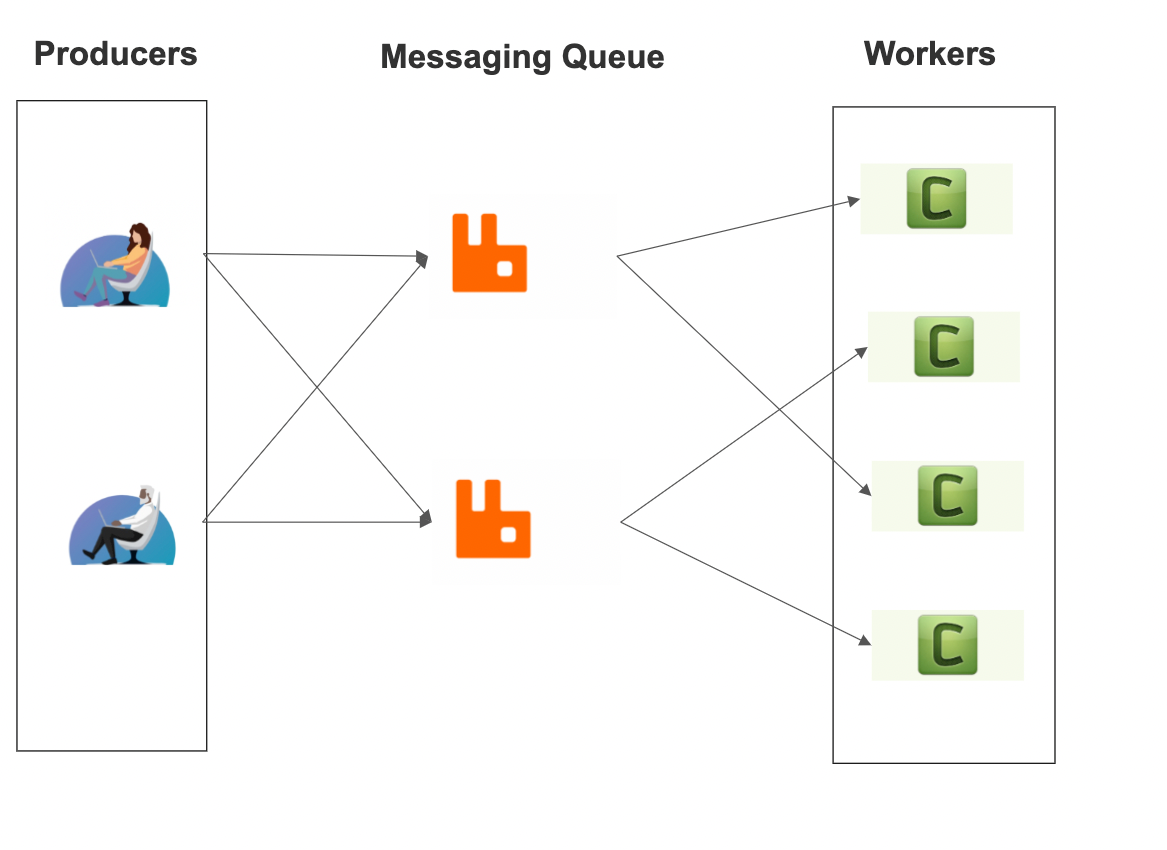

When the celery worker process is started, it creates a `supervisor` process. This then creates `child` processes (or threads) which execute the actual tasks. The child processes (or threads) are called the `execution pool`.

Celery supports the following execution pool types:

#### Solo (Concurrency Disabled)

This is a single-threaded execution pool which means there is no concurrency and the worker executes tasks synchronously.

#### Prefork (Processes)

The prefork pool implementation is based on Python's multiprocessing package. Since we are not running our `worker` on multiple CPUs and our `SMPC` actions are mostly `network` bound, we would get less benefit from a pool that spawns heavy weight processes.

#### Gevent or Eventlet (Green Threads)

Celery provides two green thread based execution pools, gevent and eventlet.

The two execution pools use green threads which are light weight threads managed by the application not the operation system. Green threads are excellent for `network` bound concurrency as they require very little overhead and allow code which was written to execute without `concurrency` to just pause execution until it gets picked up again.

Currently the `workers` in `syft` are using a `gevent` pool to process the `async` messages.

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://docs.celeryq.dev/">Celery</a></blockquote>

## Processes and Threads

To allow computers to do more than one thing, `Operating Systems` have the ability to time share a `CPU` between more than one program. To be able to do more than one thing a program usually requires some form of allocated memory so that the results of an operation can be used in another operation and the program can continue to execute until it is halted.

If a program wanted to do more than one thing at once in parallel a computer would need more than 1 `CPU`. Most computers these days have upwards of 8 `CPU`s. To keep memory between programs isolated (protected memory), processes cannot (normally) access the memory of other processes, or they could do stuff like steal your passwords.

Since a computer can have more than 1 `CPU` which shares the same `allocated memory` there needs to be a mechanism by which a program can do more than one thing while still accessing the same memory. To do this a process may contain more than 1 `thread`. These threads can get slices of CPU time to do their work and then get paused while other threads get their time slice of the CPU.

We want to be able to handle many actions at a time that could be waiting for a while doing nothing. If we used processes for this we would require another copy of the entire program to be allocated to memory, for each one. The time to copy the memory and the total memory limits make this unfeasible for network concurrency, so we will need to use threads.

### Threads

There are two types of threads:

- OS Threads
- Green Threads

### OS Threads

OS threads are managed by the OS and require some additional memory overhead to track them. They also require the use of OS specific `C` calls to interact with. We won't go into detail because we won't be using them for our worker.

To read more about them see this article:

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://en.wikipedia.org/wiki/Thread_(computing)">Thread</a></blockquote>

### Green Threads

As opposed to their counterpart OS Threads, `Green Threads` are:

- User Space Threads  
The OS does not create or manage them and the kernel is completely unaware of their existence

- Cooperatively Scheduled  
The OS cannot manage their time slices, so they must explicitly yield control to other threads  

- Lightweight  
Green threads are lightweight compared to native threads and the creation of green thread is comparatively fast  

In reality this means that systems which use `green threads` can often handle multiple orders of magnitude higher thread counts than `OS threads` because the memory footprints are lower. This is ideal for network applications which are `network` bound.

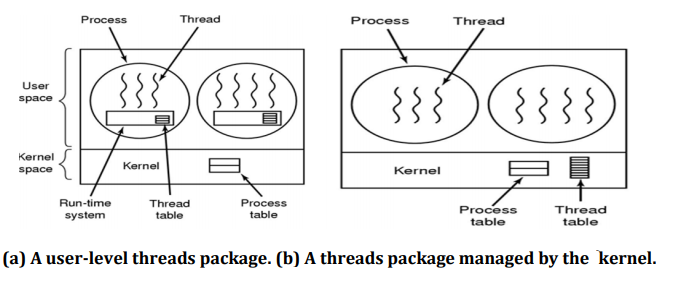

<blockquote><strong>🔗 Web Link</strong><br /><a href="https://en.wikipedia.org/wiki/Green_thread">Green thread</a></blockquote>

## Gevent

`Greenlets` are lightweight co-routines, which are used to create green threads. `Gevent` builds on `greenlets` and the `libev` eventloop to provide higher level abstractions and `asynchronous` networking.

We use the gevent execution pool to execute `asynchronous` messages in the `celery worker`.

```python
# packages/grid/backend/worker-start.sh

#Spins up the celery worker process in docker
celery -A grid.worker worker -l info -Q main-queue --pool=gevent -c 500
```

The arguments to celery are:
- `-A`: specifies the application name (grid.worker)
- `worker`: start the process (worker)
- `-l`: specifies the logging level during execution (info)
- `Q`: name of the queue to poll and execute tasks (main-queue)
- `--pool`: to select the execution pool (gevent)
- `-c`: to specify the number of child processes or threads to spawn (500)

All the `syft messages` which are inbound to the celery worker, are sent to the greenlet execution pool, which spawns a green thread to handle each message.

We might be working on a complex `SMPC` computation, where we expect a result from another client. However, since we don't know when the result will arrive, if it is not available yet, we can voluntarily give up control of the executor using `gevent`.

### Gevent Example

First lets see what happens if we try to do two SMPC actions which require results from another machine on the network that takes half a second to arrive.

In [20]:
# ⚔️ Runnable Code
import gevent
import time
start = time.time()
end = None
def smpc_action_1():
    print('Starting SMPC Action 1')
    # waiting for some network result will block
    time.sleep(0.5)
    print('Finished SMPC Action 1')

def smpc_action_2():
    global end
    print('Starting SMPC Action 2')
    # data here no need to wait
    time.sleep(0)
    print('Finished SMPC Action 2')
    end = time.time()

_ = gevent.joinall([
    gevent.spawn(smpc_action_1),
    gevent.spawn(smpc_action_2),
])
print(f"\nTime to finish SMPC Action 2:", round(end - start, 2))

Starting SMPC Action 1
Finished SMPC Action 1
Starting SMPC Action 2
Finished SMPC Action 2

Time to finish SMPC Action 2: 0.51


We can see that we had to wait for the first action to complete before we could even start the second one even though it was just waiting around for half a second doing nothing.

**Note**: We are using `time.sleep(0.5)` to simulate a pending network response.

Instead with `gevent` and `green threads`, if we know we are just waiting around, we can do whats called cooperative multitasking and tell our executor to go work on something else and come back to us later. To do this we can use `gevent.sleep`.

In [22]:
# ⚔️ Runnable Code
import gevent
start = time.time()
end = None
def smpc_action_1():
    print('Starting SMPC Action 1')
    # waiting for a network result doesn't matter
    gevent.sleep(0.5)
    print('Finished SMPC Action 1')

def smpc_action_2():
    global end
    print('Starting SMPC Action 2')
    # waiting for a network result doesn't matter
    gevent.sleep(0)
    print('Finished SMPC Action 2')
    end = time.time()

_ = gevent.joinall([
    gevent.spawn(smpc_action_1),
    gevent.spawn(smpc_action_2),
])
print(f"\nTime to finish SMPC Action 2:", round(end - start, 2))

Starting SMPC Action 1
Starting SMPC Action 2
Finished SMPC Action 2
Finished SMPC Action 1

Time to finish SMPC Action 2: 0.0


Since `SMPC Action 2` was ready to go, we can see that it was able to start nearly immediately and complete all while the first one was waiting on the network. This is because the `SMPC Action 1` is telling `gevent`, i'm waiting so I `yield` my CPU time to someone else.

As `green threads` are controlled by the user, we have to be careful as there are situations where context changes can cause bugs.

For more details about `Gevent` you can check out this great tutorial.

<blockquote><strong>📘 Tutorial</strong><br /> <a href="https://sdiehl.github.io/gevent-tutorial/">Gevent Tutorial</a></blockquote>

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## SMPC in Action

Let's see how `SMPC` works in the `syft` stack with some runnable code.

<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRjAjAABXRUJQVlA4WAoAAAA0AAAAYwAAYwAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBIfQQAAAGgRW2bIUn6IyIjI9W2Z23btnds27Zt2/aV
bdu2PTtqVVbGRXcp89/7iJgACCd/Y8btp9vKWAAAaqnThatfJpRSIXSdazGxlMZG
a1zXhUYJJRCkVWbb09sz3uDgTvb7WSmlzO0XBwD/3JNSns0RKqcAAIoZl5AYZzIA
AKqqQnBOiovrlyullGf/YO5I2+AUkfdKElBHO1JKWR5Afe2fFoNnL129fuPG9auX
zh7c/J/XdADKFN1gAEBK3pNFnQ1p7vjML4vfxUCfJIt2aLbqsc/2OzJIx2/77q9s
+jwBANXgwHbJ4v2fuqOCDNwhlpe8WSSCvqODfnpeAx7XXgau4I4f/YHsD6JLnY+Q
lDJ/59Dfoz6wA/l/cMezxwPJbVtv+yMnpX1n+w4Z+Piz7uCdCgN5sbATdwe8vMdL
e14Gl6q9vdRbdQmzrD3e2WtZzA1EMVmJeZ5xZmVTk5OIUSHgm3U+z0i55TcuNBop
TZBqlxzp5YvVuG6RyHAmWhdIj+fVUrhKIkA1ZnX+T3re1yWBWzR8QojBDyWCuf3j
dY2ESxF8WKFEMa8LNdQwMVNr+0QiaddTTRYWZpFK1yWa+TVVi4WBaOy9KxLRCz8r
GgmN87TrEtVtWZyHxLS4mQ4ucqwQLBRTq31fIltQn5khCJ51SqJ7/T0ugiKmMkXi
68yKNkkwgv7lQ0jeKslEEExL3y1RXmUKFkgRTXNxckqqSiA9e4NE+nSMEUDhFZ9g
JRuoSnFRdJVEe2diVDFMf8OP193SOitikAUSb2eMaQAA0Z/NRUweflEnAFxpIjH3
/6lwAG4sRU1OZhyIeOsYblc0lVBR+j5uzueCUr2zg5vsrxKaPEcif0BQLXsvdo/S
hXjxPnZ5XwvjK4l9YS3dqoOe3csw+6HnTNOsWejJ5XrCavx2xqbswe9Ycvpx/M6n
pZ/F70pa6v9BSuIJ/M7HR+3D74RprcVvlxE1F79VhjUIPWemrjdCzx4g9J/QK2wg
6FsPscv7jZLnDmP35FlCUxdjd0ajxOrtIDdGJcCrPETuNwWAf3Qat4c6ByApq3Fb
qBMAMDqh5q9kAACwd1E7+x4rArGbEXOmZ0Cx6q82Xg9r8eIgdideh5+HgEp9B63e
SiD2xl6sbuawQBDVLR8np7mAIMmrF3Dak0GCAdHCxuhpbR2CT1yLkLPkeQiRfXYF
n4e/K6GA0cmHzkANQibPr3BwcdbEkNCAfXcdl8NfMAgn/ycPkzu1BISXt83Hwx6s
Q5hJ2ug8LAqmxJNwAX1hDhK+SZkUwk9ilqLgX5hJIJIkdV6e9wqXPE8gsvS5cYVe
ezw2g0KkSXK7Am/91zWRgAtZhXteyq3HwZ3m6Fzv5A3Twa1KmeOOR06UUcDFyUNt
L9iDUsHlbx2x3WYfegPcr9Y95HOTfbihBp5MKbfJ57jEt7VCMng3q8lx24mU4zvQ
MBU8zr8fsvF8bvjyz28e8r0BCNKMb+uPWnvVDs1/df3Iel+nE8CSmok5H1frt2Dr
qbt5tj/37tltC/pX+zgnyaTgTgBWUDgg3A4AANA7AJ0BKmQAZAA+MRSIQqIhIRXs
BzggAwS2BtgCuCjVfvot96/Ib2SrB/Xvw3+U3Nbl37NP239w/ID58/431LeYH+ov
649ZDzAfs7+w/u/f7j9gPcx6An8p/rn/47D/0HP289Mj9t/hF/b/9vvaA/9/WAcA
12q/4H8hvQfxqebfZ3+jekr40OofEt9sPxP9r/bT2V78+AF+P/zf/Cfl3+SnIOgA
/M/5x/sfuO9Mr/F9CfsJ/rfcA/k39I/3Hqt/vvEX9H9gT+f/3P/nf4X2Cf/D/Qee
76U/aX4Bf5n/YP+j/gf3e+MD2KfuT7G/7AJ43H32bIPfV1ZQSdoGU92JRmfrtz+q
0puw85yx4qrz5TsSH5x912iBlHEY+xfneluU0vwSjMnGHRFgXwXXYALK8k9UMC5v
Wgr3TXDuJ7Stmo66PVjwbXmazL4L2TWOJvmrUqbu/3lTMEQEQLcHIojoMNcsnqDr
NMUm0fB9BaGyW1UAEoFmetzNftAcjTSswDVBe+1AAYqXOvgdQfzURAIWh1deoR6s
D7Xl/6FHNcR17zk1W54Zf7baf4NzJhd3qE9kSR5xWLTV8YcEbYArguPEViwOZ6Eh
ImDMY3FiSMRgvOtzxbug5cSYEsc2xucIQonf2IZfQBg9wgAA/v/oN2X8R59hrAX6
uBisLe/1gGv6JofL4j24b6pvEW79wOzdnebLYvFoZuatF8/dsZrJp9SfhqixZR2S
1POFQA99w8/eTy6bL0ppRLrRJkEdoklX1ehWjO2Sf69mDb3T/zMJCT5skZaLyrRf
b2fqX4Kv/e2EjerKV+xCdNLVtdU+ktKmUbhaTZrRLrxj+ukW3jkRO7VnQI0ciodk
8ZI9lUBUBoQdHob9TwRJn5DXFPcJxUi/iD1pDebSNf3Pz2/EhmWblMHLCP+Zn0LW
Q+F9oupaUV2zCU8J5GU9KRmQg9eEvdU1HXcL+IHck07Mf5YfBx02EXY5ZD/H9X3Z
ZcI358QI7zmma7wznB7SKuc9RCbi6SY/FLR69yxvKs69FTSRdoa40llqDaEuYs7y
ge0rLb4TFAygGVcDjXJqpaqYfXqSCbkd1RrZii+2dRv1UnaPAfqhEKpzAJaUIFL7
A6CgSItms+Q9iPkPjBRHTnduBcAR5OJI7Vd6eYx3GpX3vXOlSK4KcwFvLJWeG+ta
2nbdD7FnKJOu/9q9aU0UbKo0nOST7/fwT4lPxnKyFEr+XiFoK2XH/FtuYHmh1qtL
+b6gqfZbeoE8wMmnClofgnqxJc812yKyRaQF236q+a86h1TlAwifFff7NauX0fo/
07cNW/g9oaJAHKyHxKa21pLsw/HZqKv55N7DeqhFnNxWO5j8SB6PanfmZMeK/CKE
DyXqB9xbvUlNfJGC8w/lN0gP0aoqGC4Z4ty2vm765aYaiZuMCQVRJt/KnVPxDL79
w0enghM/6dsaCYd6QS4WiAMbYyVZtVTWA7MRoSU0iapfvwILJOAp/CN/N97y/7fA
mCiYW1o9tFnDZw15OsQw3YEkHLFD6F8Tp2d4+tD2iIfhBfLWzs/psgs1C2KVqEVu
M/+j4VBAyi6MMJzFjBSkuehPMz7BbfwDMY03xT4ae4ejNRCGB+KSaiN3Rk750NiW
V1n7s6ZxfCwlmHfAFTf86Y9IgE2JEVmg4Iox6c9+eJLwkMCvcrI1nqnTItHO9f4P
rEsWG/hVeRx4eSanSx3HSqPHH1NZlPuJDvBe+ilXBKggPrK9yU0aAS/rwO+GKmTJ
9mIeZlUIJ4Af7bqLdfG1MmBZvI3AD3TorjAzmZ8aeWKSTALuWCfl1TItVsulOFAa
xT1Kc70TZAqc1Ip1xlXUzQtCbd+4BQssGbz0lQnfpj4rK2tE/yjyqdMfAeWU12ik
flaoM9St/cshxMy9W1bc9Ygi8g+/pMIPBgS1I4FbMAmKB7qvBTgX8Frt3fWfe7iN
L/7bfykEXCD3qIhNoplnPGeqid4idf8tRkI5UFTdDrJgjaHsSkhjhSTjzjhYcNZ/
pDGvV3iSTFe+5Kcb7C/fFkR3YpRBtQT7IirMlLglMinwGTBEP54woseL2FEQfhjV
cbVXTMRP08A1ULLqOewo5qooICvj0///w/jl5/z3TppNaMwSXmKsX/CpWz4d/SEO
wIOBU7+1LEzlRmIRzuHkGtBy6rh8n91Kov8ilcEdCGVgcaZdPkLZSFxR10RB60Cg
x4ntcQ3I4ojyxpKe8kCY8m/fcBcoPvGSCheGmf5fvUmC6LxC/61Gna7iFJwuwMRl
bTuSYb6sVm5V806xp0GUKXy29uEyrdTjXpPiA4FtleHXVZb7V1jb16Gt3EBuGgb6
RzX8f8d6LThACaJqv7nAeyJ1WRnAYJ2CBCuR0MlGuQWd3cg0MDL+f+H7griBqGe2
HapROc1TpIIecVsaidl+/m/w/kW3eLHIMjJ5cbF65iSIFqJkQJrH5fn0QEa9IVpW
ZVznDxaEoL6NvFYriWTTum4la/R9Facts0BjeDotKCI/nWu6P17bCmNPnWdiQYIL
gp7jPUlakpv5QaT+w3Y+W7hfC2t/jLnCO87QDhubrasFsZLC+DiLgFS2n/+6NLYh
tB/dYGYAZVOgQWkWO+L4Cny47XdPEF5z9q+OmMGwXoxNQxePR1+j4FJQvWeA5OJU
JEZmCJUtUfIUwfHqEBT8y4b32LchlDnGbHdXaZ7BCR/QeRpMY5Uf5+Xgbfva3oWS
CoC1hvvk8fnnn/59OC3oWMhEh0B2J2SVXsc/IxubBBhT2qO4UOEGZAVqhzdHLm9F
7Q8aNM1e8uFTsFZmr2WCfiZb0f4951fFqxcAKAoS16HK1a/8WfHBP3mHGqtcRPmh
K3/xir4rd9CRqdBuu0oiciD/mdl412Jk2CsWm2aFuoDxsx8kvwYAaoetI/BlxZc0
SVsoIB0sDnuUuW6IrkKZnXgC6rTjsvu9DjJ9LTES+s5AmjK5d4mestcoWOUDYhxv
ZGvcgkCfDTTu8pVFiRyDAQjWp++zNV8EkzMPi6aJe9OHVJUrgUSgNgwE5nlxCaGv
lBobUYrHOhSptiLQ/vDKm+AlSm3G4j8GQBF+/+pTFgwIJL6hSWu/nf/dAIWSAOR6
C5RpFdOsltnNcrW1qWM9gJa9aLcVdI6vjzTb+RNLMQ0SAzssFGPeq+R7Fzcub0vt
bd7m2Fl9HHnIDotd4e/4ZP9DrpHJ+o6e80R/NnMw3nrBE+5MMHl3HPUyK4bcZJev
/LHCc5mh+Oo5HL2COv3zXykbg2q9FP+Y1dBjH0x9YV5o/7jV3vnl9Xz4jjbTCIIS
4Ss2anEFQckyc+LjQM2liXWTRSDytwHOA5cS6rWz3dkdpy+u2tst4nAuPlhXQpPs
0UujsixQ/absVYL9440fRxO2oVBvIAcLHzjsqnBx9DUqmPtfapaosaOmO1UVnt4P
XGiRnd4/mqMnOJ9kZM/4CneOG4i2wgbJAkURGDiyzbPPSa+E9YDFDuDKI0Wp/d1C
x/clfOHNNA/phW1bQKhDtmLDXn7wpdCS92n1AJKA7sCWluwPTXgJB7i1Q1kvqmmM
Cu0KGVLoTZwgRQYW2Ne8nFFFJtbH/X4cK/kjjQxqsdnWLIzko4L1iMr06E9DyuYf
d9W/6XAPBnsv62NhGUuQ6WfxCctD65xfXERD8hxJvHKaAa7/lM6W4/y+DD7E/n+a
XPGJgiOKP6O1fHxggrey+DqDkPUvWrgZ3LFfV1Zf7v/7FnMvnNy9S2eklrOe/rJ+
0/o9VyeqMT7p/NRm7yMdS0Q8oczaPRAfPjzkX4Op9uAu/2n8XuLhVJW/MaxgWkzp
T7KJBNOYgMGxU5ikiITE7KQqdmOcoUxAmAURV2r4QHcRVO9DxefWl+vv59Gfyjwk
1vYvNnbSwoulILAnp7pykZlQOgOnu3Lo5ySpjAcPFDGbZJm6q32peXWabycDbgCH
Gf4Owp5EhBWTJJ0z6hiW8fIbUlML3IAgEhzERx/jZiF7jF+F2fU7ZfZrBlYz1HLD
mNOOWryrenAeoLjvpyk380G9MifioUwG8wu+oLL4lwrBp3bkUjqDJweBJx6XElCh
YXbU8RNduQ7M6+3BRD2WgvPVeFs+vL7JhGihKZg9t1987iF+5I7GPbeTUqIUqEIP
RMHdaZhJE42leiRhVs+xm15o4MX1MnzXy2UTSdbjt+S18sUF8PiXpG/aFJrTsnyP
8B4IJjwujaCw3NhUxvUPlUP1ZvOOQHpXrSl/pHAd8ZLsWwswJnc5mJTmI4JzgZ9U
/4E772jFeA56o1iWE3osT//2yLg1eK10GAxRR5a0AoA0jCFtumufv+b5ZuSR6yaI
YSUbbcMrtmZXYUOBpgBGQ47U9wXLeAxT8QpBkoEE7WFBdxeFNRNucYuFpehKv1QR
Ht0o8RyTjiNCLL58GIZUV/du4cKXtoTDMvxXfHZPycDaPTA4jq0779ELL7gAVOig
IKnHEdfYazkwOwXE0u1N6076k7YfERWeASgiQ1mtfrt7KGzE9nEmftVcgRsdEGZY
PgwV1yS6VU1oa5LDtMpYoYwl1uX0kTj7IBM7U83zk+Sb/3o3Di/D3Xws3Of8SlrJ
sn/5xh5ARZPXu0TNbZEkCVp9C0Jxgr70Iy9KH3hRo0DiTa98rXVIpIYzfREvhwVC
VBMDW41FPScjqw7GHO31G5vQCss56385Dm6Zdyz7IRZlVbEge//ggYe/mYCXxjHw
6kK8hSl8W/HSgWMGxtk5qLdXl/6mLPanzbql4LYwT6Jb6fsvNMWPDXWZdpCVkdJY
UjhM5PFEDZtE1ApUYX+0waQlrpm2A7JQoiDjSs1MrvxcKJ35eM+Q+aWnISlL/KV6
E2pH/wDDwWHq6cnA7rSEE1eNVMwoQHdN6etMlbYWYha+VVqFEGznw9DPE5eBYgAA
PdvtrrXX0CbwtqeNjHoXgIuy7nFG2G9NlLxHIubHjxxzzeZge0HF2uF9Nw6+RBTb
uDQGAIw4Qa3jXxVdnhNBmAECrbUFfo7xHN2lWxhWjzBbhCsmfKsti3G6Sm9/7ik/
/4UqJK5VbgpHViAObOe56CxjuKSnlfZdZ3dz1mCaLDE3ottwAAAAAFhNUCBYAwAA
PHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1Q
IENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cu
dzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRl
c2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJo
dHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6
dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAg
IHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyI+CiAgICAg
ICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4xMDA8L2V4aWY6UGl4ZWxZRGltZW5z
aW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTAwPC9leGlmOlBp
eGVsWERpbWVuc2lvbj4KICAgICAgICAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+Mjwv
dGlmZjpSZXNvbHV0aW9uVW5pdD4KICAgICAgICAgPHRpZmY6WFJlc29sdXRpb24+
OTYwMDAwLzEwMDAwPC90aWZmOlhSZXNvbHV0aW9uPgogICAgICAgICA8dGlmZjpP
cmllbnRhdGlvbj4xPC90aWZmOk9yaWVudGF0aW9uPgogICAgICAgICA8dGlmZjpZ
UmVzb2x1dGlvbj45NjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAgICAg
ICAgIDx4bXA6TWV0YWRhdGFEYXRlPjIwMjItMDktMjZUMTU6MTM6MjgrMTA6MDA8
L3htcDpNZXRhZGF0YURhdGU+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+UGl4
ZWxtYXRvciBQcm8gMi40Ljc8L3htcDpDcmVhdG9yVG9vbD4KICAgICAgPC9yZGY6
RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">⚔ Runnable Code</h3><p>Much like training droids, these runnable cells are designed to aid in the learning process.</p>
</td>
</tr>
</table>

In [1]:
# ⚔️ Runnable Code
import syft as sy
import numpy as np

a = sy.Tensor(np.array([1, 2, 3])) # Alice's data  
b = sy.Tensor(np.array([4, 5, 6])) # Bob's data
c = a + b
d = a * b
local_c = c
local_d = d

Since the above code was executed locally, we have access to the inputs, but what if the data was on two different `domains`? 

How could we do `+` or `*` without copying the data to one node?

If you didn't shout `SMPC` with excitement, then perhaps its time for another ☕️.

<img src="https://media.giphy.com/media/9mmGD97xx2OAfb3AhM/giphy.gif" />

## Two Domains

Let's dive in and launch `two` domain nodes called alice and bob; and then perform cross-domain computation on them.

🚨 **WARNING**: This will require twice the RAM as 1 `domain`.

<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:10px;" src="data:image/webp;base64, UklGRt4jAABXRUJQVlA4WAoAAAA0AAAASQAAYwAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBIkQUAAAHwtm2bYdu2rQ/peiIyS6mtdNu2MWzbtm3b
tm1027Zt2zZrKREZcX/ILKWVklkiYgKY2JVF4bwDM3M4Gj11o9FRN2ZvpfeFo+7M
HG/94+//tiUeMJb7xk9++jnD1ZzNDu+9BzDn6PNNKetQnEHBV5SkQ8FoqfOOBrOC
dR9TrnQpGJT8VkFJb6PXFvOMcT1+rZCjTscafqVRjrpqAWvJeLOSdR9VVtQRuIbv
KkhBX6Rslxklv1aQog7FU/t8LemWEmsXBes+qiRVutxjtd/VFPUVijY5o8evFSQl
PbAKDgoOUpRU6VqwNuFZ91HlhrtXwBmewxpU6UOU7TGj5DcKklTpSofV9lOoJd26
Im6MzQw86z6q1HQeZlCwa5OifkjZYEYLe/xGQU3nNpT8fUzSw2vgWuNZ71GlMWeO
+dsYBf2cstbKkj8oqjHqRAwo+Me4pMc3xLfEsdGi8rjj6fd65YC/jFPU3ylbUvJn
BY07nOZvajQm6cEluFZ4NhwqjUm66s2ve917Xvf6Vxysaoyivo9vRcn/FDVhjsNh
HA5HSRNm6bn4FpRsJeVJphv0Y3rTM2tyLJysShPnsRMlXbkzblo2zvNbRc0+6A8U
U7IJHMe1Imq/aTmDJmO565RakJWeQTEdB5gDPOuNWqGo4zBrKnq9nm8wzBrM6PET
RbUxJ72JosGouwYz6s7wrP6wcitUaR98zbH5e9/3zlXxk5gZBX9WVDtzfnhnCih4
24MhhpufhYHRbHg2e1ypJap0EpjBhUqqdEgNMAMoWPUqJbW20vvoO7ZXTjnpkTWp
mwGY43eKam/U6dDnawqSgt5VM6PueOlQuUU56ZM4zlQlKWp/wAwDPDsPldTmnPRB
tg7KkpLu7VM3B0v4noLaHXQ4O2vMY4MGHJ7V71JqWZZ2WFW56ZF+E54dL1BS25Ou
/milWlZ6UoM5uFpJ7c96JKmeNdqggR5fUZU7oKzmrLhcQ48n5pzVyTyuWr7mWet8
Ver0JAcqqmtxOaDH25Vy5xaXA2PhclXqeBW1PJR8W0EdD9LtPRyD21R1LEv/3QJK
Pq6obmcd8wIPRv8aVR1TPGMTPAXvU1TXg35JScE+cyDpegds/JBS53LS8zDep6Du
B/0Zx78U50DS5SXLD7U4Sh3LYVFhdVY6QZJyp7IkXdSHFZ786UPuVe5Q1uMX/+Ut
G4DBpp86t1NJl35oLTBg1/sfT+p29cD1ew6AjSrNxWdjPENVzl3LQe/G8QpV6n7U
Z3G8VXEOBH0dxxvnxJdwvGROfBjHztKo6lg1ino5joWLJOVOZUn3roF5VnzKZ89W
7lDWuV986UbOAwsv+v1VXfv6joBt+NfLHpOyOn7fWb9cn89oXv6OF6pKOXcs5xz0
GVZ9QElzMOlJcKTiHKh0bQHvV5gDQb/Bser9St3LeiLm2UOhc1HnYXier9S5oI9T
gLGfYscqXTrAoOD5qnK3RvoYJWDGUQqdqnTtAAPwPEHKXYp6MwWNnl9q1KGRDsRo
NgbXK3Sm0nBD/Bg8z5aScgdyzpXei2dCz0cVktqflRf1UxyTmvFPSbl1StLxDpsI
R/+g716i1LJKp/zw0jVwLKWxAocrtizqcNbBWHrHnh3YF4wp9thDiy0bandKpul5
tTRqVZDeRjEVjM9Jw9yeofTLJdh0gFfdpxxaEis98gamb7DtntIwtqAaSmc+mVka
9N55qxTjjGKU7vnQ8mAzwAw2/8tdUhhV08pxFKWw22ZgxmwNbJNv3CqpCjEtTU5x
lCVd/6WdSzBmbgZs9O0jH5GkahRGoYoxVmE0GiVJuueQr2wAmNFGM2DJNp8+7EYt
/fVHfXjjJYAZbTUDGKz7pC//+z+HXPDQbbfffdtFpx/2/48/a90BgBldNLP+Ggv9
wRp974xZAwBWUDggdg4AALA1AJ0BKkoAZAA+LRCGQqGhDUabVAwBYlnAMkIT/+Nx
x/L0j7b/zAecT6KN499ADpN/3R9Ju7a/m34vftf6o+Any3+qftD/bf/D7eX9n3ru
YvMr+SfaT8n+an9q9i+8/3ef1PqBfjv8j/uP5g/mh7VeyZ0j+++gF63fS/9f/eP3
j8y7+69APrJ7AH8z/m3+d9Q/9r4GH3H1AP5Z/bP+B/kv3F/xv0pfzX/m/1H5b+zL
9D/wH/X/yvwC/y7+m/7D+//vJ/lv//9ansK/bX2T/16dagQq2tkungmcZ4pajjuO
s9LdslFQfk+y2sLhqtRkxcOkDFPPMIqB8Y/zfUbkquuifdS/t/GuCPFuyVsJcoCW
PfltIxzcmfWkh17yI1Ucw8VZB7fGgXxT7I1KF19g0M3APOMKjCmHlkGCuvfg3sUC
3CoM3AMvjUy7Rv193uOGKUL2ySECgi6E0OwjvWd4bT4Rw/HDZwPH86iVXUDFJwl/
6lxy7Mw3h5yMq0lVyBg5IPdsxfuFYfegMEPs4Fd6N5QOIBx4MiqWaVEBCLyT9Vxw
CR4LkMS5BnhK6/sr2IKjhf8WoPfIAAD+//7kQ90SX+2y+Kd1a1Oic564eoBRpV5O
pkZL5CHReAz47mEyXiD/yMCC3t9r6x1PoNG0BJ3qUCz90hvAtv3nF0vhDrnZI/6G
70Gb9MoXjDxLmyOGE2nS6G0tdSvO4yZ+4OQGig6HqLQ2q7Ec2aMhkkjG+abiL23n
28esodwafKsdkUMBJkjh7ek5FEh9za22+VQ+3XOsYvP8WgJ+8mcaWHN9jhtI3Ep+
cm2Ohy8D6ctEUm0cPj7hA77jIP/045gl/vWTSqfMiZNatJT5mrKf4/IHb4RqFt1J
fDeTLfnALEH3Ih7Bc6OIwHIpln+s5pmhCAtrSgG2Gi4x7q/8ZLuJ5veZd5LX/pNd
eQ4hDe6JA1/+uMWzrJwpu+sQqiHqN1hFklJ+9217YiaOfkvfhAp8NkpYySye2wiH
D3UAyfNyWTVgIw0adMjx0srgemGi968wV1fPP47VDOcBIE3P0O3xvxmlW6iKXW1B
01hqToPsjb6jvx5EJnqsR+3x8PGBRkz0uEt12h5/VgOv//hOMvltD8iciit3QWvl
DuoqOj4ZSsr6kQdXmahGCzgFmUC9nqXSwXRVjuBssRJfVSkp54QcH1n+QsJupqfm
ZndR/6HWZxUqA5RlXFi2Ly68HROFjtzFHFRIgbJ/8oKNIbHu4WWt3wECq4t8pCPP
nHlbPjv2ZfOnHI5T1+HvA3y1kPuRPmwMAz7Y2SywW1hX/lv4Fg6r0Unf0bpa8Zzy
8TSniXG1/8Dk+pcBI+YV+u+fxQ5g5P5mgWZ/GfTxOnKSCg5SasPPn1Waaa38Cr9Q
B6CgNg9/Et+FJw/acGGs7BPMJY3T/yUo1X4fL0wwvSLfT9fiYrjLjTrjOeBQerGV
MOpaRb14Dsz11Zx7jyEa5+LgKgmyZgV5AY5jgpLCXy2XnJp4ElxnOEQk+PdmXT9X
1Pm/+1mG27JCZ55yfgAxo5WNr0kC1ZQ3j3RIeH4f2xna8n1TfLB4bTFRu5irmHZL
xD+VGhoxRqxt/0J4TrVUxiZIQwXk7zbCWrhh1l7GuPcmDtODKscaJLrutRWjaUoz
HEWx5QVQHS3bR6uUMkae9CV0xmWBzwTg51VTo5KD6cI6IPa5kNqNSqVkIZ9iwbbw
IqsbhH5Pa/xQmEU7q4tjX6x6HOI4cBnc36FRLGq+VemQ0+Kmck+sgDNzOKgkeB/o
n4tLzpS/+15PdzIxCvBTU2WmW9qkTU2HAoCheQFgFONn+NggB+0l8y2mQayLQCfo
4nyTT8EopqwoYtpGLPi3NY4xZEO1lX6qJ/4bFrfeTSvI87awAFi+C8T70FNR6z+P
xDD/GcjW+QNaMD4jY2dwoyy/BRWt2F5tubcAaeXndOTFvLas9hmv8gGzxHPD6HuX
rGxIdvPFTUUfk6sMREWkfHh5XMtR/g8gU5+0U95/CqIW1rGqOxGRqZtwXff9CscU
e9abJ455Nm5IT2/lJvrcvLSK5LHhY4BjB6vayLl8ame6lLPYXyEWcooDCCINTzVY
TtycWAzKXb/ncUAlQg++6IjwXHwN2FufbFo+zlUu471hhkxHolrv9OJ4CLRD1dn1
dS7+1tZVl2f86IsILPJKCOxf+c6xjq0sZxpgIvv2hxOt0OoN5ISaoexqkNemE6VW
DtMoLjBvIjpFPNfsO5vLjkIo7JJRW8iqzYU0XY3kFGQ61N5KTJuRJ2y6nD90z82J
9LSjMMjZUwpbzXQgX/akwWEPUjBJdjCO9xhq6O0D0bIR6sUdYK7CSj73WNn2qrOe
ybU3rx0A2BVBGGK8a7iKsTE8FBO5J4Qc+P8P6A3pRS5a7zpuE1lu28nN+GpWsiCn
2OiC923My6FLy+KgWArbdqraJ1lahBNuayjR+EC+ZolY9ONU+4vt9XvQA0b9F+2b
hi/Iq2nxZuDAH83qtRdh7hksqCw3jrwaUBLUu2nwYAIcdI9ytkC8FSXA0lJCgxHY
q8cuvEBxkhTWUHCktF2xJWju65GbJ0xiJIQQSHC1oP9UhTt6hDM1vlGPz4aNri6H
2a1wekhi2srXkvEtWoGZtO8UUlCQ9zXdtXoEMBFnPXivAy4u2ldQjaRn7IpecSco
YuTg3ORtlAhdUJX7ZZy8n1cZmpwMEeQDN+iHbrorLj+JBZEpfkcDKF5W6lGEaKwI
mEl8vZTTviNu/kBBNCzWzd9EYYGQ8GyJkZjlOD/NeJzfyWvtaavhgO4oWM52YLYb
DN0DAzeQGTSGDN3hrw1/Fo6SZKxGt+gRAAt/m/Ha08BhQjc8k7nI//892lqmVTxm
3uliiiJFcvMOq+ULEBwvaUrnGUZyTodR+8+rATsoa6mvrr/+n5v6HCPOkZoHrIk+
K2G2twm0FOvM31nF+HvBIPyav5RHyjkpI+K1cotLlPMKQkR4thyZyz/v9jLDcSqp
m/IIVCTNq4L54deZIF70uU4ST6ODjpmLq96bBPOSDmCKKhhOmL91EymqNVQb//Dw
pUZnddl1EK3eMC/4mbQmjVkOweiArvmwBSoAAfh454Oa6JQ/2wJ3kpSilSlAIYnb
jJBubuiPko3CyeBiYXeUCBYks8CEoMar7v4ZaQ6whZums7QNm6WGqtYZ+ZY4vKQO
IMfgUtuxY9Q9tqdTH2kpJ157ePdVxgRDNkJf8kLSKulh4CK+NE/vYpgGJ/r40TJZ
0OIk/nfL1bsebhYFDm4DpQ+SYEmLxnkTrqswtS0ifpoCFGcncplU2cNYDsxpifLB
F+v+QwvS7/z/aiht2fgShGPB7FTB6AqD6in5LxpWmWz4ll5JZFYJpD88wDLH9A6m
KpfALqTiYWX2NFm/WmHe6Hi3ZCko8lrxrJ0g+wL0MPNKQyubEXa0HtdF2zaYRghu
B013JTGBt5RTrxf9p2ShE81hr9krhrYLbndkdQXwPtyF+86RVaiUzmbpy0QWye+N
gJIguTpX+kZo5TROK17S1J2GRE2AVy4vxJxlaQL5mefECzv4PZgx8kbYJ1g7zBC6
HB7IwcduUzPfKoj43kLTKsx/5a6oSH5DDJuy6B9NqkNrAaU5X8pRBOgn1+m9R5Ur
I0YRUnVqbUqrGX9Bl8w7/Ka3jljS8r88dt2Zk110kEoeAnwRp1O/3ft3PhrYWDpS
CRw01yVNT8aecFE1ZX4TH5mAiFCHT3uCUorspmL08V+Zw9pOdr0UnYb1VK8ifuwE
nUhLIsQIPJTo56qVeIHOn2SNN5vV2/+7oUz6T7jDLcJuD7dmK0t6g6SpFjB8/AX3
ftVxKiIL67YDShtNLqmaLpFVpRLkujIwh6Q3Shw7Dh1SPRBH2+urWgjVqJN6HGXV
OqBOmnHc7IXsT2br9bqSz5ZdPIYfGriJOtTcywEsgGKV9RrH/+l/aG8BBgGONoF5
ncC1+3uo/XMInqIT/p0uVccEYo/mAuAAzyfZkDEyJXbK+H3IJitFjK1FWFjEfAEw
lkXMA1BFO96jt1R3MkDQI58rZ5ozDwI7qip9iEdYVY++c3/GLkKeBwlwQlyK8fw6
GAB4AlhUcohKDJBZyylsRWsuhKiI3pvnv9iY/+AZD6Gox6fbXpP0pv/x2/9kp3/v
co6wGGUX2bQMCi5XYNrE4BnsBnKtUF7qKoZBuE4nHFxoRhEsOSQbXQ3/pjT+z6Dy
mtD89Q3IdCODPEebjf3GHPBlU4uvkSJUTR0WCmh2+J5u7Rg4DZUlymd+CddWb+eQ
VZq+YB/GsmyPLXu0AVvqWY6Qbq2Vb/sT85kP8SzB1xqZF0oIv9241PA6qyqt6QOz
pUVCaWzhwRo/mL3mhxUaD/2D3saRZRiNxBp5ywOToimXk9n9pDOQ3uFvPyVawfPb
GEiQ621mtLrUjPOPAwVSk1yWaYJSbvRgIepyq/k3+/4uh7kMyGVLc9Xw3+jAJg/e
YXQ2FmhEKOoPaffKQkFXpN+ZYx0YxHl//3N+SaeNhbjTkkU/LDNyz856KowbUB18
K7wqJqgeSCDS5ogotUMXQgshGeywI5JFbBFmZRoy56Sqo92SH/9feM5+iLugo4pF
c06LlV6v9yl15jbEaqH0DxoBK9RCDV5ZQOD3NsHaxL0hNLEclbiE/CpzO/SwvlUM
V1aVaicdNOllRL9D8zwQh343YmWwdTix+joUrh54G4+b4SOOOrpiII5Cyk0hnbJV
5XcK8TGl2hK77pmyhpy6sVw6LsG7X+yGyqcAOzbaMJ9N/z8G0rxIQ7CQf+Nuh/1m
BwhVWdRbctK10amxopDSwztAXDFs+icb4c6l4CFBDpnwgIy01rsKShqpC8AjhJH1
Rc8+N0BLkU2fD4A5mY3LPx/LE1CnlajIZ4IebwBDUrAmo7ogOhF6uHTFIa0rX0wM
R/+lzUmHuXp/65l6VAAKLJl8gAAAAFhNUCBXAwAAPHg6eG1wbWV0YSB4bWxuczp4
PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8
cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjIt
cmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91
dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29t
L2V4aWYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFk
b2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOnhtcD0iaHR0cDov
L25zLmFkb2JlLmNvbS94YXAvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDA8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhp
ZjpQaXhlbFhEaW1lbnNpb24+NzQ8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAg
ICAgICA8dGlmZjpSZXNvbHV0aW9uVW5pdD4yPC90aWZmOlJlc29sdXRpb25Vbml0
PgogICAgICAgICA8dGlmZjpYUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6
WFJlc29sdXRpb24+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6
T3JpZW50YXRpb24+CiAgICAgICAgIDx0aWZmOllSZXNvbHV0aW9uPjcyMDAwMC8x
MDAwMDwvdGlmZjpZUmVzb2x1dGlvbj4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yOVQxNjowNjowMSsxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgICAgPHhtcDpDcmVhdG9yVG9vbD5QaXhlbG1hdG9yIFBybyAyLjQuNzwv
eG1wOkNyZWF0b3JUb29sPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9y
ZGY6UkRGPgo8L3g6eG1wbWV0YT4KAA==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">System Check</h3><p>Discuss these requirements with your Mentor and if necessary follow the steps to complete setup.</p>
</td>
</tr>
</table>

In [25]:
# ⚔️ Runnable Code
!hagrid launch alice domain to docker:8081 --tag=latest --tail=false --dev

⠙ Checking for Docker Service     
✅ Docker service is running
✅ Git 2.38.1
✅ Docker 20.10.21
✅ Docker Compose 2.12.2

                              >\\)))\)<)  n<<\>>n                                  
                          r)\\)|))))))|)\\||||)))\\\                               
                       \\\))))||||||||||))))||||))))v                              
                     >)|)))||||||||||||||||||||||||)\<\\v                          
                    >))||||"/"||\\\"//"""///////"||||))|)\<                        
                   <)|||||/vofpqghgFu[II?[eLLuj1r</"||||))\                        
                   <)||||\oEkYYYbbbYYYbbYYYYYYYYZVJ{||||||)va                      
                   v)|||iSYbZZZZZZZZZZZZZZZZZZZZZbYbC)|||||)\<\\                   
               ivi>\|||/1kZbYYYYYYYbZZZZZZZZYYYYYYbbk]/||||||))|\i                 
            <)|))))||||/JYbgC##nj7jhbZZZZZbEfTJy5pSXk#/|||||||||\<                 
       v   i)))|||||||||pYZg2ut1oCySbZZZZ

In [26]:
# ⚔️ Runnable Code
!hagrid launch bob domain to docker:8082 --tag=latest --tail=false --dev

⠏ Checking for Docker Service     
✅ Docker service is running
✅ Git 2.38.1
✅ Docker 20.10.21
✅ Docker Compose 2.12.2

                         7*{{{{{sls*{ssc*{{{*{s{s                                  
                       {{{{{*****c<)l|xi<rx{r*{{{{{s                               
                     {{{*sv>\>i\)/;:==v{^;\>+x%cs**{{                              
                   I{{*slv\=;=\l?7yS4XZGdmCl"/"<l{{*{{gRQ                          
                  \ixv)>\/:l#3q4XYU$$UUU$$YXF*l{{{{{{*[yVXPPh                      
                \<>ii)|,` {SXbY&8U8&&&888bggXml>v%%%xclr[#pdEG                     
               ivx%v<^``_{EG&$8UUU8&&&88U&AOkbSr"++//|\>v7FmEEgh                   
            "%%%%>"/=-.+>6bX3uun6hVb8YbXg2pghhPVx'+////")<tEPPgggS                 
           %%%x%%|=+^```%dXe#Sqfnj[h@D83eCL#Fymkg"^/|///\<\?VXEEgE                 
         %%%x%%%%v/+;.. %EVLwj3jTmVk@BD84bddGPPkO!_+|>)"">)<{SXEEEd                
      I{%%x%%%%%%v/+;.,.}XPbkkAOk$YSLTJnd

### Upload Data

Let's log into each domain as the `Data Owner` root user so we can upload our data.

In [2]:
# ⚔️ Runnable Code
alice_domain = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into alice... done!


In [3]:
# ⚔️ Runnable Code
bob_domain = sy.login(email="info@openmined.org", password="changethis", port=8082)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into bob... done!


In [4]:
# ⚔️ Runnable Code
a, b

(Tensor(child=[1 2 3]), Tensor(child=[4 5 6]))

For the sake of demonstration we will use our tensors `a`,`b` but these could be real datasets.

In [30]:
# ⚔️ Runnable Code
alice_domain.load_dataset(
    assets={"data": a},
    name="alice_dataset",
    description="Alice's Private Data",
    skip_checks=True
)

Loading dataset... uploading...🚀                                                                                                                                             

Uploading `data`: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00,  3.96it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


In [31]:
# ⚔️ Runnable Code
bob_domain.load_dataset(
    assets={"data": b},
    name="bob_dataset",
    description="Bob's Private Data",
    skip_checks=True
)

Loading dataset... uploading...🚀                                                                                                                                             

Uploading `data`: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00,  3.10it/s]

Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


We are using `skip_checks=True` because we are not providing a `DP Tensor` for this example just to demonstrate `SMPC` by itself.

### Create Data Scientist Account

We now create two `Data Scientist` accounts, so we can experiment with SMPC functionality.

In [32]:
# ⚔️ Runnable Code
starting_budget = 999999
alice_domain.create_user(
    name     = "Alice Amidala",
    email    = "alice@naboo.net",
    password = "gungan",
    budget   = starting_budget,
)

bob_domain.create_user(
    name     = "Bob Afett",
    email    = "bob@hutt.pizza",
    password = "hansolo",
    budget   =  starting_budget,
)

User created successfully!
User created successfully!


{'name': 'Bob Afett',
 'email': 'bob@hutt.pizza',
 'password': 'hansolo',
 'url': 'localhost'}

Now, let's login to both domains as the `Data Scientist` and get a different `domain` handle which we will name `alice_ds`, `bob_ds`.

In [15]:
# ⚔️ Runnable Code
alice_ds = sy.login(port=8081, email="alice@naboo.net", password="gungan")

Connecting to localhost... done! 	 Logging into alice... done!


In [16]:
# ⚔️ Runnable Code
bob_ds = sy.login(port=8082, email="bob@hutt.pizza", password="hansolo")

Connecting to localhost... done! 	 Logging into bob... done!


Let's get a pointer to the private data uploaded by `Alice` and `Bob`.

In [35]:
# ⚔️ Runnable Code
alice_dataset_ptr = alice_ds.datasets[-1]
alice_dataset_ptr

Dataset: alice_dataset
Description: Alice's Private Data



In [36]:
# ⚔️ Runnable Code
alice_ptr = alice_dataset_ptr["data"]
alice_ptr

<TensorPointer -> alice:3316793986c8455facac0b0e41db2efc>

In [37]:
# ⚔️ Runnable Code
bob_dataset_ptr = bob_ds.datasets[-1]
bob_dataset_ptr

Dataset: bob_dataset
Description: Bob's Private Data



In [38]:
# ⚔️ Runnable Code
bob_ptr = bob_dataset_ptr["data"]
bob_ptr

<TensorPointer -> bob:4ae8889b15674cec9eb4bd675b89b94d>

### Magic Time 🪄

Now let's run the same example as above except with pointers to `a` and `b` on two different `domains`.

In [39]:
# ⚔️ Runnable Code
a = alice_ptr
b = bob_ptr
c = a + b
d = a * b

You might be wondering:

- wait, don't we need to create an SMPC Tensor first?
- what just happened, and where did it just happen?
- also, how can I get the results?

Firstly, no, `syft` automatically creates `SMPC` Tensors and handles all the logic to do `secret-sharing` transparently for us because it knows the `Pointers` are on different `domains`.

We will explain what happened and where it happened in a minute. First, let's try to get the result.

In [40]:
# ⚔️ Runnable Code
try:
    c.get(delete_obj=False)
except Exception:
    print("You do not have permission to .get() Object on the node. Please submit a request.")

[2022-11-25T10:34:23.888505+1000][CRITICAL][logger]][11796] You do not have permission to .get() Object with ID: <UID: c1c9b51e231e6a0976d279abec4fe721> on node alice Please submit a request.


You do not have permission to .get() Object on the node. Please submit a request.


Interesting. The Data Scientist is not able to retrieve the result of the computation.

In session 4 on RPC and Pointers we discussed how `syft` allows execution on non-readable data, but that the result of that execution is protected by default. If we want to get the result we will need to ask by submitting a `request`.

## Requests

In syft we currently have two types of requests:

- Data Requests:  
These requests are submitted by a `Data Scientist` who would like to view `data` that does not belong to them. They are submitted directly on the pointer and are then `approved` or `rejected` by a `Data Owner` or `Administrator` of the `domain`.

- Privacy Budget Requests: <br>
These requests are submitted by a `Data Scientist` when they require more `Differential Privacy` budget for `Automatic DP`. They are submitted using the client object and then either approved or rejected by a `Data Owner` or `Administrator` of the `domain`.

### Data Requests

Let's use data requests to retrieve the result of `c`.

Since the result is still split up into `secure-shares` by SMPC the requests are sent to both domains `alice` and `bob`.

In [41]:
# ⚔️ Runnable Code
c.request(reason="These are the Droids youre looking for! 👋")

Now we can view the request that was submitted to the nodes, by accessing `.requests` on each client object as though we were the `Data Owner` of each domain.

#### Alice's Request Queue

In [43]:
# ⚔️ Runnable Code
alice_domain.requests

[<RequestMessage: 29b90c9a9f224b37a24780c9aa99672d>]

#### Bob's Request Queue

In [44]:
# ⚔️ Runnable Code
bob_domain.requests

[<RequestMessage: bcb2f5b93a424126b831b848c853d91e>]

The request table displays the details of the user who had submitted the request, also the `Request Type`, `Object ID` and `Reason`.

### Privacy Budget Requests

Privacy budget requests are made by a `Data Scientist`, who does not have a sufficient budget to publish the result of the computation and needs more.

Let's view the current budget of `Alice`.

In [48]:
# ⚔️ Runnable Code
alice_ds.privacy_budget

999999.0

We can request additional privacy budget using  `.request_budget` using the client object.

In [49]:
# ⚔️ Runnable Code
alice_ds.request_budget(eps=11, reason="I would like additional privacy budget to perfom computation")

Requested 11 epsilon of budget. Call .privacy_budget to see if your budget has arrived!


In a similar way, we can view the requests, submitted by accessing `.requests` on the `Data Owners` client object.

In [50]:
# ⚔️ Runnable Code
alice_domain.requests

[<RequestMessage: 29b90c9a9f224b37a24780c9aa99672d>, <RequestMessage: a635cb0ee6ad4115a0f67b002d0280ba>]

## Response 

When a request is made by a user, it is populated in the requests table. The `Data Owner` can then either `accept` or `reject` the requests.

Let's accept the privacy requests and verify if there was an update in the budget.

In [52]:
# ⚔️ Runnable Code
alice_domain.requests

[<RequestMessage: 29b90c9a9f224b37a24780c9aa99672d>, <RequestMessage: a635cb0ee6ad4115a0f67b002d0280ba>]

In [53]:
# ⚔️ Runnable Code
alice_domain.requests[1].accept()

We could view that the status type has been changed to `accepted` for the budget requests

In [54]:
# ⚔️ Runnable Code
alice_domain.requests

[<RequestMessage: 29b90c9a9f224b37a24780c9aa99672d>, <RequestMessage: a635cb0ee6ad4115a0f67b002d0280ba>]

In [55]:
# ⚔️ Runnable Code
alice_ds.privacy_budget

1000010.0

We can see that the privacy budget has been been updated for our Data Scientist.

Now let's view the result of the `SMPC` computation by accepting the data requests of the `c` tensor.

In [56]:
# ⚔️ Runnable Code
alice_domain.requests[0].accept()

In [57]:
# ⚔️ Runnable Code
bob_domain.requests[0].accept()

In [58]:
# ⚔️ Runnable Code
smpc_c = c.get(delete_obj=False)
smpc_c

array([5, 7, 9])

Look, it matches the one we manually calculated earlier in this notebook! 😱

In [59]:
assert local_c == smpc_c

<img src="https://media.giphy.com/media/Ee2oeU9UR6igg3alHB/giphy-downsized-large.gif" />

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## Under the hood

Let's dive in and view how the SMPC computation was performed within `syft`.

First, let's inspect the variable `c`.

In [60]:
# ⚔️ Runnable Code
c



MPCTensor.shape=(3,)
	 .child[0] = <TensorPointer -> alice:c1c9b51e231e6a0976d279abec4fe721>
	 .child[1] = <TensorPointer -> bob:c1c9b51e231e6a0976d279abec4fe721>

You can think about `c` as a local `MPCTensor` containing two internal Pointer's to `secret-shares` belonging to `Alice` and `Bob`.

This validates our previous understanding that the output is `secret-shared` and is held by the parties involved in the computation.

## MPCTensor

In simple terms, an `MPCTensor` is the `command-center` of SMPC `operations`.

Since they are always created from the view of the `Data Scientist` performing the computation on domain nodes, an MPC Tensor knows how to coordinate its internal `TensorPointers` with messages to perform the operations between each domain and all other parties (`domains`).

The child values of the MPCTensor are Pointers to the underlying data (in our case the shares).

For an operation to be performed on each domain node, the MPC Tensor instructs each child `TensorPointer` to communicate the necessary actions to each of the parties involved in the computation.

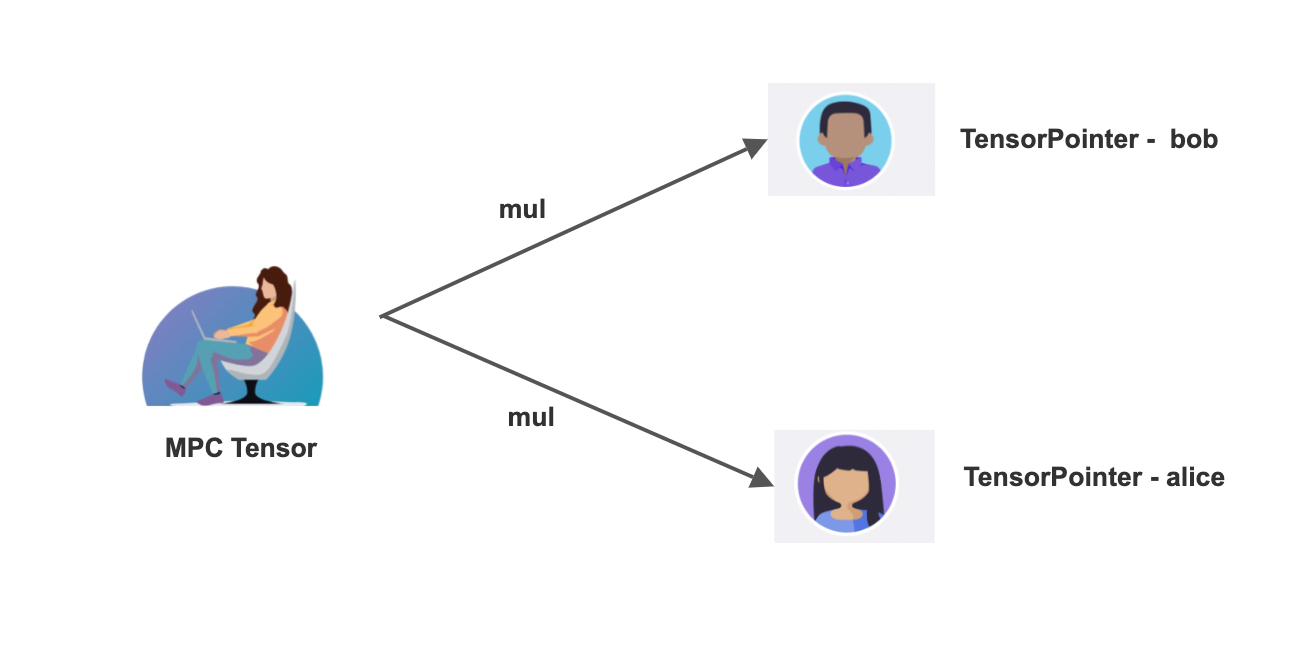

These `TensorPointers` represent the shares of the actual `Tensor` we assigned as `c`, which was the result of `a` + `b`; two private variables which are owned by different parties `Alice` and `Bob`.

Since we have already requested access to this result, we can take a look at the internal data of these two `TensorPointers`.

In [61]:
# ⚔️ Runnable Code
print(c.child[0])
print(c.child[1])

<TensorPointer -> alice:c1c9b51e231e6a0976d279abec4fe721>
<TensorPointer -> bob:c1c9b51e231e6a0976d279abec4fe721>


Let's get the shares behind the `TensorPointer` from each `domain`.

In [62]:
# ⚔️ Runnable Code
print(c.child[0].get(delete_obj=False))
print(c.child[1].get(delete_obj=False))

Tensor(child=ShareTensor(child=[-5264444949259628534  7192215424474594622 -6518908280734231467]))
Tensor(child=ShareTensor(child=[ 5264444949259628539 -7192215424474594615  6518908280734231476]))


Interesting. It looks like they are holding a syft `Tensor` which has another Tensor class inside called `ShareTensor` for it's `child` attribute.

We can verify if the `additive sum` equals the result we expect by reconstructing the `secret-shares` ourselves.

In [63]:
# ⚔️ Runnable Code
local_smpc_c = c.child[0].get(delete_obj=False) + c.child[1].get(delete_obj=False)
assert local_smpc_c == local_c
local_smpc_c

Tensor(child=ShareTensor(child=[5 7 9]))

Wow, thats cool. So those crazy large random looking numbers above do indeed add together to unlock the original value of `a` + `b` which we called `c`.

<img src="https://media.giphy.com/media/WtOdb75cMcjIK2jmTq/giphy.gif" />

## ShareTensor

You can think of `ShareTensor` as the work horse of the `MPCTensor`. They are always created at the site of the actual data involved in an `SMPC` computation and they understand how to execute the different `SMPC` protocols necessary for `Turing Completeness`.

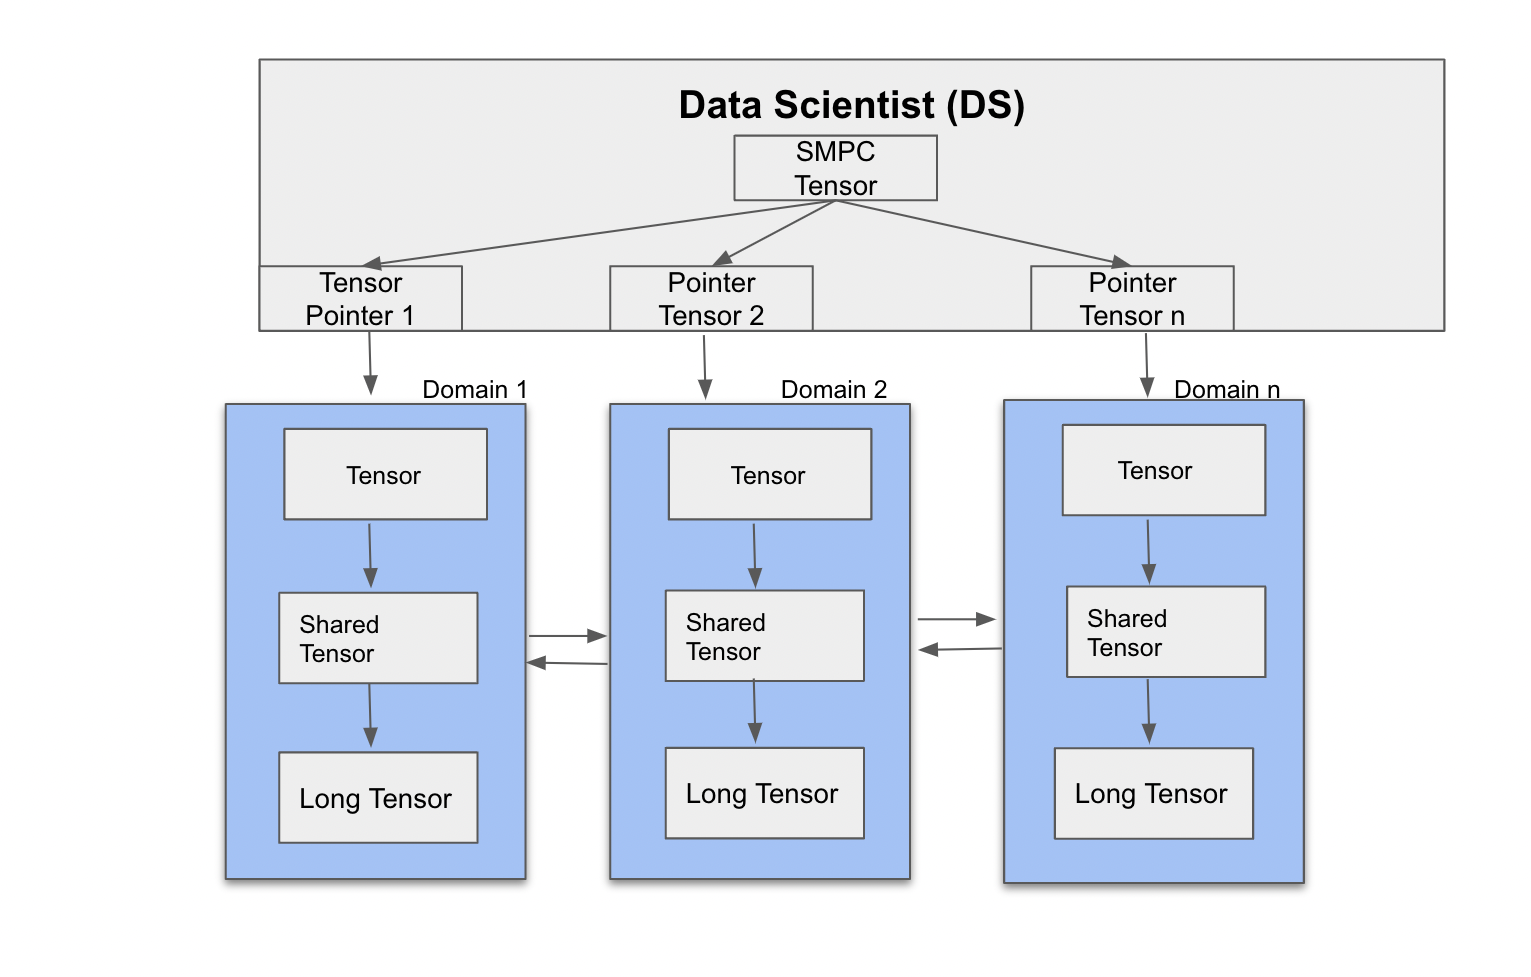

Each `ShareTensor` also has the context of all the parties involved in the computation and a `client` for each `domain` providing them with the means of sending actions.

This is particularly important for certain operations like boolean `AND` or multiply which require network communication between parties to compute.

`ShareTensor` is also responsible for `secure-sharing` any `private data` they contain with other parties involved in a computation.

To understand how parties share `private data` between each other we will need to dive a little deeper and learn about:
- Pseudo Random Generators (PRGs)
- Pseudo Random Zero Sharing (PRZS)

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## Pseudo Random Generators (PRGs)

`Randomness` is the foundation of cryptography because:

- Cryptographic keys have to be unpredictable to an adversary
- Cryptographic algorithms use additional randomness beyond the key

If the random bits are revealed (or are predictable) the entire structure collapses. Unfortunately obtaining `true randomness` is challenging and expensive.

In practice we tend to use a seed as an input to the `Pseudo Random Generator` which can then generate lots of `pseudo-random` numbers which can look seemingly random.

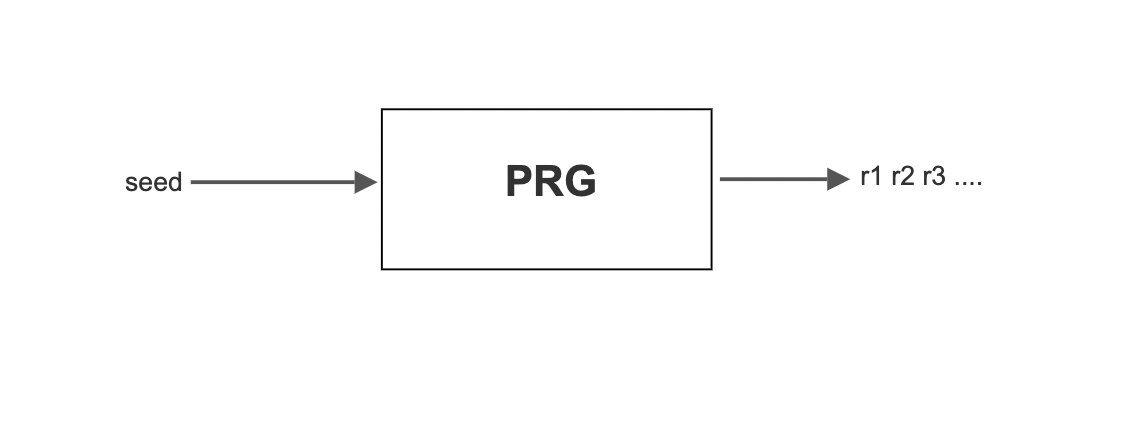

Using the `secrets` library (which is `cryptographically secure`) we can view a code example of generating Pseudo Random Numbers.

In [64]:
# ⚔️ Runnable Code
import numpy as np
import secrets

Let's generate a small seed number to be used to by the PRG.

In [65]:
# ⚔️ Runnable Code
seed = secrets.randbits(64)
seed

2131515007342991060

Now we can give this number to numpy's random number generator and use it to generate a tensor of shape `(3, 3)`.

In [66]:
# ⚔️ Runnable Code
generator = np.random.default_rng(seed)
rand_val_1 = generator.integers(
    low=0,
    high=5,
    size=(3, 3),
    endpoint=True,
    dtype=np.int64,
)
rand_val_1

array([[1, 2, 5],
       [2, 2, 0],
       [2, 4, 5]])

Let's use the same generator object one more time.

In [67]:
# ⚔️ Runnable Code
rand_val_2 = generator.integers(
    low=0,
    high=5,
    size=(3, 3),
    endpoint=True,
    dtype=np.int64,
)
rand_val_2

array([[2, 5, 3],
       [1, 3, 3],
       [1, 4, 4]])

It has generated a new set of random numbers and updated its internal seed state.
However if we re-use the same original seed again in a new genertor, we will get the same random numbers as before.

In [68]:
# ⚔️ Runnable Code
generator_new = np.random.default_rng(seed)
rand_val_3 = generator_new.integers(
    low=0,
    high=5,
    size=(3, 3),
    endpoint=True,
    dtype=np.int64,
)
rand_val_4 = generator_new.integers(
    low=0,
    high=5,
    size=(3, 3),
    endpoint=True,
    dtype=np.int64,
)
assert (rand_val_1 == rand_val_3).all()
assert (rand_val_2 == rand_val_4).all()
print(rand_val_3)
print(rand_val_4)

[[1 2 5]
 [2 2 0]
 [2 4 5]]
[[2 5 3]
 [1 3 3]
 [1 4 4]]


Yikes. Even though the numbers appear random they are completely predictable if we know the seed and the number of steps taken.

But, this turns out to be extremely useful. To someone without the seed, these numbers will look random, but for anyone who we give the seed to, they become predictable. We have a way to provide numbers that are both predictable and unpredictable depending on who we give the seed to.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## Pseudo Random Zero Sharing (PRZS)

Now that we understand how `Pseudo Random Generators` (PRG) work, we can use them to do `Pseudo Random Zero Sharing` (PRZS).

In Pseudo Random Zero Sharing the goal is to compute random sharing of `0`.

At the end of the protocol, parties P<sub>1</sub>,P<sub>2</sub>,... P<sub>n</sub> have shares X<sub>1</sub>,X<sub>2</sub> ... X<sub>n</sub> such that

X<sub>1</sub> + X<sub>2</sub>  .... + X<sub>n</sub> = 0

The protocol proceeds as follows

- Each party P<sub>i</sub> generates a random seed S<sub>i</sub>
- Each party P<sub>i</sub> sends their seed to party P<sub>i+1</sub>
- Each party P<sub>i</sub> creates a second PRG from the seed received from the previous party P<sub>i-1</sub>

PRZS of P<sub>i</sub> = PRG(S<sub>i</sub>) - PRG(S<sub>i-1</sub>)

Let's see an example in the case of three parties:

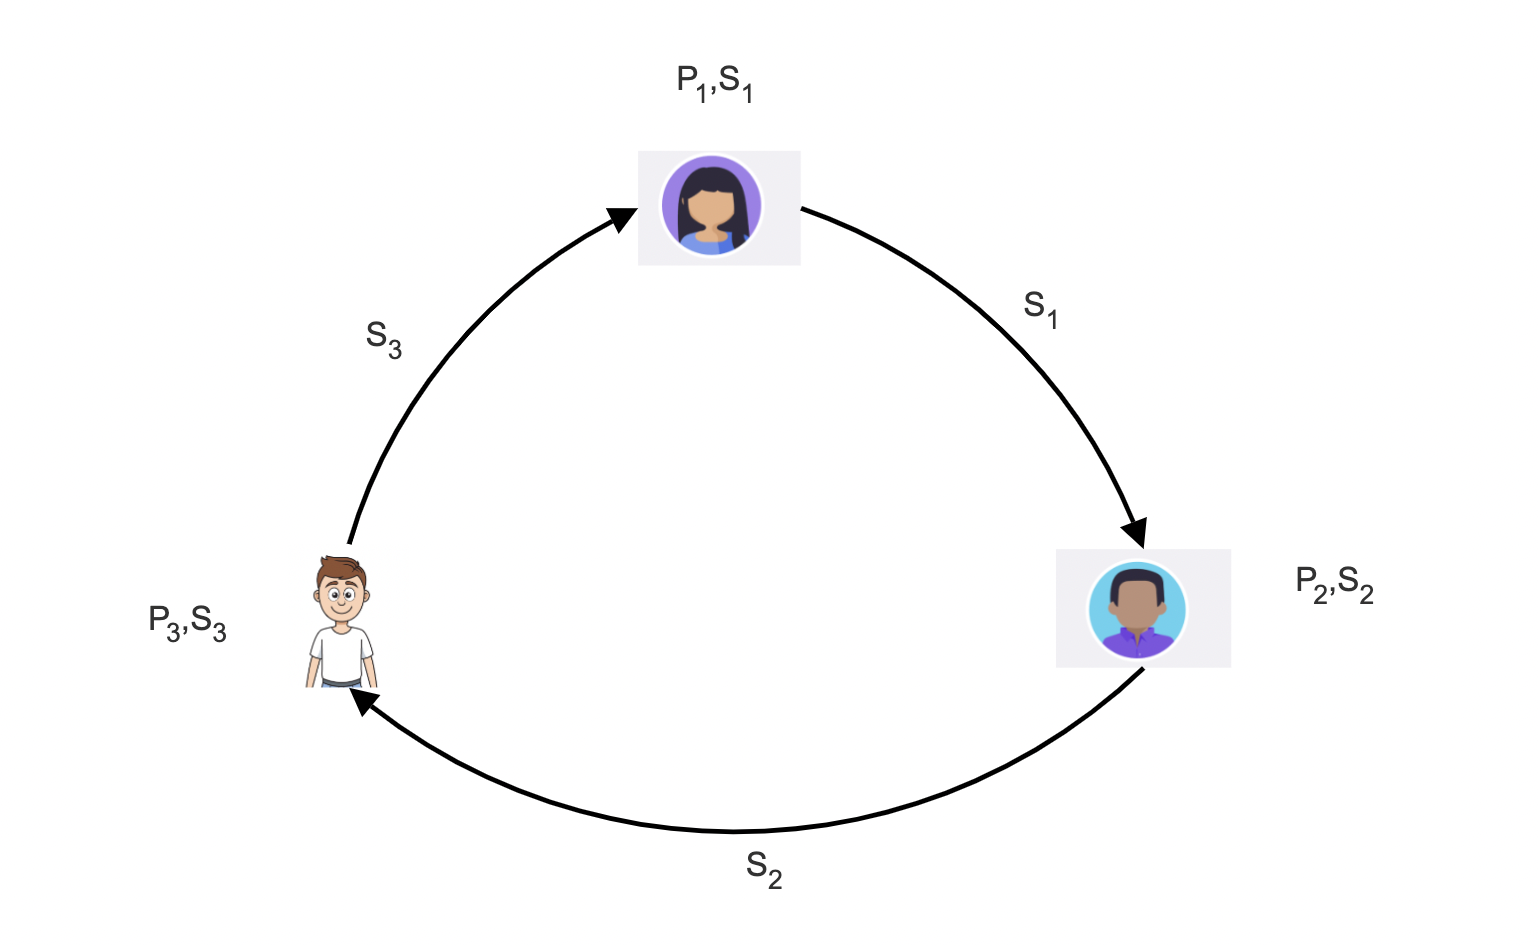

Each party would set their PRZS generator as follows:

Math:  
PRZS of P<sub>1</sub> = PRG(S<sub>1</sub>) - PRG(S<sub>3</sub>)  
PRZS of P<sub>2</sub> = PRG(S<sub>2</sub>) - PRG(S<sub>1</sub>)  
PRZS of P<sub>3</sub> = PRG(S<sub>3</sub>) - PRG(S<sub>2</sub>)  

We could observe that in a synchronized state the above will sum to 0.

PRZS<sub>1</sub> + PRZS<sub>2</sub> + PRZS<sub>3</sub> = 0

We can see how that works with code:
    

In [69]:
# ⚔️ Runnable Code
prg_s1 = generator.integers(0, 10)
prg_s2 = generator.integers(0, 10)
prg_s3 = generator.integers(0, 10)
print("PRG(S1, S2, S3):", prg_s1, prg_s2, prg_s3)

przs_p1 = prg_s1 - prg_s3
przs_p2 = prg_s2 - prg_s1
przs_p3 = prg_s3 - prg_s2

print(f"{przs_p1} + {przs_p2} + {przs_p3} == 0")

assert (przs_p1 + przs_p2 + przs_p3) == 0

PRG(S1, S2, S3): 6 3 8
-2 + -3 + 5 == 0


Of course, the parties need to be very careful with the two generators they now have. The one they created and shared and the one which was shared with them need to advance in lockstep with the parties who have those same generators, otherwise the next numbers they generate will not be the same as the other parties which will break the computation.

However if done correctly, this allows the parties to share `private data` held by them with other parties in the computation.

Let's assume party P<sub>1</sub> would like to share his private data `A`.

Each of the parties generates a PRZS and sets their corresponding share as follows:

A<sub>1</sub> = PRG(S<sub>1</sub>) - PRG(S<sub>3</sub>) + A <br>
A<sub>2</sub> = PRG(S<sub>2</sub>) - PRG(S<sub>1</sub>) <br>
A<sub>3</sub> = PRG(S<sub>3</sub>) - PRG(S<sub>2</sub>) <br>

If we observe the party holding the private data, in addition to generating PRZS, they add their private data to the share locally. This now means the values `A1`, `A2` and `A3` together represent the `private data` value of `A`.

A1 + A2 + A3 = A (satisfies additive secret sharing)

The initial `seed-sharing` process can be thought of as the initial `pre-processing` phase.

Once the seeds are shared, we can use them to generate lots of PRZS `non-interactively` (without any communication). This also implies that the parties could share their private data `non-interactively` (without any communication).

Now we have enough context, let us look at the code behind the operation:
```python
c = a + b
```

Where `a` and `b` were added on different `domains` using `SMPC`.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## TensorPointer Abstraction

This is one of the interesting and `magical` features of `syft`.

From the perspective of a `Data Scientist`, they can simply `+` add two python variables together and view the results by making a request.

Meanwhile under the hood, these Tensor and Pointer abstractions allow their python client and the `domains` with private data to do secure computation with these advanced techniques, without either the `Data Scientist` or the `Data Owner` having to have any prior background in cryptograph.

Since we know that `a` and `b` are `TensorPointers`, let's take look at how they implement `+` addition.

```python
# packages/syft/src/syft/core/tensor/tensor.py

def __add__(
    self,
    other: Union[TensorPointer, MPCTensor, int, float, np.ndarray],
    **kwargs: Any,
) -> Union[TensorPointer, MPCTensor]:

    return TensorPointer._apply_op(self, other, "add", **kwargs)
```

Here we apply a generic `_apply_op` function in `TensorPointer`, passing in the arguments and operation name.

```python
# packages/syft/src/syft/core/tensor/tensor.py

@staticmethod
def _apply_op(
    self: TensorPointer,
    other: Union[TensorPointer, MPCTensor, int, float, np.ndarray],
    op_str: str,
    **kwargs: Any,
) -> Union[MPCTensor, TensorPointer]:
    if isinstance(other, TensorPointer) and self.client != other.client:
        parties = [self.client, other.client]
        self_mpc = MPCTensor(secret=self, shape=self.public_shape, parties=parties)
        other_mpc = MPCTensor(
            secret=other, shape=other.public_shape, parties=parties
        )
        func = getattr(self_mpc, op_str)
        return func(other_mpc)
```

First, the `_apply_op` function does a sanity check, to see if we are performing the operation between different clients.

This brings us to the very first circuit example discussed earlier. Remember, to perform any kind of SMPC computation, we need to create `secret-shares` of our private data.

To create `secret-shares` of our input we initialize an `MPCTensor`, which knows how to create secret shares. This gives us two `MPCTensors` one for `self` and one for `other`.

Let's see how MPCTensor creates it's secret shares.

```python
# packages/syft/src/syft/core/tensor/smpc/mpc_tensor.py
    
def __init__(
    self,
    parties: List[Any],
    secret: Optional[Any] = None,
    shares: Optional[Union[List[Tensor], List[TensorPointer]]] = None,
    shape: Optional[Tuple[int, ...]] = None,
    ring_size: Optional[int] = None,
) -> None:
    self.parties = parties
    self.parties_info = MPCTensor.get_parties_info(parties)

    if ring_size is not None:
        self.ring_size = ring_size
    else:
        self.ring_size = MPCTensor.get_ring_size_from_secret(secret, shares)
    self.mpc_shape = shape

    if shape is None:
        raise ValueError("Shape of the secret should be known")

    if secret is not None:
        shares = MPCTensor._get_shares_from_secret(
            secret=secret,
            parties=parties,
            parties_info=self.parties_info,
            shape=shape,
            ring_size=self.ring_size,
        )

    if shares is None:
        raise ValueError("Shares should not be None at this step")

    res = list(MPCTensor._mpc_from_shares(shares, parties=parties))
```

MPCTensor initialization arguments:

- `parties`: Specifies a list of clients / `Data Owners` who will be holding the shared ownership of the Tensor  
- `secret`: The private data Tensor we want to `secret-share`
- `shares`: Input shares of the Tensor which are sent to the parties later. This starts as `None` but gets generated
- `shape`: Shape of the input tensor
- `ring_size`: The size of the range of numbers used for generating `secret-shares` (default 64-bit)

Note, only one of `secret` or `shares` can be passed in but not both. Once we have `secret-shares` we are in `SMPC` land and shouldn't be holding the original private data anymore.

We also maintain information on how to reach each party for executing any network communication as part of the `SMPC` protocol.

In [70]:
# ⚔️ Runnable Code
c.parties_info

[<GridURL http://localhost:8081/api/v1>,
 <GridURL http://localhost:8082/api/v1>]

The `parties_info` is sent to each party during the creation of `MPCTensor`, so that everyone knows how to contact everyone else.

### Secret Sharing

Since `a` and `b` are both `TensorPointers` which hold `private data` belonging to both `Alice` and `Bob` respectively, we can use the previously discussed concept of `Pseudo Random Zero Share` (PRZS), to allow both parties to share `a` and `b` amongst themselves for futher computation.

To create `secret-shares` we call `_get_shares_from_secret` on `MPCTensor`.

```python
# packages/syft/src/syft/core/tensor/smpc/mpc_tensor.py

@staticmethod
def _get_shares_from_secret(
    secret: Any,
    parties: List[Any],
    shape: Tuple[int, ...],
    parties_info: List[GridURL],
    ring_size: int,
) -> Union[List[Tensor], List[TensorPointer]]:
    if utils.ispointer(secret):
        if shape is None:
            raise ValueError("Shape must be specified when the secret is remote")
        return MPCTensor._get_shares_from_remote_secret(
            secret=secret,
            shape=shape,
            parties=parties,
            parties_info=parties_info,
            ring_size=ring_size,
        )

    return MPCTensor._get_shares_from_local_secret(
        secret=secret,
        ring_size=ring_size,
        shape=shape,
        parties_info=parties_info,
    )
```

It is possible to initiate `secret-shares` generation from either the side owning the private data or the side with a `Pointer` to that data. Since we have a `TensorPointer` we will use `_get_shares_from_remote_secret`.

```python
# packages/syft/src/syft/core/tensor/smpc/mpc_tensor.py

def _get_shares_from_remote_secret(
    secret: Any,
    shape: Tuple[int, ...],
    parties: List[Any],
    parties_info: List[GridURL],
    ring_size: int,
) -> List[TensorPointer]:
    seed_id_locations = secrets.randbits(64)
    shares = []
    for i, party in enumerate(parties):
        if secret is not None and party == secret.client:
            value = secret
        else:
            value = None

        kwargs = {
            "parties_info": parties_info,
            "value": value,
            "shape": shape,
            "ring_size": str(ring_size),
        }
        attr_path_and_name = (
            "syft.core.tensor.smpc.share_tensor.ShareTensor.generate_przs"
        )

        args: List[Any] = []  # Currently we do not use any args in PRZS Action

        return_type_name = party.lib_ast.query(attr_path_and_name).return_type_name
        resolved_pointer_type = party.lib_ast.query(return_type_name)
        result = resolved_pointer_type.pointer_type(client=party)

        result_id_at_location = getattr(result, "id_at_location", None)
        if result_id_at_location is not None:
            cmd = PRZSAction(
                seed_id_locations=seed_id_locations,
                path=attr_path_and_name,
                args=args,
                kwargs=kwargs,
                id_at_location=result_id_at_location,
                is_dp_tensor=is_dp_tensor,
                address=party.address,
            )
            party.send_immediate_msg_without_reply(msg=cmd)

        shares.append(result)

    return shares
```

This function essentially loops through all the parties involved and creates a Pointer and then sends a `PRZSAction` to each `domain` with the `random` seed.

For the party who actually has the real `private data`, we ask them to add that value to the `PRZS` share as well, just like in our example above.

Constructing the `PRZSAction` is similar to the `RunClassMethodAction` example we saw in the previous session.

Additionally, we generate a `seed_id_locations` random seed which is common for all clients; as a means to tell each node where to send its `PRZS` seed later.

In [71]:
# ⚔️ Runnable Code
import secrets
from syft.core.common.uid import UID
from uuid import UUID
seed = secrets.randbits(64)
generator = np.random.default_rng(seed)
print(UID(UUID(bytes=generator.bytes(16))))

<UID: 6a7f59aafa811203a3aa62b4f76c1850>


This `PRZSAction` will send it's `kwargs` to the `generate_przs` method in ShareTensor on the destination side, and then the function returns a list of `TensorPointers`.

## Share Generation

The `PRZSAction` invokes the `ShareTensor`'s `generate_przs` on the server side which generates the shares.

Let's break the generate_przs function into two parts:
- Generation of Seed and Sharing
- Creation of PRZS from the received seeds

The `generate_przs`, takes the inputs `value`, `shape`, `parties_info`, `ring_size` passed from the PRZS action.

### Seed Generation and Sharing

This snippet of the `generate_przs` function shows the generation of the seed and the sharing part.

```python
# packages/syft/src/syft/core/tensor/smpc/share_tensor.py

seed_id_locations = context.SMPC_CONTEXT.get("seed_id_locations", None)
node = context.SMPC_CONTEXT.get("node", None)
ring_size = int(ring_size)
nr_parties = len(parties_info)

clients = ShareTensor.login_clients(parties_info=parties_info)

id_rank_map = ShareTensor.get_id_rank_mapping(clients)

rank = id_rank_map[node.id.no_dash]  # rank of the current party
przs_client_id = id_rank_map[
    (rank + 1) % nr_parties
]  # get the client id of the next party
self_generator_seed = secrets.randbits(64)
generator = np.random.default_rng(seed_id_locations)
przs_location = UID(UUID(bytes=generator.bytes(16)))

for client in clients:
    if client.id.no_dash == przs_client_id:
        beaver_action = BeaverAction(
            values=[str(self_generator_seed)],
            locations=[przs_location],
            address=client.address,
        )
        client.send_immediate_msg_without_reply(msg=beaver_action)
other_generator_seed = przs_retrieve_object(node, przs_location).data

```

Essentially what is happening is for each party who recieves this action and executes it, it will generate itself a secure random number we call `self_generator_seed`, which will be used for its seed and sent to the next person in the PRZS protocol.

Then using the UID that it can generate from the shared common seed it waits in a `green thread` until the store receives the pairwise `self_generator_seed` from the previous person in the PRZS protocol.

Since we know how many parties there are and we have a list of them, we can sort that list to provide a deterministic sequential int for each party we call `rank`.

When this part of the code has finished each `P` in the below diagram will have recieved the initial message telling them to initiate the `PRZS` seed sharing process and will have generated and sent their seed to the next person in the diagram.

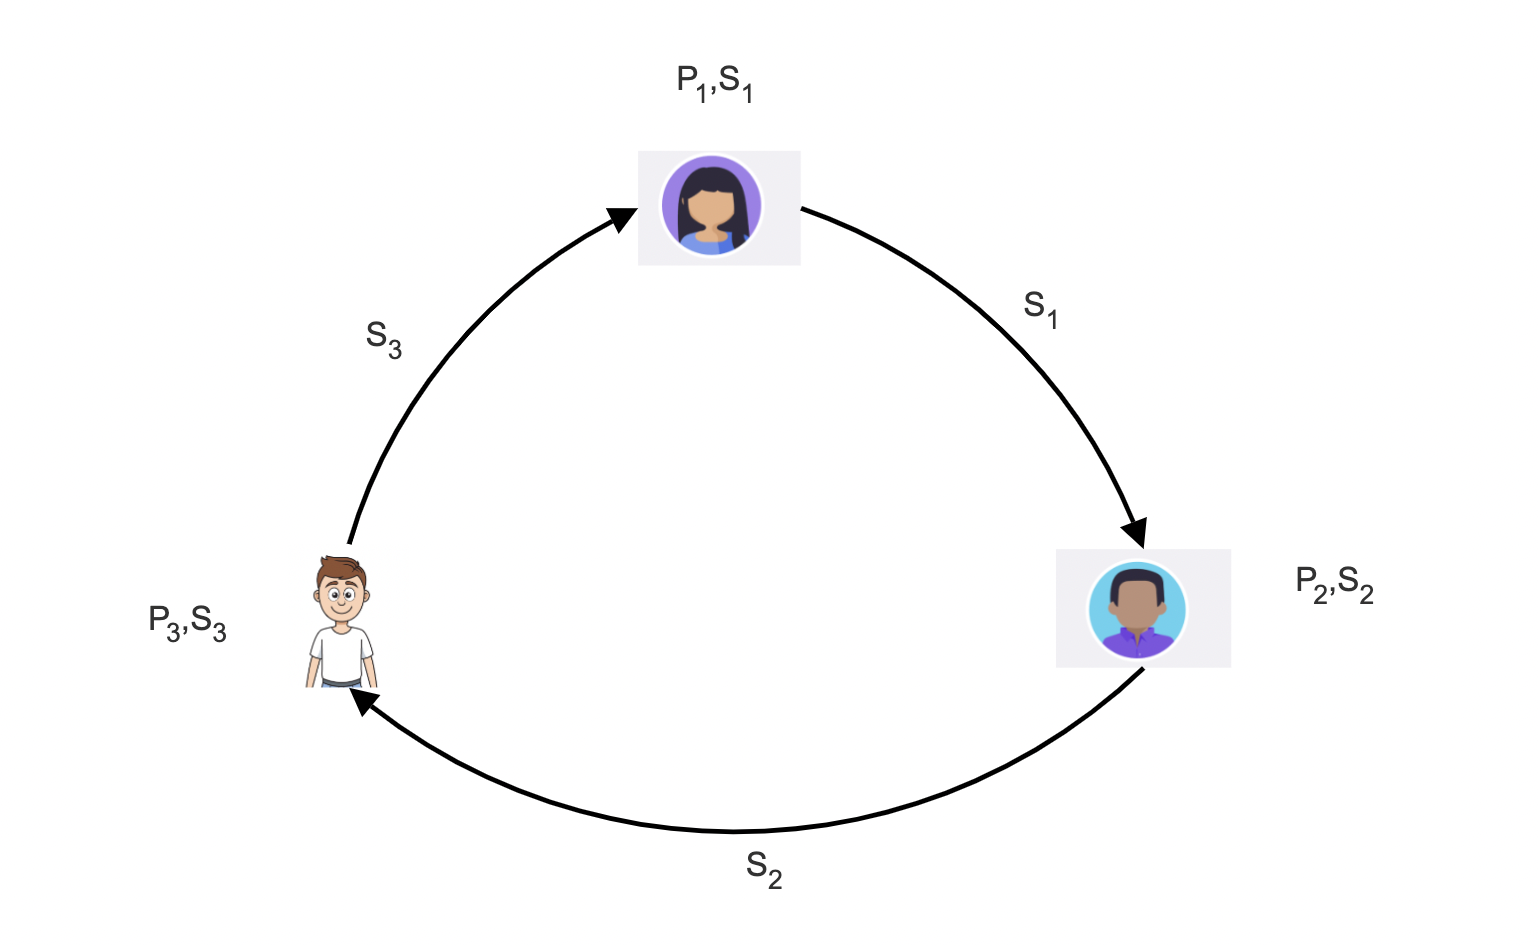

### Creation of PRZS

Now we can see how we create `secret-shares` in `pseudo random zero sharing` (PRZS).

```python
# packages/syft/src/syft/core/tensor/smpc/share_tensor.py
    
self_generator = np.random.default_rng(self_generator_seed)
other_generator = np.random.default_rng(other_generator_seed)

if value is None:
    value = Tensor(np.zeros(shape, dtype=numpy_type))

if isinstance(value.child, (ShareTensor, FixedPrecisionTensor)):
    value = value.child

share = ShareTensor(
    value=value.child,
    rank=rank,
    parties_info=parties_info,
    init_clients=init_clients,
    ring_size=ring_size_final,
)

self_generator_share = self_generator.integers(
    low=share.min_value,
    high=share.max_value,
    size=shape,
    endpoint=True,
    dtype=numpy_type,
)

other_generator_share = other_generator.integers(
    low=share.min_value,
    high=share.max_value,
    size=shape,
    endpoint=True,
    dtype=numpy_type,
)
op = ShareTensor.get_op(ring_size_final, "sub")
przs_share = op(self_generator_share, other_generator_share)
share.child = op(share.child, przs_share)
res = Tensor(share)

return res
```

This code can be summarized as follows, using our two generators, one we generated ourselves and one the party before us generated for us, we create two random tensors with the same `shape` and `dtype` as our real data.

We then subtract these two random tensors, which has the effect of making their result dependent on each input. Now we have a `secret-share` we can use on our data. We subtract the `secret-share` from our original data and put that result back into the original Tensor object and save it back to the store.

We can say that each party P<sub>i</sub> has set the PRZS generator as PRG(<sub>i</sub>) - PRG(<sub>i-1</sub>) as per the PRZS protocol.

Since we used `subtract` to relate our two combined randomly generated numbers before mixing that into our real data, we can use the relationship we showed before to cancel out these random numbers by simply adding all of them together later.

Math:  
PRZS of P<sub>1</sub> = PRG(S<sub>1</sub>) - PRG(S<sub>3</sub>)  
PRZS of P<sub>2</sub> = PRG(S<sub>2</sub>) - PRG(S<sub>1</sub>)  
PRZS of P<sub>3</sub> = PRG(S<sub>3</sub>) - PRG(S<sub>2</sub>)  

PRZS<sub>1</sub> + PRZS<sub>2</sub> + PRZS<sub>3</sub> = 0

Remember the inside of the `c` ShareTensor has these really long random looking `ints`? They are the real tensor data subtracted from a `PRZS` that was created from two random seeds, generated by that `domain` and the `domain` before it in `rank` order.

In [72]:
# ⚔️ Runnable Code
c.child[0].get(delete_obj=False)

Tensor(child=ShareTensor(child=[-5264444949259628534  7192215424474594622 -6518908280734231467]))

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## MPCTensor Addition

Okay, so we have the `ShareTensor` objects at their destinations, great. Now how does the `MPCTensor` that the `Data Scientist` has, actually coordinate the `add` operation?

Both `a` and `b` are TensorPointers, so we end up in the following code.

```python
# packages/syft/src/syft/core/tensor/tensor.py

@staticmethod
def _apply_op(
    self: TensorPointer,
    other: Union[TensorPointer, MPCTensor, int, float, np.ndarray],
    op_str: str,
    **kwargs: Any,
) -> Union[MPCTensor, TensorPointer]:
    if isinstance(other, TensorPointer) and self.client != other.client:
        parties = [self.client, other.client]
        self_mpc = MPCTensor(secret=self, shape=self.public_shape, parties=parties)
        other_mpc = MPCTensor(
            secret=other, shape=other.public_shape, parties=parties
        )
        func = getattr(self_mpc, op_str)
        return func(other_mpc)
```

Here we check if we're working with two `TensorPointers` from different `domains` and if so turn them into `MPCTensors` so we can delegate the work to that class instead.

The `MPCTensor` class executes all its operations by first creating another random `common seed` for `seed_it_locations`. We currently do this for every operation to prevent synchronization issues.

```python
# packages/syft/src/syft/core/tensor/smpc/mpc_tensor.py

def __apply_op(
    self,
    y: Union[int, float, torch.Tensor, np.ndarray, MPCTensor],
    op_str: str,
) -> MPCTensor:
    kwargs: Dict[Any, Any] = {"seed_id_locations": secrets.randbits(64)}

    if isinstance(y, MPCTensor):
        result = x.__apply_private_op(y, op_str, **kwargs)
    else:
        result = x.__apply_public_op(y, op_str, **kwargs)

    result = MPCTensor(
        shares=result, shape=shape, ring_size=ring_size, parties=x.parties
    )
    return result
```

Since we are combining two `MPCTensors` we end up running `__apply_private_op` because both inputs to the operation are private.

```python
# packages/syft/src/syft/core/tensor/smpc/mpc_tensor.py

def __apply_private_op(
    self, other: MPCTensor, op_str: str, **kwargs: Any
) -> List[ShareTensor]:
    op_method = f"__{op_str}__"
    if op_str in {"add", "sub"}:
        res_shares = [
            getattr(a, op_method)(b, **kwargs)
            for a, b in zip(self.child, other.child)
        ]
    else:
        raise ValueError(f"MPCTensor Private {op_str} not supported")
    return res_shares
```

The result of the `__apply_op` above is another `MPCTensor` which has `TensorPointers` to all of these shares we just created.

Each one is a new `TensorPointer` to the result of applying the same `operation` between all the TensorPointers inside both `MPCTensors`; by interating one `TensorPointer` from `self` and one from `other` at a time.

If this `MPCTensor` was `c` it would contain `TensorPointers` to shares that represent `a + b`.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

## MPCTensor Multiplication

Finally, to finish off lets show how multiplication works to create `d`.
```python
d = a * b

```

First, let's view the result of the computation

We can use our `Data Owner` accounts to quickly recreate the computation from before, but skip our need to request the results.

In [10]:
# ⚔️ Runnable Code
d = alice_domain.datasets[-1]["data"] * bob_domain.datasets[-1]["data"]

In [11]:
# ⚔️ Runnable Code
local_smpc_d = d.get(delete_obj=False)
assert (local_smpc_d == local_d.child).all()
local_smpc_d

array([ 4, 10, 18])

Just like before these are `TensorPointers`, so we know it will go through the above steps much like `add`.

The following steps will look something like:

- Call Multiplication between the two TensorPointers
- Turn the TensorPointers into MPCTensors
- Run PRZS creation by all parties for private a
- Run PRZS creation by all parties for private b
- Call Multiplication on MPCTensor(a) * MPCTensor(b)

Inside each `MPCTensor` child value we would see:

```python
MPCTensor(a).child == [TensorPointer_a_alice, TensorPointer_a_bob]  
MPCTensor(b).child == [TensorPointer_b_alice, TensorPointer_b_bob]  
```

### SPDZ Protocl

The strangely named `SPDZ` (pronounced speedz) protocol, was one of the first papers which demonstrated a huge improvement in `Secure Multiplication Computation`. When discussing multiplication in `syft` we generally refer to the `SPDZ` protocol, which is similar to the `Beaver Triples` above.

```python
# packages/syft/src/syft/core/tensor/smpc/mpc_tensor.py

def mul(
    self, y: Union[int, float, np.ndarray, torch.tensor, MPCTensor]
) -> MPCTensor:

    kwargs: Dict[Any, Any] = {"seed_id_locations": secrets.randbits(64)}
    res_shares: List[Any] = []

    if isinstance(y, MPCTensor):
        res_shares = spdz.mul_master(self, y, "mul", **kwargs)
    else:
        # ....

    y_shape = getattr(y, "shape", (1,))
    new_shape = utils.get_shape("mul", self.mpc_shape, y_shape)
    res = MPCTensor(
        parties=self.parties,
        shares=res_shares,
        shape=new_shape,
        ring_size=self.ring_size,
    )

    return res
```

Just like in `PRZS` we also use a `common seed` called `seed_id_locations` we will use this to generate a common agreed upon location to send and locate intermediate `beaver` values sent between parties.

We can ignore the `else` here and focus just on multiplication between two `MPCTensors` like our example above.

Below is the code which executes `multiply` for two `MPCTensors`.

```python
# packages/syft/src/syft/core/smpc/protocol/spdz/spdz.py 

def mul_master(x: MPCTensor, y: MPCTensor, op_str: str, **kwargs: Any) -> MPCTensor:
    parties = x.parties
    parties_info = x.parties_info

    ring_size = utils.get_ring_size(x.ring_size, y.ring_size)
    shape_x = tuple(x.shape)   
    shape_y = tuple(y.shape)  
    result_shape = utils.get_shape(op_str, shape_x, shape_y)
    
    # For ring_size 2 we generate those before hand
    CryptoPrimitiveProvider.generate_primitives(
        f"beaver_{op_str}",
        parties=parties,
        g_kwargs={
            "a_shape": shape_x,
            "b_shape": shape_y,
            "parties_info": parties_info,
        },
        p_kwargs={"a_shape": shape_x, "b_shape": shape_y},
        ring_size=ring_size,
    )

    res_shares = [
        getattr(a, f"__{op_str}__")(b, **kwargs) for a, b in zip(x.child, y.child)
    ]

    return res_shares
```

Remember above in the circuit example when we used `Beaver Triples` to solve our `AND` gate problems. It turns out that the problem is analogous to `multiplication` with integers, so we will use these triples again.

First the `Beaver Triples` are generated by a Trusted Third Party (TPP) and given out to each party in the computation.

In this implementation we will allow the `Data Scientist` to compute the triples and send them to each party. This assumes all parties are `Semi-honest` and do not intend on colluding. There are other ways to generate and transfer these triples that are more secure which we will be implementing in the future.

To create and share these triples we will need two ingredients:

- CryptoPrimitiveProvider  
- CryptoStore  

Our `CryptoPrimitiveProvider` is initialized by the `Trusted Third Party` (in this case the `Data Scientist`), who uses it to generate a `random triple` for the parties in the computation.

Each `party` (domain) creates a `CryptoStore` which will hold these `random triples` sent by the `Trusted Third Party`.

Once the `Data Scientist` has called `CryptoPrimitiveProvider.generate_primitives()` everyone in the `SMPC` computation should have `beaver triples` in their `CryptoStore` ready for the next step.

Then it's a simple matter of zipping up the inputs which are `TensorPointers` and calling the multiply operation on them.

Let's go see what happens on each `domain` which will get these `multiply` actions sent to it from the `Data Scientist`. Just like before we're dealing with `MPCTensors` on both sides of the equation so we dispatch to `private_mul`.

```python
# packages/syft/src/syft/core/node/common/action/smpc_action_functions.py

def private_mul(x: ShareTensor, y: ShareTensor, op_str: str) -> ShareTensor:
    seed_id_locations = context.SMPC_CONTEXT.get("seed_id_locations", None)
    node = context.SMPC_CONTEXT.get("node", None)
    
    generator = np.random.default_rng(seed_id_locations)
    _ = UID(
        UUID(bytes=generator.bytes(16))
    )  # Ignore first one as it is used for result.
    eps_id = UID(UUID(bytes=generator.bytes(16)))
    delta_id = UID(UUID(bytes=generator.bytes(16)))
    ring_size = utils.get_ring_size(x.ring_size, y.ring_size)

    a_share, b_share, c_share = crypto_store_retrieve_object(
        f"beaver_{op_str}",
        a_shape=tuple(x.shape),
        b_shape=tuple(y.shape),
        ring_size=ring_size,
        remove=True,
    )
    
    # SMPC Multiplication

    # Phase 1: Communication Phase (Beaver dispatch)
    spdz_mask(x, y, eps_id, delta_id, a_share, b_share, node)

    # Phase 2: Share Reconstruction Phase:
    res = spdz_multiply(x, y, op_str, eps_id, delta_id, a_share, b_share, c_share, node)

    return res
```

We can summarize the function by saying, we generate two new `UIDs` from our shared `common seed` for the `epsilon` and `delta` components of our calculation. Then we wait in a `green thread` until our `CryptoStore` gets the beaver triple sent from the `Data Scientist`.

Now were ready to run the `SPDZ` protocol in two steps:

- SPDZ mask
- SPDZ multiply

### SPDZ mask

```python
# packages/syft/src/syft/core/node/common/action/smpc_action_functions.py

def spdz_mask(
    x: ShareTensor,
    y: ShareTensor,
    eps_id: UID,
    delta_id: UID,
    a_share: ShareTensor,
    b_share: ShareTensor,
    node: Optional[AbstractNode] = None,
) -> None:
    clients = ShareTensor.login_clients(parties_info=x.parties_info)

    # beaver intermediate values
    eps = x - a_share  
    delta = y - b_share

    client_id_map = {client.id: client for client in clients}
    curr_client = client_id_map[node.id]
    beaver_action = BeaverAction(
        values=[eps, delta],
        locations=[eps_id, delta_id],
        address=curr_client.address,
    )
    beaver_action.execute_action(node, None)

    for _, client in enumerate(clients):
        if client != curr_client:
            beaver_action.address = client.address
            client.send_immediate_msg_without_reply(msg=beaver_action)
```

First we do the same thing as earlier with our `Beaver Triples` and calculate `epsilon` and `delta` (same as `eta` above) like so:
```python
eps = x - a_share  
delta = y - b_share
```

Then we send them to all other parties involved at the expected `UID` addresses. On receipt each `party` (domain) appends these to one long list at the same `UID` location so each party should have a complete set of all `epsilon` and `delta`.

### SPDZ Multiply

```python
# packages/syft/src/syft/core/node/common/action/smpc_action_functions.py

def spdz_multiply(
    x: ShareTensor,
    y: ShareTensor,
    op_str: str,
    eps_id: UID,
    delta_id: UID,
    a_share: ShareTensor,
    b_share: ShareTensor,
    c_share: ShareTensor,
    node: Optional[Any] = None,
) -> ShareTensor:

    nr_parties = x.nr_parties
    ring_size = x.ring_size

    eps = beaver_retrieve_object(node, eps_id, nr_parties)
    delta = beaver_retrieve_object(node, delta_id, nr_parties)

    eps: ShareTensor = sum(eps.data)
    delta: ShareTensor = sum(delta.data)

    op = ShareTensor.get_op(ring_size, op_str)
    add_op = ShareTensor.get_op(ring_size, "add")

    eps_b = op(eps.child, b_share.child)
    delta_a = op(a_share.child, delta.child)

    tensor = reduce(add_op, [c_share.child, eps_b, delta_a])
    if x.rank == 0:
        eps_delta = op(eps.child, delta.child)
        tensor = add_op(tensor, eps_delta)

    share = x.copy_tensor()
    share.child = tensor

    return share
```

Now all parties wait until all the `epsilon` and `delta` values have arrived based on the number of parties involved. We can then `sum` all of the `eps` and `delta` and use it below to generate a new combined `eps_b` and `delta_a` with our desired op.

The rest of the function follows the same `Beaver Triple` protocol, we viewed in the earlier circuit example.

Just like before we make sure to add the `eps_delta` constant to one of the parties, in this case our rank `0` party.

<br />
<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRnwiAABXRUJQVlA4WAoAAAA0AAAAYwAAZQAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBI5wMAAAGgRtvWIUl6oWTbtm3btm3btm3btm3bto3M
qlTE6x5Exhffi/8RMQGgv4AD6I/6cYJCX2HE5iJ1wgREXzHqlIOI+D4bcY7riIgf
ctHmevgvfFmKNPd/4bfOMmWP/gsDq2OGJbvjp82aI3fuVLEdImeu+/+D2sM68v8o
TnvUYkO23/kY4fMH/L9fX1zaPqtNAZEb5cD/IWqr0ksAYG9w/c39FyqGGTo9q0nZ
RBInwlA9iJ7xiRXbdBUN9s3tmNIl8tFJH6L/+GwNjY/onjcrF1FfhIOoIUv1ZTwu
nDfDY/0kFQ/iVLPhm+wcQCbVbPggBQfSXtPh/qgmkySACqrp1L6CmaRqG7f1zLBJ
Mx3+TGOmEn5E1JDHqWaqoyKvTx0mivWYG3WCYB5Iv/Smxgf61leMo7ARdICUKYIT
xMCnO4dXjepdv2KeNMnjR4vitEnifwmSPUaWjnt76ADbXm7+Vw35f397/+TBtfMH
NiyYOmXKtAXr9lx64dE+ZddTO8ib4d5qoDPbF6Q52EvSEe00Ej1CBJ1jNJrUWRLo
zPobSQ71FkHvYiT5ay0B9Mb+QNLdXALonqQRFFyUFPTL95He1+0UCDP5L3L8u1ND
2O1VYoKXqkkQ/gEk1X+tqghG3qPEszSDDMa+4ke72KPThOV7T5w8d/7C5QPLB9fN
Gk0Ao9/xg/htmCzKsqIoNpssCsDyPU/oKQImfcxVZBmzbOTqtt0s5f0cBdvYHQ6X
O0q0WPFiMbJd0/gJvXz19sPnr99+eHw/m7CBGNv9oVAoGOJB/3cHG5BiJEyUoNg6
H2ehKoxAiNvuRqSGvF+TmcjlNr8JIYFqfhaVrwSQyJ0244SHSGZkWuNSBOjAcYJR
Ql+NEE8So2yPkNJWRsUOkrJdMKghkhqZ0xj7LVpwkWBI6iAxrxIZ0hCJVdsbIWyk
Bg8KBsT5Roz2ugYYWAtp1U7EBwPFJcRMd4KRMR8RUwUMzR+wggFoBRcswWcJazYf
OHP9uUZHRWMABFHO6CUPANIQUo5BSg8dZRik9dJRikHWSDpKMMjro6Mog6IBOoow
yOejoxCDvJZQ0G8FRSyheMAKSgWtoIwlVApZQW3VChpYQlNLaEVHKC+DjnT0kxh0
14gINJGAYX8ivlYSgOVwGt4UBbZjSbibFxhPRQIvpgDWC/jTDiQB5su4U7dHA/bL
edNmKUBeaIgCZlzGV2QHEUyZp+foEYOHjJywZPHS/UdOnD934fqDF59//PgdGVQ1
dj/qiGB6UZRkWVbszqixYsVPljZDjryFipWqUK1O09Ydu/XqN3jUpGkz5y5YumHj
ho2bt2zbvGHDkpJgQgBWUDggeg4AALA6AJ0BKmQAZgA+MRSIQqIhIRXrHvQgAwSy
AEJCK+91/JT8gPlFtv96/DvG/F97Ov4PrP/y3qv/vX7Y+4B+tfSi8wn68fsr7x/o
Z/tfqAf2X0rv+h7EPoLfth6bH7nfCR/b/+f+5ntO//f2ANc3/o3af/c/yQ/aT1j8
PPi7205E3Pfip+2H47+2/t367f77wx+D+oF6c/xu/H53/nvQC9p/oP+7+4j0NP8j
0M+uv+l9wD+U/07/Ofmr6wHg3+Pf6D3AP5X/Rv9T/a/24/0/x3f8P+N89f0J/2f8
j8BP8o/p3+0/uX+S/8X+g///1l+ub9nv//7oP60f/ge+6nLHlXthQI0YCULCJ67g
Zit4W3QneQ2KXjVNaPM0QH2FTGE1m/zFVScSOwbgo8koZky1bTPe7UbyFX4TFX7m
J9GIc2Toeknlk5GUrIh5RUvZAXIp/gWFhTi+j1hsJPtMeUFNSaJCXtbZCSP4TW6H
9waRceufIvLjbKbpZZjgfXX921byCVvvg2b38K1WXfjZvkeJkQJCvZL/dipnXoRU
7Hnbzw55UUC3Wm9qJDg5tGpqf8XdrnhVt6RK1Y1OXZ+9mjOwWW4LwxWTQVqwhj/J
2LfFWsfhpgORCBt35xYL9zxrdMgA/v+GKqZS1ziiCybfC3dpeCGH5xbdKaq9HHCW
dkRYZP6oshhZjbBttYFtLpxnfT9v7R5o38yJgJy3S69/whP7s78RueeY/vuhwh+f
hTZ7uWMzPkvRYmWf1cKEbYPgT2f9LpGbG/+Dtn3Nw4noBBxS4CEiqqBS/8UXvDsU
1n54rfaYcHWsteKu0u+cGJLPn8ukMia6iDXW0di2IuzSkhUh33N+u0fCAfRnakD9
qwi/bsXE1lpruxNL39iyDzP6dzVncfueK00CbCR1AknrvhL09G6faIVbQYXrj/9m
EwOyc9kNlFklC4rTmnz7dh3Ur9nxHXgHWn0dia59uw/ihIf1SqbmpItg1k/KKHhN
kQAvjCrTB8oRL9T/xvJv8XvWTm2GvNpVtYe6DtKL/LLYxS9UEI5DQb+qxWUzcDSq
ZTUmzhc3CrG4cujsTEWxxSJfTmMqBr3EsuygLIq3C6SizqRVMRXzD/3qC6DJMOda
wj1BP4Xg+O9MPDtNq9yGxGO11M3zvDTPzNgPc/to/msUkzH0Hu9Ee6B2ZqKhyLwb
93XLpuqnF9/aJiVegMXvq9u4GSZl6UQJ/ynbqe24uzsYprvPIbt9XUOvrZyOI2UY
XKEpOPp09JzCkcJ5xQjGY1cuRqZnluX8Bn3nBqumDB4efND8PrwWCi5SaUHC+zVW
+757EXSZNbEZecd36srMBJdmLTTB6MvEy5CaaXuGa5gnTXGgNCuoSk3AtTbElpC8
GF3oX05nB9Dw1bTCuBl/g84d66mye+NPwiB4cMd2PHfSxvfmd9pzV9oB7qbCSmMs
Ux5z/cMRdWS6nbj0E5XGwrOwE/breFHkNNK3WTFhKkZ/KGokpeIH+HfUnAp6gTVM
rLy2bf/+N/FeqZut1tIchmi6lYulh+gTwpGtnU75VsgSKa01vFsdsx6UnelXZGdt
S+NwxEMxWmy+Vk1qDHnbQ+jFZdWuMd4MiCEMbY/s83e7rkMQMadI7xfPW9xqZAF+
IRiO41AQU319Ck22XRrFohOHWMVdUoqHuB2+3PrpwwOCmmQsZ4i4tEKntQGC3SXu
RkAc/413+G8VRk+jD5YM+rwjvXKnMv3g9+e4pOwN9rDEOxKvL8XSSvd15+x9rG9j
HfuEppJMejLGoJ1U6HnoJ6cXTfi7jOTrgJlKeKKw1yBhelEvpPsYsjf74GfX/aQC
E55ObScjR5tk83M9+vFmgDSOhTSbuIxKiIaVerYP6v0XDxOD1wrL4H88zWCl6CKd
UGNpPHO0QESmmXqGkbKKDqIZdU82li2MFWjfo0uoJzKL5yHwrflaAf6bpW4rbbQt
Y1+PdUSMiSP5Hlyg8Cx+bZcwGu2Tp2DfhgOnO5GegvyM/4mufgexKiLf7EUp1w7K
bAOmGI+yR+urvMsjr6XNJT54RlPMm967Ab0jrb2VabVmLD/g+aEntati7UPpS/fE
BeBfX0JfFZ7f5qWmPgGRSQDpvuGbJ3ctQs4AwPIzuYQnd/ITsT3tma3f/+DrjyKp
fsgLn8ke7JJNOZFqhtfzGCeSs2tUhmQT5OAm4Vck1+6G2EHDSM/f5iT0vxAcplA0
7ULMjSxo2YWTM4pN/sw4/OmI3q178ussx9IlL75s4nQo0iHDA63LYjd93rtjZfwf
h2lWqgJeuewIiw+eLmnecQ5/3HbBGtqvdQo7SEUpyqWji1uujL0e3rrZCXGc9geh
kdGNW5INOyU0qa/E7PUouPPCWMCxdw85xsPvKLKxotSjwJrO7SVzvDilkALSg6PD
ZREg1tulqTGSV/M0qAAI+lBmHf14/icijyZKbsyMRM4kyonk9IC2SaaEV0LF6hjm
2A4wIV1RbEmy6htPOV36CX6G5oOqra5gV9vE5OOln8XWYBCSt90lc5XTqUb0PX5+
Q95MQfJDfm8vlikHED4+7E8ChwRsDWh8HWzt02mQjW3+ukWR5cdYuz1P0Tm0PqdQ
JYTwUyogv0m0IWzHGJtc3Zv2V6brAMhdYSFfP4rlDtc5IdU51irioyDuOQdF0mS1
g3Qxxtgk5r3Il/MPXi2Jzz5KpdryMgbO3gp17X8gSi/aLtCkRhykl9hmGg0N4vTr
R5ROLhBZSmp/nsc8PYDBeFs1+oB/7iKUl7oT6ZY9a4oSgSeoe8Wv5LOAHaFVj7Qd
fMOkoTCKejL/o3hJWJeE5ZgvHVqv+vhgOs+nvtTVflis9JBwwrBMLsm0sdfr6G+b
LAwMRtPD4LkG7v/lYG+oA8DoH7/ybPbKZgzX3p0Pyuf2r2y56TjXxR1eQZTp/uCd
ugTNzSXkK0U2H/4pa3n5t8UlsO7bOKQRpiN8S2nK1kKglJuN4jod1Au+Pp2A0w/4
IC/9AzVuLNDw9GSFF2kx2l4mbtrZjT0wManTw8FJbdc9QvpKghAuIKssj7uJUGUq
nDMfjguiIQla7ipCLKQArVK17iaxZH8lz+NhPu3rxWhn0z8bp3oaPQ0C/PD5/hSC
DynutQcMUEvWjU6J7Kmyy3a51ZAtJnnuNH+eGmZ4I/DDEpBKtlDwCYKWS+zem3T9
iTNgFM13PMCILdQ49P7a3s286aLAda/559sANwBSyJyhC9ugQ+vpfN1qgebemdiw
JqhL+GPi6VDuz+0owmjTbcDbAl+s/rDQ2wFdpYawzbEuFp8MTg2zkrBbaBHz0JBv
ue1ncslZH/lT9IsuuV6AHhNS/m0WrMG8+BJWQSas8SiG42N70dQP85Fq3jMebprd
XPgguMoUgh7xaJECjBmVqiMT8//Qgh+TU6S/m9Px33+jjAEBMrgFkQZryTbfsamj
w/zLRXHbHk4Iy3jSosAP/5/8GLx1xuqqzbsf/oMKwignPwSqvWTZu+L5orbP6wMj
nLy48mNhOczizQaNQJC9grENf44XKBViPlhkwHKQ7uf5iMFrw32+rHwPNPoqtapq
diCXBBWf/qTOaKI9P0U/nqcZZeG7em9aS2Qm6aCXPR8xWR4L+L4MgRTcQfOAl8hb
LgbEoU+cF5MN6gAwf+v+ezLYUfGCb3EhnPI0+yoNU34sKUYeR4o7dVYmNZ4RTGTU
lphMBKdQzn6/6r2+ELtIz3gt22MsbpmBohXcDwioh743kcSddYYDueetDTznaqmg
NsE8FC/C3UxlIHvurd18XwmlyUV6UXMS+02eOLJI7JKnwOBx4A6K5fWtwOukEigb
11EjgPyT7Bnww4n+OtEnugAWFWv7phQ3Il9DtxixptOp62JHKTH0878P/JM65KC9
Uj8OtupqLg0YuoTHSs0asAqrg7cEZBime44NFlT/0DY+uL2WVYYiDr8hrA7Qf7f0
oQyxmv77SrygbWQX4xksCXS8kFZMGiDffFbPNk7MiMx19v8zI1eJYT9zGbDLlGce
c0/qTle7WuKUwNOICsmwKxXIy22k9zJuZQSv3k/zYoeuhDyb5cc9vyh6qyPb9EBX
y3v/nEfuZdCqYzWvydYFinbJWIwf02/UGwCJczgkR7HbkFoV7ePzY09L1oIl6YrQ
mYusmif6kZRGoJfBjqBdp75U7cnN/kjARaFgHo/dnz7Humc7QpIadqX/nWgz/VLt
Zy+SN0B/+ET+qhSPD5TiuCz1WHKup/yX8P+FZpOe9nMMzMlprUKzmE9o8OmBI6fk
vAtbMMqnnPmWWJVP5Exq/nOCtf0nlWy/g5VSEYPmko8X34tq56AGL4RyapW0TgN+
iTxKoFDT8PN31qk5+LHC2cVDfLXz1h0+5E7uuHjUE6WsU4GBeDig9Su4K/7mcn8Y
aF1X3ce8wM3iTlf+Brqpn1kiF89T/YJhZE2bMjpeLoFD742NnvP2dNLhoHGhIova
uuwN72hVjg9WxX64HWjA9R5CnGXCrr+4tE22AXkypm+mGjCaRALDF9TH8ZqgzyHW
9S05vgfui6gbe4sAtXMS6+KGpNhC6rCxhjUWk164a2uv6KxQ3HS/7jhWppxFuB5P
AdhXOyYxPZ8GO5+UFBhfxOLaIpYPZTX0CfVDzJZXBfIB7zPZo2YNPkzTIrFRX8B7
+hTGvf29UQk8z1w7xwuzG66YUBc8e4u7yXbmimq6LeKiITz39GucMD68Fz49HNMX
kn3NkU2mpfwArLh2307tNXS1C++e3Rwv1ftV0DTYav6qhaeE6370/nTKiDlxqGvX
lxkITueTbmSFjfrdtWchhiuCnvMR5w7RpUH8Ej0Fg6vwh6rKUtQgj1WNpuNOjsjV
49uy/D++v4MDQwBQK0H4WQ+an1iaMbSZ0wWZnKJPVmaGLjmpeuxb/qaYOFhgELYx
YHnxajqWmAor8B7R9Ak3TRz447iEtNzL8WobSgAAAABYTVAgnAMAADx4OnhtcG1l
dGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYu
MC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x
OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlv
biByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25z
LmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0
dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4
bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlm
ZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAg
ICAgICAgIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVu
aXQ+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlm
ZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlm
ZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjEw
MDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWURp
bWVuc2lvbj4xMDI8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8eG1w
OkNyZWF0b3JUb29sPlBpeGVsbWF0b3IgUHJvIDIuNC43PC94bXA6Q3JlYXRvclRv
b2w+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTIyVDEwOjU4OjA1
KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpNZXRhZGF0YURh
dGU+MjAyMi0wOS0yMlQxMToxMDoyNisxMDowMDwveG1wOk1ldGFkYXRhRGF0ZT4K
ICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1l
dGE+Cg==
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">Discussion Time ⁉️</h3><p>If you have any questions, feel free to ask.<br />If we don't know the answers now, we will find them out after.</p>
</td>
</tr>
</table>
<br />

<img src="https://media.giphy.com/media/3OSo3PPaXdw0U/giphy.gif" />

## DP and SMPC

Not impressed enough yet? Buckle up and hold on to your seatbelts.

Remember how we've talked about all this `Input Privacy` and `Output Privacy` stuff, and how we really want to make sure both the input is `encrypted` and that the output `protects` peoples privacy; and that all of that should be available `automatically` without any requests?

<img src="https://media.giphy.com/media/mNdOc0Aziv88E/giphy.gif" />

## Let's do this!

First we want to create our private data.

In [12]:
# ⚔️ Runnable Code
real_a = np.array([1, 2, 3])
real_b = np.array([3, 2, 1])
a = sy.Tensor(real_a).private(min_val=0, max_val=4, data_subjects=["alice"]) # Alice's data  
b = sy.Tensor(real_b).private(min_val=0, max_val=4, data_subjects=["bob"]) # Bob's data

Tensor annotated with DP Metadata!
You can upload this Tensor to a domain node by calling domain_client.load_dataset             and passing in this tensor as an asset.
Tensor annotated with DP Metadata!
You can upload this Tensor to a domain node by calling domain_client.load_dataset             and passing in this tensor as an asset.


Then upload it.

In [13]:
# ⚔️ Runnable Code
alice_domain.load_dataset(
    assets={"alice_data": a},
    name="alice_dataset",
    description="Alice's Private Data",
)

bob_domain.load_dataset(
    assets={"bob_data": b},
    name="bob_dataset",
    description="Bob's Private Data", 
)

Loading dataset... uploading...🚀                                                                                                                                             

Uploading `alice_data`: 100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 21.20it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!
Loading dataset... uploading...🚀                                                                                                                                             

Uploading `bob_data`: 100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 27.74it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


Now we'll use some of that fancy `SMPC` we've been banging on about all day, to do addition on two `private` datasets, between two different `domains` without copying any data.

In [17]:
# ⚔️ Runnable Code
res = alice_ds.datasets[-1]["alice_data"] * bob_ds.datasets[-1]["bob_data"]

Let's sprinkle in some tasty `DP` noise to keep `Alice` and `Bob`'s data private and their `Data Owner` admins able to sleep at night.

In [18]:
# ⚔️ Runnable Code
pub_res = res.publish(sigma=0.1)

Now we wait until our results are ready... ☕️

In [19]:
# ⚔️ Runnable Code
print(pub_res.child[0].exists)
print(pub_res.child[1].exists)

True
True


In [20]:
# ⚔️ Runnable Code
smpc_dp_res = pub_res.get(delete_obj=False)
smpc_dp_res

array([2.8125  , 3.9375  , 3.078125])

How cool is that!?

In [23]:
print("Real Result:      = ", real_a * real_b)
print("SMPC + DP Result: = ", smpc_dp_res)
print("Difference:       = ", abs(real_a * real_b - smpc_dp_res) / (real_a * real_b) * 100, "%")

Real Result:      =  [3 4 3]
SMPC + DP Result: =  [2.8125   3.9375   3.078125]
Difference:       =  [6.25       1.5625     2.60416667] %


<img src="https://media.giphy.com/media/5XqGhjDB48YqA/giphy.gif" />

<table style="border:1px solid gray;" width="100%"><tr><td align="left" valign="top" width="50px;" style="padding-top:0; padding-left:15px;"><img style="margin-top:0px;" src="data:image/webp;base64, UklGRu4jAABXRUJQVlA4WAoAAAA0AAAAYwAAYwAASUNDUEgMAAAAAAxITGlubwIQ
AABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAA
AAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAA
AGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAA
ABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAA
AIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAA
AAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENv
cHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAA
AAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2
LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZ
WiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAA
JKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAA
AAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYt
Mi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5J
RUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcg
Q29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBW
aWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZ
WiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAA
Ao8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAo
AC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCf
AKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEf
ASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJ
AdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKi
AqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOu
A7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTw
BP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZq
BnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgf
CDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woR
CicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxD
DFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62
DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFt
EYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRq
FIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReu
F9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7
G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8T
Hz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4
I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneier
J9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxu
LKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGC
Mbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbp
NyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTyk
POM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1
QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kd
SWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/d
UCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3
V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5s
Xr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9
ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5r
bsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4
d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/l
gEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokz
iZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLj
k02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3
nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adu
p+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJL
ssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2P
vgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6
ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO
1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM
4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO60
70DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH
/Jj9Kf26/kv+3P9t//9BTFBIywQAAAGgBUm2advqqYNn27Zt27Z5bevZtm3btm3b
PthrYvTH0d5rzRvvNyImACVU1gJQMy6y9d6HHNWvf//+gwYP6nf4/hvNOwMAWKNQ
fW0UMNvGI65785f2wnvvQ0gioej484dXLj1qzekAGF0t7QA07Xbzu/+yq4gIKd2y
299eu3KPaQFlVWVME9C64vEfRFK8j0n6mGIoPMn41QkrWMDpSmgHzHPoM0ImH4V1
lhRDIuPt200LmPIpDSx+4kdkComNTiGRzw+dCcqUzALznv4zWQRhGcUH8r1DHJwq
UxNaJ/5J+sjSSgjkEytDmdIYjXWeJaOw3DHy3+GAK4kDRneyEJbfkw8sBqPL4LDA
U2TBSkbPP/aE0Q1TGht9zSKxqp5hApRukNY4omDBCqfEy6BNQ7TCCWRgpaXGK2FM
AzSaL2VMrLh08jpoUzcFdSW9sPoFr4DW9dI4jQWzWPAWaFOfJuySkuSBnbwURtfD
YvGfGJhJqfE4mDoouJdZMJsSuB9c3yxOZ40ZTfx7Jdi+OOxEYVY9X3TQvTNY+hfG
vLDg8bC9UkrdzIKZlcR1YHtjsLVEyQ09H7G6NwqPMDC/kUfA9mSwXkzM0sczQPfg
cAdjjhg5HK47iw3bKJn6fCGYLsrhChbMc8FRsF0MVvmbKVORr04PBUDjcnrmOnED
GEBjiXaRbAWe0cWiHwOznfhJs1LQeIIxX8K2dWAMVmljzgNPhXMYw5CzyJdbtMNd
eUv8bQ1glrcZcyaeBwCr/cqUMxY8GdiPQbLmeZvFFHpmPfKjeXFt7kSK7XFH7pg4
SL3CmL0p6qupwKnmF6bsnen+oWTvLNc2Vej4n3C2a5sKnGn+ZMre6ep7xuydpN7P
nSROwL0MeWNiP9xEnzdJ3B1n5S7xp6UwMHeBz8+I9f8RyZrn1cBcHzBmreAUAI8w
5EwC9wFwYt4Sf18TwKY15jzwpWYNuA+ZsjYZDgaTGPIl/GdFGBisxCTZinwFGlCY
4S3GbAUOggVgMZE+V4k/zgMFwGDZn5gy5XkiDAAoh2tY5CmljjVhu8Bio3ZKljyv
hEP3Flcy5kj423KwPWgs45NkKPB6NKFnjUvo8yPy77LQvVrgG4bs1DgFBr1tQr/8
eH40K3SvlMHd9HkR4W5w6L3B4v8yZcXzGljVB1gcypCTyN+Wh0afLc5mZz5EeBAM
+m7Q8gI7cyGRxyul6gCL2d9mZx6kxpOgFOpqMec79FkoeBmURp0dZnyMRfXE80ql
NOruoJ9jrWqpxsuhNRrYhNlepZdKxcRLlTJoqMUMdzGmCnnWJgMaDbbA2aSvSvL8
ewdohYYb4JD/GGIlCvK5FeAUSqg1lrub9OVLBTsmKliU1AKD/2CKUqoUyCdWgzYo
rTFY7PyCyUtpoie/OrIFTQolVg5Y+6HA4FMpYkH+cOIcUA4lNxrY6bFEhigNSiGS
Pxy3EGAUym8s3Kan/UwyhZikLpJ8IMkXhy4GWI1qOg3MN+rlPwPJ4L33MYmQIhKD
994nkv99cukW0wNOo7LKGACL7nXDOz+z+xhTSjGx29rnDwxarRWANai2NgrALKvu
M/qsq+98+3d2G757/qYrThqw5cIAYIxCBrU16Na0zLnsqmuutfpKi87YYtDVOqNQ
QgBWUDggCA8AABA3AJ0BKmQAZAA+MRKHQqIhDBXrPhABglsAMURaFreJH2b8hPZP
qn9Q/AX5N/C/vz6A8p/xn9R/0392/Iv3tf4r2SfnP/ge4B+n/++/wvWN/a31AfrF
+yvu1/2T9ufcT+vv6yfAB/NP63/7vW89gj9wvYD/oP+K9Ln9tvgy/az9rfgV/Yf/
8ewB6AHCl/1Xtc/zPhP5L/Uftj67OQvrozUfgf9h/XuK34/6gXsnemQAfW/vlNV/
wF7AH5g+VL4SXmPsCfzb+9eiL/0eZ76o9g39a/+p66Xst/bj2KP1pU9b/HlT29UP
gOk1ocOhd7KIwhXsujqDwBQJVHh+WGmqNYv0ssvAOxFX7j6FQEG12XhHa2Y1DcUc
Ld1YCwWb64/7M1V2xIoEDnZSBBYnHb35VveydM/1bJpXyfYPngm3C8ux7bo5NkAU
RNzwHuGJY4mOq8wXB8ycpUe3ajsDMUMiXoIJwT9fxh0KdpHtGDqnUajPBddA/Jcq
W+SRxl67DGnbY8pucInlJhbjL/4e+rQyxqYukbtsOwecsmS88YjgJs9aQ3ddL5C7
0/Nd1CV1UDf07f/D5D0+2Xubgcnl77D/ig9AAP7/1feo9QUPI/kGnH426lUOcnBc
KFvgrKtbvfbSdmGYern/Sw8M/+AnpouCyB+fElMRnV0jdJzZ/XWVwC8+m2I2ncOM
ogp3NQvqk0bjdJU+Ne3dbAv8L3Uc23S5/ExF9VnHEK2a1yENQUqnX4N+6SOzD//R
rFCQjcOMGBqcnuL5tXvwow095jgHiBCdzkNLoLo8S8z6CgHeuBibiLGOWe6YAXQ9
DChogooOeLykDQLDlfj7VCsy2AluPd1D90xPKLYQzdirZCRfCjtLu5jaeQ0v26Vr
n7NMzZ+ZK9t2YvdCRbxkTlJfhKt1ImZjn6VdMG40siS9W/HbqU3x68wvIPAp4/xe
fX/Obejtp/x3AwFKxCep5BY8YIj4r2bYVoEXmhCOOCzSOz5HZnDi9V9R/LmKcL4P
Z0Q9xjwyQOzPbVbMRt6JPLWkSfOyQmnSCN2EO3xmzkqgr/QqIGv2AJErApMZFTOr
VRmoYzu7aYe3TYZLCXs97iNMf5uRfhaR/x3mBGBq0GX4HLBb5vG8usx/oy+2Vw+K
29/o71d8686Kc2c6w/oAkz6v31IBwJTr/xa5nu1bwADKKLSgvqCMFumhn5UtYJwN
Vb50C823r/e6vDBIBmMP+3NrgM8399iBczXadCjwtP0RqRxF+npIqhZ56tsQ0Gms
cBxWqDHWr2QkewSSbNy2nqWGXlSSR5gGzI997k8SW4tFwaHuxaNkgbmGxv2A1Wqf
2XeqVYkaHcxNIsewC7JJSx+mFhAi+4Y3sMg2j6iCXzMcbtL7iTPyEvDAI5L/td7X
06o5FKk+v4TUgZ1jmVR62NZQZu87okmHXiUblPMqlX+8UXIoGcLG28rrYmWLVlf5
4PGWqN37lwapi9wz7+F/haCbqVUKLXBvJ88ukSMUkKal9zvT/zP7aM7jLp7RMWnO
DXu3JgARDKErj8cMXo3hjCzlPyvSTOV9BwUkpWcTulMoADESo4d+KDPlVAed9Bg2
rAjmTsHWNKJK6FFYfDauJT1RWOoVDZnl60/JlswY0kx/DvE/fQOcC4xz/oglm/bf
V09iCYbASWOZM05eYnoRRXgrZxysDFHrA4qvTUHgL/w2lHLHdd3tF7lvVIP7c8Hd
Mhoe6yB8fktF+o6iRuctogeB4Wk6WAlzgHavfCbQZXlMU5+xuLnrbHBedNyGa3eR
2LARv8PQ093GK3qGfyadVpnbwMxzg9MSw5YYkePnnRaZ4Q9sWInFXzZKndFkItc3
daJt/Hd21Bq6x07kEpk1DkVJ8ShasNDERuqiaT/R27Hp7r/w11I2x2UYv2VdJ9B4
B165OqvMYtFhiM/Ge8FFD0QYHmOmUe6accn3xxsmza03FlQQl2/GB+DL+9yuPc4z
fjydZM6s0FT/Ydh1YXbB8CIGKCfjCHOIR8fEz7AuNGmKE9hcPrYZUKGKH2QuyzxO
0Dr2AWgdCTxDakmPSRhzGS4/AUDjRhSPUJhw8v5RRTLhxndqmRi7Bs1hCEi3VX/4
qhhrjK2BCW7KS60BBh2XRoEMfnBgEIg0D60qjwGIbq5qk0OoqwrACp4WN9ToTjmT
gBNLTOlydkoxVp7uad1rPymchKukOhyJB3I+pwMKhROsAJdHdFkgziVWR5psBWGR
TuJ68ySGCcDp5wYKhz55aaVO/Vx3lkXxTXMpvCqGd8hZlQ+vzJNhTPhi1ur8b+DQ
AKSvK6zyqMuK+p3/xfngEgKkfl0bh2S1aZeTppZbAMMLcBK/0W692Dc2tYFOGGs5
lIDMx1N08E557m85KYSqvCt9hmnGZQD/oS8idkwdO1VXgv53nP5PLiQ/JXXfPrVt
ytwbRDVEeGTesyU+Dfgsgl39jtsWuWyBaGuzPi4QLo6qMJyPivL2/dxqGxpzY0Ou
rFTdVk5MrsuuTkoKPZVlDfGGsbgFL4EmoDHHMnVF/KEB346+Hg+2IIPYxuq/cjH4
Evv+OyKj127Hgw99Xq6wHtzBsRs+DvvQ23gq4n5l+dFnssDwfD2hZkc7VvJxcNew
YL0TAfNgX8EfCnjdUg4LQM09RdNh/iWwogGcQHzgT6tJbIdWNEJL7x0uP57PFwYJ
b1gtxXV6kduTuNfcjCRQtuX5nvYBdVdMR6sL0h9nUX/twsaWic3/mNE+vvLNSsJ4
Up4H/SIqNM37xxphxzFyN4wW8/aqyF9Z8rsdQVMLmFryrwcJCcEi1Ub+X6oX/zQo
YHQlNj5WMa55Ewl74oGn3IV1YAuOf1uE0b5ccxADNNrMVd6MQhozMhmqL0KOOD99
6ngdyhKuMvv8TlTc2cZ3S8vjGaa1haI+hrRye/7b2pgFMpE5C86FDLo/Wstrz0pd
+B/X+Vf3DnbJ2kIRHSHRXsJW5DAaVhTLSG7dParbM/aC34xSIdHfv06Oc+z9n25d
Q7rOgo6XRtx7i2/u+qev6b1GACUFKEfTNvg4d+VSmO3EXBP7pWoKSTkSyYjojGOI
N02VP/QW89M/lMnxH3yDiQb0oMnZyauWmDURCpqTH/J+RPADITYRNPy9tPFuShTS
uRY9VWnHisoa/GTpUkEtTCPWDT+gIYCL6ZunSK7/nQDsDbEogIsMfLRgcfPzw7sF
IlF7NU/o3nVSeDNNC3LoJj57q44rP0Buf4XTZmgNDSUq9GzSIywuU8ANSCzws2Oq
cSQMBJqTfaMyqszJ1UpZrwW6KS2w0dTo/ZIslD9MJ76fYctwUy5e3aExmgtwOF7b
EHMqvInwDH68cwfzRp8kdj+kTjPLQ9XvzxTf9gypE7zAuczgOEwnuQMd1Wkahm7s
2B3b9jDT0c49CqMrR9c9CIo8j4jzO1FdrFo2vLMBBg3++SFAFNWq1u1zaUOrIAwJ
+5hXeGhcvGV+CDrPbH5Qu6DquPxg6M3r+BidXkIGqwEvD6y36T/WWXtELSGc8EFX
zx8H5Ec+2PcwwPAocjpP02D2KRM8OAAggO+8L3gm4D9WzBoX7wPJ6bAhKuslybaq
PfSCyoEkz4SakURUVh0j01qEJXDPD0lCmeFp0nBWYemxhN83+2ecKiAIYPeXObPb
bOXpVpNH9GnCKMpgBpTMMx1oPCugeGpX8LHau6GkdXLzzHDSd/ik7rJl+LtMye3J
YcdtDZwqDMkQaqdQ9zALPauJxQIkmzxF/lM/rEf/P11Wt8VxkLlN54VQl/iHKOVQ
XL6F48bocjl6MK2YYy8H/6EY8DFz2MU5I/VRz7OgbdLaiLATXe9+bVD9H5RaQ+MX
mzNvrucPcuyK8/CFYU8EomtNTNGZ8fMYgk1yIqq6glClIZisc0WE9Zen4/WVv8Kv
OivBqdbFbIhrR048uuQ1SmUikuBa7+AQy9ipc5JxA0vhqp87zDQSmou9lJWkPec9
RF0SyaJxS8A3CPH2THfAoiZqRzc+rCXVQI1iDyJpmX5U4TqqEv4PLWWwcyqGy+iK
NmSR96vqGLY2uxwpLMDJUY0poSph9yiSm3KefyEi9MrPTE00nC2QOR6CqV3+YYhc
Y9X6LX1hCS7ih/vkfADzwAu6a+UdLg/W4AK314nj/hvv0SXD6FXGgydMm//1Tn49
J+Q3xuAxtD9gv9Qbg3Jg5BSV8XN+39brnUnIXF+3aNCVZUnehA2t6SR1k1RnwUVd
UKl2wsW9Dev+xeB/hFy8OvAX6JS8V/MtKtm1wkI2waF0q6zqsw2LMNLOtVVNwWMV
gJToWSZzsWyPgI9jGhJyAyLkV8dAjMIEP+TXNSju4Q3z10WN8oAxrvEbmYZgQzxs
xmAY0pZ8plzxLlV2Wgvx9l5KkR7gTE4jp9b3/7gr1/rfVvPma+rQTDs72lvk9VD2
g3hTyzF0j6ec/0/elex1vYdm6nouY4MDGemBO2fllXfCexrRKbL7/aOkNY81qCs3
XXe2vGJ/kq51rSo7HzYwt1IoMwam2qeRAMrCufL056N4HU1UKU63mt36vKfyz2Ka
2LhcfnLvey6qSGj6MtjIswk3en26VEnrbFo5TsDw1IwPTFUSPD6bvyD93m5NBopv
Ptxirp8n7HsQO4jySfzYYFLR3h6xykmyHWQTlWvnelv8k6RrdhaspBYhIXnzc94Q
aL2vQYhVFYR52Mss1Ao5LAbbIu/ftmAgUaja3V7fMPn9e3N/lKpKeXr6JF5jCJa5
wvqTgsKkFJ9iNrd3GFga8oWPGJWvW6Ezm/XjFB8gKIJ6+l7RsQ46C325R78uRa6w
SEPn3qj0a+McQ2D4hnUOEMzARLVggy4bPokkeSRSVIx+EcZDOYsplWuhmb9z9bc6
qPO/Q73EFasUJE8/+LfJHVff3r/+NFFQ5AAGn/QAxD2Vqc99t/u7ZD9TY3q9qZvH
educuKcody3wEv4ODAWiyqYnIycdbE5/D8fGLHCEVmSMgaTCBCH2VRXYgwG/GjqT
8kyZDcbXbezrhnlpKvhyz/7ykR6ICetW7bAnZNYFBIj0SABOjLsgIHemeyscxKLZ
SKVB8O0abKz5h8ABj3B8VSCcEnHtKbZVVKACIV4TzeY9t85rRsH1ZXodQn2I/dIq
SBWO6vOnxsn/4ddeXygAAAAAWE1QIJwDAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFk
b2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6
UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYt
c3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIi
CiAgICAgICAgICAgIHhtbG5zOnRpZmY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vdGlm
Zi8xLjAvIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUu
Y29tL2V4aWYvMS4wLyIKICAgICAgICAgICAgeG1sbnM6eG1wPSJodHRwOi8vbnMu
YWRvYmUuY29tL3hhcC8xLjAvIj4KICAgICAgICAgPHRpZmY6WVJlc29sdXRpb24+
NzIwMDAwLzEwMDAwPC90aWZmOllSZXNvbHV0aW9uPgogICAgICAgICA8dGlmZjpS
ZXNvbHV0aW9uVW5pdD4yPC90aWZmOlJlc29sdXRpb25Vbml0PgogICAgICAgICA8
dGlmZjpYUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WFJlc29sdXRpb24+
CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6T3JpZW50YXRpb24+
CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4xMDA8L2V4aWY6UGl4ZWxY
RGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+MTAwPC9l
eGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPHhtcDpDcmVhdG9yVG9vbD5Q
aXhlbG1hdG9yIFBybyAyLjQuNzwveG1wOkNyZWF0b3JUb29sPgogICAgICAgICA8
eG1wOkNyZWF0ZURhdGU+MjAyMi0wOS0yOVQxMzo0OTo1NysxMDowMDwveG1wOkNy
ZWF0ZURhdGU+CiAgICAgICAgIDx4bXA6TWV0YWRhdGFEYXRlPjIwMjItMDktMjlU
MTQ6MDE6MzcrMTA6MDA8L3htcDpNZXRhZGF0YURhdGU+CiAgICAgIDwvcmRmOkRl
c2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo=
" /></td>
<td valign="top" align="left" style="padding-top:0;"><h3 style="margin-top: 10px; margin-bottom:5px;">🛕 Trial of Alliance</h3><p>Complete this task on your own computer to complete the series.</p>
</td>
</tr>
</table>

Your final challenge is to journey to the `Jedi Temple` and complete your training.

The location of the planet and Jedi Temple entrance has been split into multiple shares and distributed throughout the `Rebel Network`.

You will need to work together with other users on the network to unlock the secret location.
The entrance to the Jedi Temple is hidden, but can be opened by the presence of three Padawans.

Be careful, there may be imperial agents amongst us.

You need to do the following: <br>
- Your mentor will give you either an `Alpha`, `Beta`, or `Gamma` share of the secret data
- Go to `#dagobah` and seek an Alliance with two other members that have complimentary shares
- Start a local `domain` with your `alias`
- Connect to the Rebel Base VPN like Session 3
- Upload your `secret-share` to your domain without DP enabled
- Work with your counterpart to perform a `sum` on all of your shares
- Take the output and paste it into `google maps` and switch to terrain view

Good luck and may the force be with you!

<img src="https://media.giphy.com/media/exwlj8Tzb0l6E/giphy.gif" />

## Brain Food

In [24]:
tweet_embed = """<blockquote class="twitter-tweet"><p lang="en" dir="ltr">&quot;Agitation and a feeling of strain are actually required for this process of neuro-plasticity to get triggered. But the actual rewiring occurs during periods of sleep and non-sleep deep rest.&quot; ~ <a href="https://twitter.com/hubermanlab?ref_src=twsrc%5Etfw">@hubermanlab</a> 🤯<a href="https://t.co/q3iS0OvmRE">https://t.co/q3iS0OvmRE</a><br><br>If your brain doesn&#39;t hurt u arent learning. <a href="https://t.co/O2xQ2v77Xw">pic.twitter.com/O2xQ2v77Xw</a></p>&mdash; Madhava Jay (@madhavajay) <a href="https://twitter.com/madhavajay/status/1569940230639329280?ref_src=twsrc%5Etfw">September 14, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>"""; from IPython.display import HTML; HTML(tweet_embed)

## 📚 Homework

To maximise your understanding of the material, we recommend you review this notebook on your own time.

<blockquote><strong>🛕 Trial of Alliance</strong><br />Complete the Trial of Alliance</blockquote>

<!-- <blockquote><strong>🎥 Video</strong><br /><a href="https://youtu.be/4zrU54VIK6k">Privacy Preserving AI (Andrew Trask) | MIT Deep Learning Series</a></blockquote>
 -->
<blockquote><strong>📕 Paper</strong><br /><a href="https://eprint.iacr.org/2008/068.pdf">Sugar Beet Auctions - Secure Multiparty Computation Goes Live</a></blockquote>

<blockquote><strong>📕 Paper</strong><br /><a href="https://web.mit.edu/6.857/OldStuff/Fall03/ref/Shamir-HowToShareASecret.pdf">Shamir's Secret Sharing</a></blockquote>

<blockquote><strong>📕 Paper</strong><br /><a href="https://arxiv.org/abs/2109.00984">CrypTen: Secure Multi-Party Computation Meets Machine Learning</a></blockquote>

<blockquote><strong>📘 Tutorial</strong><br /> <a href="https://sdiehl.github.io/gevent-tutorial/">Gevent Tutorial</a></blockquote>

<blockquote><strong>📚 Learn</strong><br />If any of the discussed technologies are unfamiliar to you, it's worth reading the attached links or looking for tutorials or videos that explain how they work in more depth.</blockquote>

<blockquote><strong>💻 Code</strong><br />If you found any issues during setup, discuss them with your Mentor and if applicable try to fix the issue or text in the notebook and submit it as a PR.</blockquote>

<!--## Bonus Materials-->

<table width="100%"><tr><td align="left"><a href="06-differential-privacy.ipynb">Session 6</a></td><td><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAASwAAAAKCAYAAAAO/2PqAAAAAXNSR0IArs4c6QAAAMZlWElmTU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAExAAIAAAAVAAAAZodpAAQAAAABAAAAfAAAAAAAAABIAAAAAQAAAEgAAAABUGl4ZWxtYXRvciBQcm8gMi40LjMAAAAEkAQAAgAAABQAAACyoAEAAwAAAAEAAQAAoAIABAAAAAEAAAEsoAMABAAAAAEAAAAKAAAAADIwMjI6MDk6MTMgMTY6MzQ6MDgAEulHAwAAAAlwSFlzAAALEwAACxMBAJqcGAAAA7FpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgICAgICAgICB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iPgogICAgICAgICA8dGlmZjpZUmVzb2x1dGlvbj43MjAwMDAvMTAwMDA8L3RpZmY6WVJlc29sdXRpb24+CiAgICAgICAgIDx0aWZmOlhSZXNvbHV0aW9uPjcyMDAwMC8xMDAwMDwvdGlmZjpYUmVzb2x1dGlvbj4KICAgICAgICAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlmZjpPcmllbnRhdGlvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjEwPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjMwMDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDx4bXA6TWV0YWRhdGFEYXRlPjIwMjItMDktMTNUMTY6NDc6MTErMTA6MDA8L3htcDpNZXRhZGF0YURhdGU+CiAgICAgICAgIDx4bXA6Q3JlYXRlRGF0ZT4yMDIyLTA5LTEzVDE2OjM0OjA4KzEwOjAwPC94bXA6Q3JlYXRlRGF0ZT4KICAgICAgICAgPHhtcDpDcmVhdG9yVG9vbD5QaXhlbG1hdG9yIFBybyAyLjQuMzwveG1wOkNyZWF0b3JUb29sPgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4K/EIXYQAABW9JREFUaAXtWl1MXEUUPjNz7+6FZRcJbA1VUqgFW7EikJQWbeoWW6OGxBQRiD7gz5Np4qN/L/hgYvBRY2J88sVGaKq1NYoP1TaaFJXSRlNbBAoVXZF2KbCw93fGM/eyZaV92gcLzUx29sy998y5Z7698+05Z5fAGmw9PT00kdhfx7k1m0gkJrIudr1zttYDr5loZDcIiFFGqbxGCMmqKKkQUAisQwSEEL7XgnM5ygjuDRKqfT+dPjr8XU+Pm12Slh2glLteziLt7e10ZmbmBhaIx+Oiv79f6nDsq5vUp7W1tcwwDDE0NOTlKqBNMj4+Tqenp7WpqSkHr/lOlJWVRdvb2p7WmdMykZw9OvjTr5eppr9gFOjdqVQ6vbu1+8vyva+MMU5amcbqQ3qIogRC5e0IShTBWnNvp8YKAYXAekIAt7PgyxsZhet6Hdz1oJw89Ut775Pvp/+Y+fir956wSF9fX8GhQ/07KCUlGLm4VLAcMrpObP7ShWAmmkpxzjcmWlpqKysrN+paaNO5s8P3mLYV454XxmiHVlVWwVImw8fGL3HwnRAyCqIcLTNGMkzXroY0fU4IThcWFjcbRriypLQERn8fA6br4vHH9pPy8nIwLRM+O/YNOJx4bMdLeImBplFAX/2oSnLxDay6nj4k5atCQCHwXwRwQ+PuBuQYsG0PpYDF+Qx4Lv/goxe3HNQ4J+13lMQ+xKjIkLGY53kQhGcCpQxe/LcViYYc14WG+gaIxzdAJBIBx7Gxy6ApaNvu2wbcE5DY24IGcP5yC4b+8ebsOenQwsI8mKYJTTt2QllZqc9BnscBXYLnn+uAaCwKpHQjzCBd2kh6LnbJqlLRt7Zyi6xZJRUCCoH1hIBPVAFdyOSJYeZkMIAI5oB3GgDFGrys//3JYe304OmHhs8MG2Ej7O9+P4NEZgk4QJKWHPkcEtSK8FBe/XpgABofrAMkO7iW+gdDONfXlfPHRylkTBsmJ//EOYETudjllpyy9aeAzFa0MPrC4ExATXW1m2h59EcMvJrjuQnsiqoaKQQUArcrAstEZnsEdtdEWrVNVZtOHSht6wiHQsUBech0S64+SLtycaBY45Y6sldU3A3ToycgHbIwdDPBtlwkGAKFBTqkFjWMhIqgpmafryttSOKTdrPFteBcYF2eSyaTmOpRjLDiMD8/78+7NjcH1dsbfkhZdA/F0Ioh7WpIv5KBNexSSpv4Uu0WI6CC3Fv8AdxGt8fkChx8oKR08W0+vQSzV2Zg5NIkaHOp1KfHjx//ORqNGq5LMAhzJKnclAPkeWxFjid2dXV1PlukF27VCyMsFjV9siI43QgxmE0LJDENsMi+krZlAc19svEujDKwXWfk5LcDvYWhSLJ+Z3PthQsXHzAtZ4tp83tJc/ceftUBnRHQsMuSmC9xgPUw9FURVhbaWynll5hqCoF8EcjmdLLOLR8lWSqSVOFiaclyKNgLURi7YhzL+ylrbGzU6+rqsGBulFbfJYq1UKgkHgtXlUQNOHLir99Mx5m+nExi1QmbLG/p/sh/o55HGWPRSCy2oaKiwrp4/vzJgYGB1IpGMHqk7eDW2PbOtyKxomcKigrAKAwDw6K73BwUySqI+IKUU+2X1ej9v8fyi0M1hUB+CPg/yl3PviRZYZEduweW6YC5aEFmcan3yBtNr+ZNWPk5ls8sQTp7zzwsKHlT1/VmwkgU2c5PD7N/bUDKysewmqMQUAisGQQkFeE+xpf8hdC1sSYOwnQdb8i1zXcPv9b0BcZeN0/91swaVjly4O1T5YwYNfg/rPvR8yZcQAzTVP9/WatU1aFCQCGwjhCQ0RQ2gUFIBkOtIRDsnOVlRj5/fddE7jL+BVnXK0JzkMN9AAAAAElFTkSuQmCC" /></td><td align="right"><!--<a href="">Maybe</a>--></td></tr></table>